In [1]:
import uproot as ur
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
# Package used to make nice plots
import mplhep as hep
hep.style.use(hep.style.CMS)

Files in directory: ['reco_zdc_prototype_e-_12GeV.edm4hep.root', 'reco_zdc_prototype_e-_20GeV.edm4hep.root', 'reco_zdc_prototype_e-_2GeV.edm4hep.root', 'reco_zdc_prototype_e-_30GeV.edm4hep.root', 'reco_zdc_prototype_e-_4GeV.edm4hep.root', 'reco_zdc_prototype_e-_8GeV.edm4hep.root', 'reco_zdc_prototype_proton_120GeV.edm4hep.root']
Keys in file reco_zdc_prototype_e-_2GeV.edm4hep.root: ['events;12', 'events;11', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_4GeV.edm4hep.root: ['events;24', 'events;23', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_8GeV.edm4hep.root: ['events;48', 'events;47', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_12GeV.edm4hep.root: ['events;73', 'events;72', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_20GeV.edm4hep.root: ['events;130', 'events;129', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_30GeV.edm4hep.root: ['events;193', 'events;192', 'podio_metadata;1']


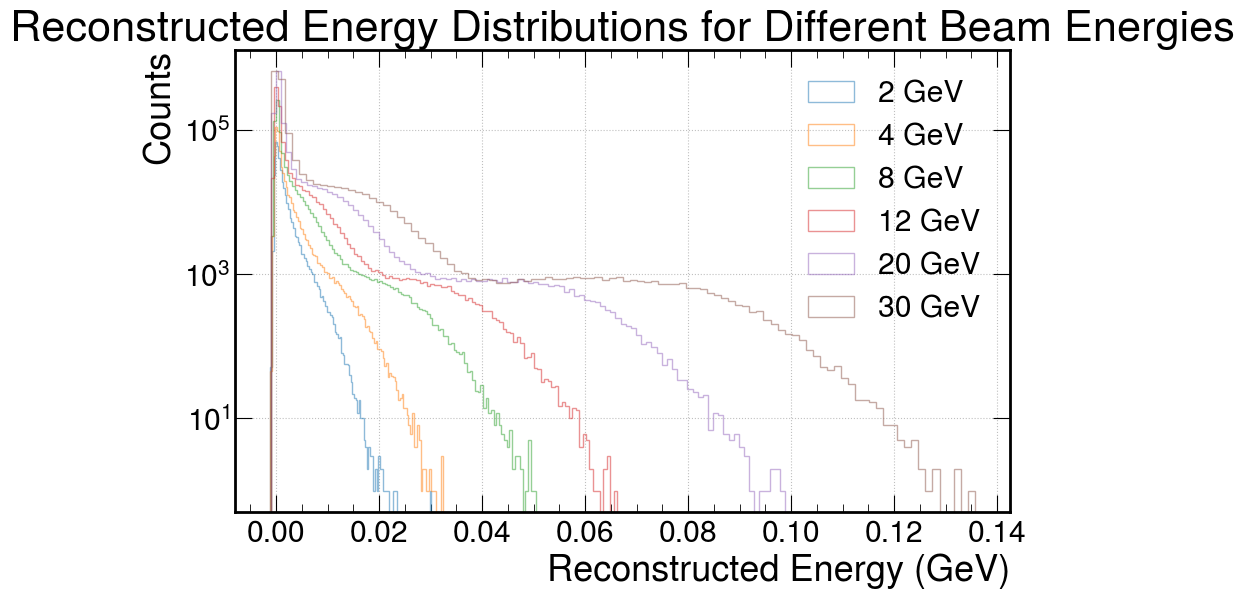

In [2]:
import matplotlib.pyplot as plt
import uproot as ur
import awkward as ak
import os

# Define the directory and the file names
data_directory = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/"
beam_energies = [2, 4, 8, 12, 20, 30]

# List all files in the directory
files_in_directory = os.listdir(data_directory)
print("Files in directory:", files_in_directory)

# Initialize the plot
plt.figure(figsize=(10, 6))

# Loop over each beam energy, open the corresponding file, and plot the energy distributions
for energy in beam_energies:
    file_name = f"reco_zdc_prototype_e-_{energy}GeV.edm4hep.root"
    file_path = os.path.join(data_directory, file_name)
    
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    
    with ur.open(file_path) as file:
        # List all keys in the file
        keys = file.keys()
        print(f"Keys in file {file_name}: {keys}")
        
        # Find the correct key for events
        event_key = None
        for key in keys:
            if key.startswith('events;'):
                event_key = key
                break
        
        if event_key is None:
            print(f"No events key found in file: {file_name}")
            continue
        
        events = file[event_key]
        zdc_reco = events.arrays(["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"])
        zdc_energies = ak.flatten(zdc_reco["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"])
        
        # Plot the histogram
        plt.hist(zdc_energies, bins=100, alpha=0.5, label=f'{energy} GeV', histtype='step')

# Configure the plot
plt.yscale('log')
plt.xlabel('Reconstructed Energy (GeV)')
plt.ylabel('Counts')
plt.title('Reconstructed Energy Distributions for Different Beam Energies')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Number of events: 10000
[{'MCParticles/MCParticles.generatorStatus': [1, ..., 0], ...}, ..., {...}]
[{'HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy': [...], ...}, ...]


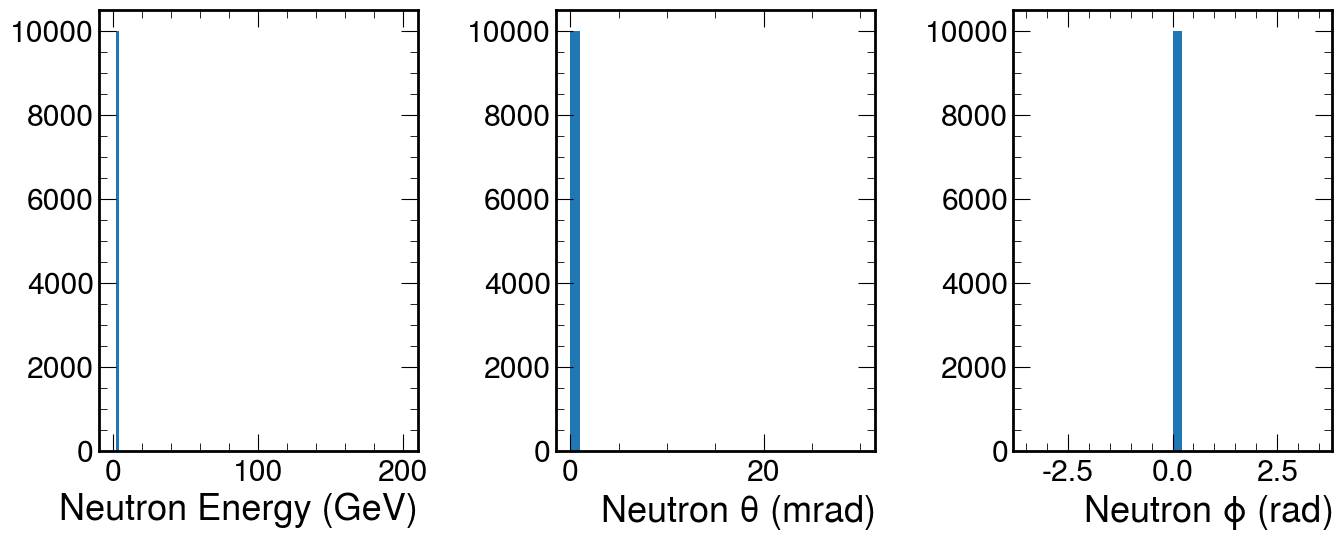

In [3]:
# Opening a data file. You can choose any data file from the below data_directory.
data_directory = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/"
file_name = "reco_zdc_prototype_e-_2GeV.edm4hep.root"
file_path = data_directory + file_name
with ur.open(file_path) as file:
    # Obtaining arrays for MCparticles branch
    events_12 = file["events;12"]

    zdc_MC = events_12.arrays(["MCParticles/MCParticles.generatorStatus", 
        "MCParticles/MCParticles.PDG",
        "MCParticles/MCParticles.mass",
        "MCParticles/MCParticles.momentum.x", 
        "MCParticles/MCParticles.momentum.y", 
        "MCParticles/MCParticles.momentum.z"])
    # Obtaining arrays for ZDCHcalHitsReco branch
    zdc_reco = events_12.arrays(["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy", 
        "HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.time",
        "HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.x", 
        "HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.y", 
        "HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.z"])
    print("Number of events:", events_12.num_entries)

    print(zdc_MC)
    print(zdc_reco)
# Mask to get incident neutron information
neutron_mask = (zdc_MC["MCParticles/MCParticles.generatorStatus"]==1)

# Getting the momentum in different directions and mass of the neutrons
neutron_px = zdc_MC["MCParticles/MCParticles.momentum.x"][neutron_mask]
neutron_py = zdc_MC["MCParticles/MCParticles.momentum.y"][neutron_mask]
neutron_pz = zdc_MC["MCParticles/MCParticles.momentum.z"][neutron_mask]
neutron_mass = zdc_MC["MCParticles/MCParticles.mass"][neutron_mask]

# Calculating the neutron's energy and the angles it was fired at
neutron_mom = np.sqrt(neutron_px**2 + neutron_py**2 + neutron_pz**2)
neutron_energy = np.sqrt(neutron_mom**2 + neutron_mass**2) # Units = GeV
neutron_theta = np.arccos(neutron_pz/neutron_mom) # Units = radians
neutron_phi = np.arctan2(neutron_py, neutron_px) # Units = radians

# Plotting the neutron energy & angles
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(14,6))

ax1.hist(ak.flatten(neutron_energy), bins = 100, range = [0, 200], histtype='stepfilled')
ax1.set_xlabel("Neutron Energy (GeV)")

# Convert to a numpy array to multiply by 1000 and go to milliradians
ax2.hist(np.asarray(ak.flatten(neutron_theta))*1000, bins = 30, range=[0, 30], histtype='stepfilled')
ax2.set_xlabel("Neutron $\\theta$ (mrad)")

ax3.hist(ak.flatten(neutron_phi), bins = 30, range=[-1.1*np.pi, 1.1*np.pi], histtype='stepfilled')
ax3.set_xlabel("Neutron $\phi$ (rad)")

plt.tight_layout()

In [4]:
zdc_x_pos = zdc_reco["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.x"]
zdc_y_pos = zdc_reco["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.y"]
zdc_z_pos = zdc_reco["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.z"]
zdc_energies = zdc_reco["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"] #use this for reconstruct

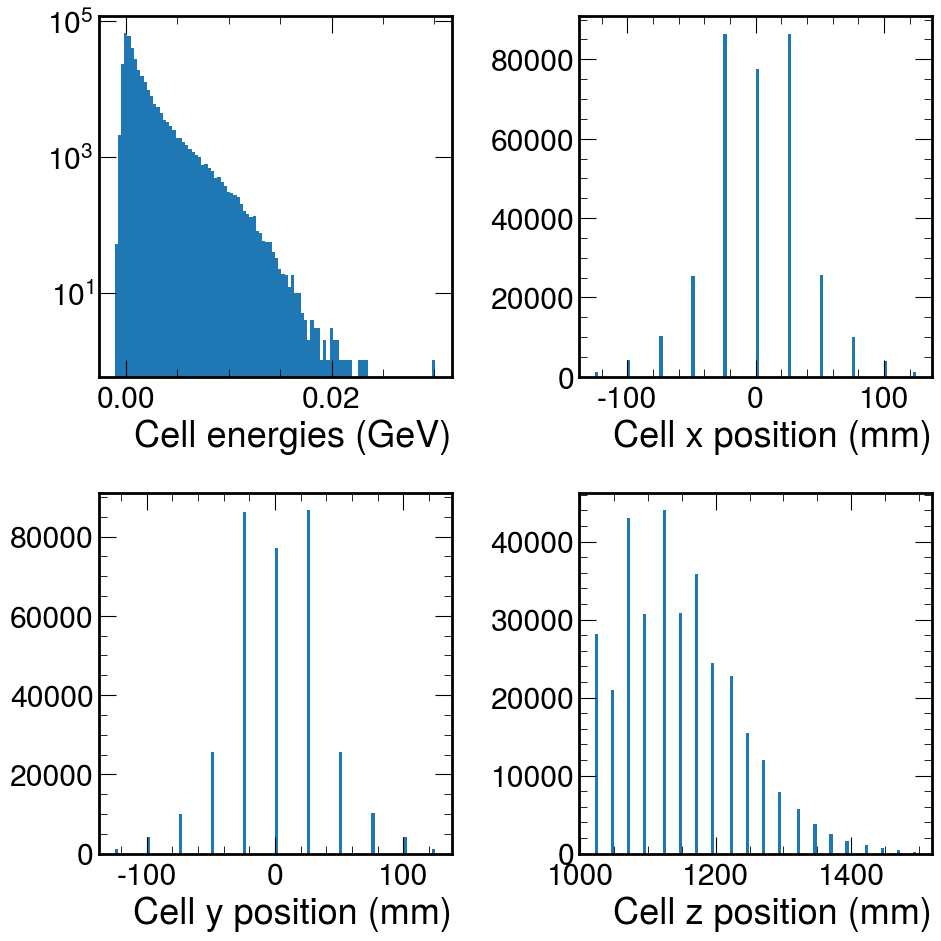

In [5]:
_, axs = plt.subplots(2, 2, figsize = (10,10))

axs[0][0].hist(ak.flatten(zdc_energies), bins=100)
axs[0][0].set_yscale('log')
axs[0][0].set_xlabel("Cell energies (GeV)")

axs[0][1].hist(ak.flatten(zdc_x_pos), bins = 100)
axs[0][1].set_xlabel("Cell x position (mm)")

axs[1][0].hist(ak.flatten(zdc_y_pos), bins = 100)
axs[1][0].set_xlabel("Cell y position (mm)")

axs[1][1].hist(ak.flatten(zdc_z_pos), bins = 100)
axs[1][1].set_xlabel("Cell z position (mm)")

plt.tight_layout()

Files in directory: ['reco_zdc_prototype_e-_12GeV.edm4hep.root', 'reco_zdc_prototype_e-_20GeV.edm4hep.root', 'reco_zdc_prototype_e-_2GeV.edm4hep.root', 'reco_zdc_prototype_e-_30GeV.edm4hep.root', 'reco_zdc_prototype_e-_4GeV.edm4hep.root', 'reco_zdc_prototype_e-_8GeV.edm4hep.root', 'reco_zdc_prototype_proton_120GeV.edm4hep.root']
Keys in file reco_zdc_prototype_e-_2GeV.edm4hep.root: ['events;12', 'events;11', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_4GeV.edm4hep.root: ['events;24', 'events;23', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_8GeV.edm4hep.root: ['events;48', 'events;47', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_12GeV.edm4hep.root: ['events;73', 'events;72', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_20GeV.edm4hep.root: ['events;130', 'events;129', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_30GeV.edm4hep.root: ['events;193', 'events;192', 'podio_metadata;1']


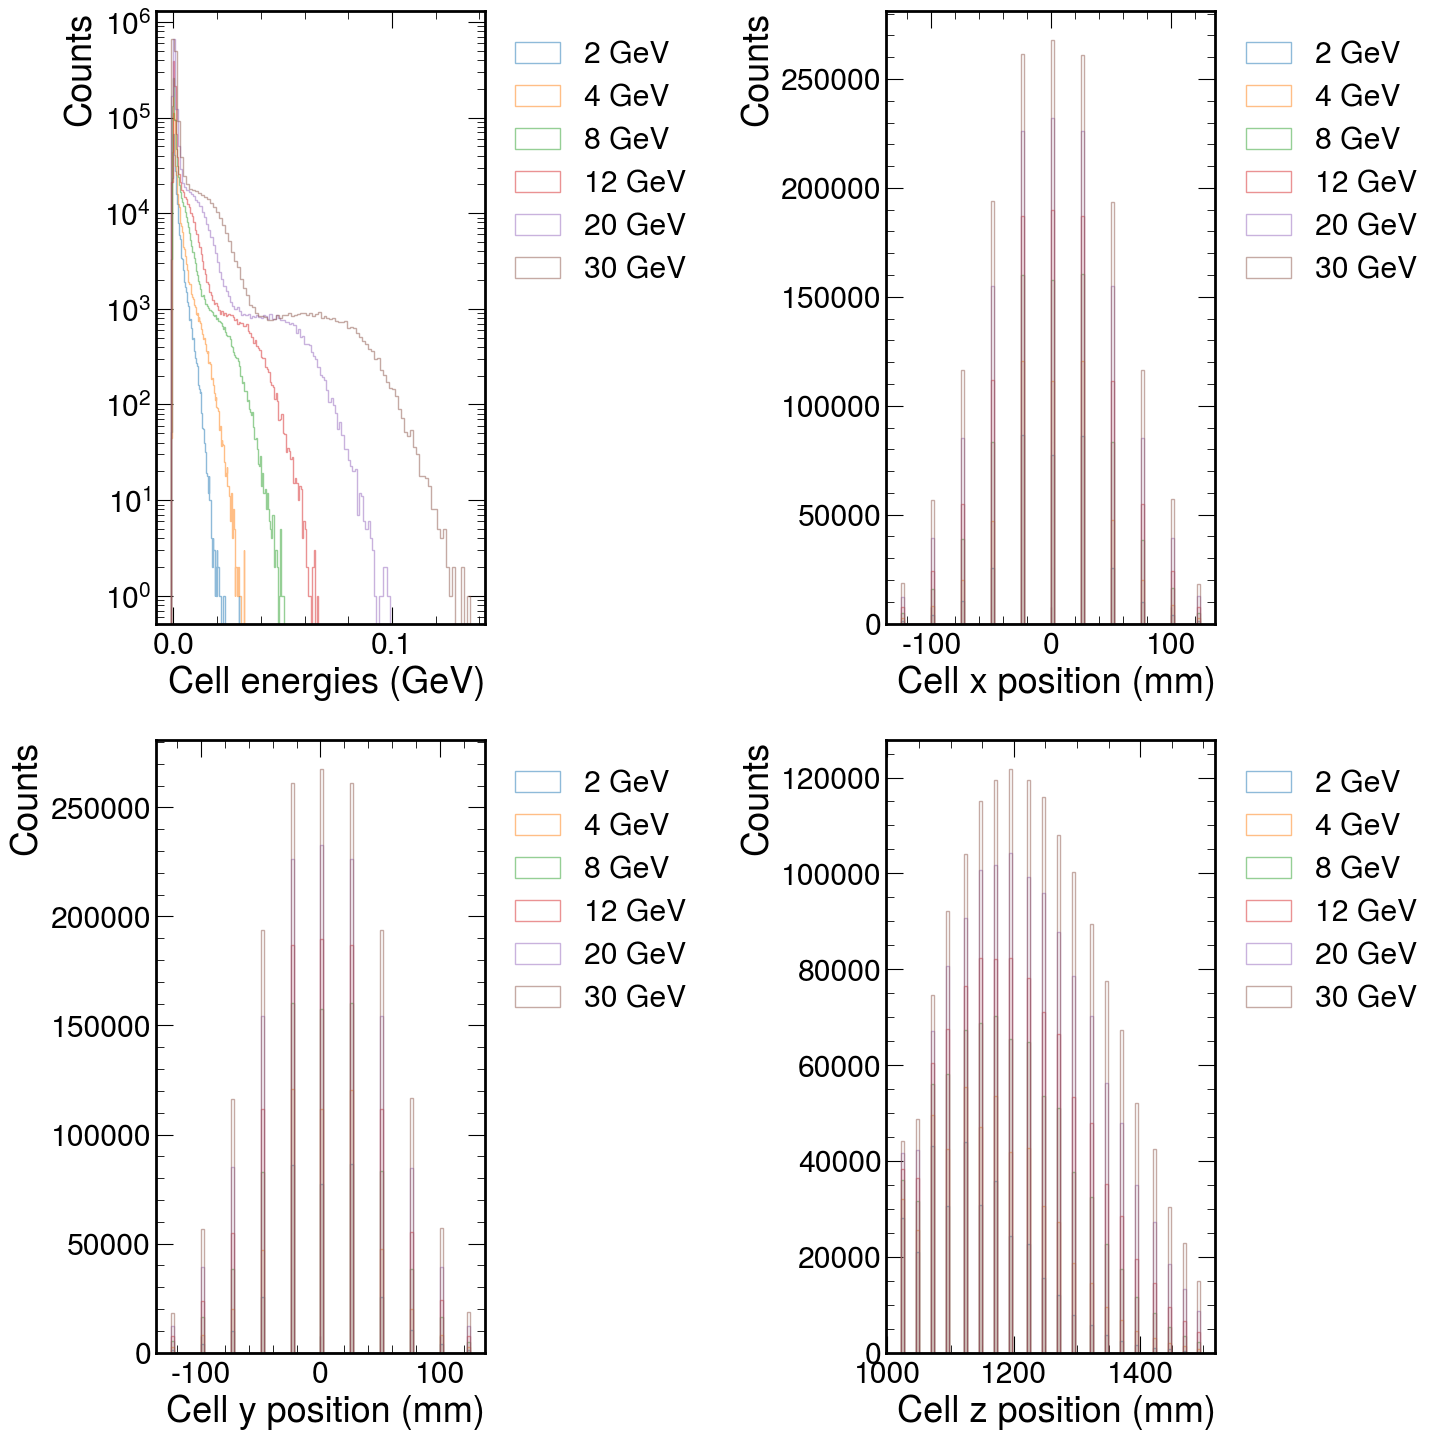

In [6]:
import matplotlib.pyplot as plt
import uproot as ur
import awkward as ak
import os

# Define the directory and the file names
data_directory = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/"
beam_energies = [2, 4, 8, 12, 20, 30]

# List all files in the directory
files_in_directory = os.listdir(data_directory)
print("Files in directory:", files_in_directory)

# Initialize the subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Loop over each beam energy, open the corresponding file, and plot the distributions
for energy in beam_energies:
    file_name = f"reco_zdc_prototype_e-_{energy}GeV.edm4hep.root"
    file_path = os.path.join(data_directory, file_name)
    
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    
    with ur.open(file_path) as file:
        # List all keys in the file
        keys = file.keys()
        print(f"Keys in file {file_name}: {keys}")
        
        # Find the correct key for events
        event_key = None
        for key in keys:
            if key.startswith('events;'):
                event_key = key
                break
        
        if event_key is None:
            print(f"No events key found in file: {file_name}")
            continue
        
        events = file[event_key]
        zdc_reco = events.arrays([
            "HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy",
            "HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.x",
            "HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.y",
            "HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.z"
        ])
        
        zdc_energies = ak.flatten(zdc_reco["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"])
        zdc_x_pos = ak.flatten(zdc_reco["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.x"])
        zdc_y_pos = ak.flatten(zdc_reco["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.y"])
        zdc_z_pos = ak.flatten(zdc_reco["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.z"])

        # Plot the histograms
        axs[0][0].hist(zdc_energies, bins=100, alpha=0.5, label=f'{energy} GeV', histtype='step')
        axs[0][1].hist(zdc_x_pos, bins=100, alpha=0.5, label=f'{energy} GeV', histtype='step')
        axs[1][0].hist(zdc_y_pos, bins=100, alpha=0.5, label=f'{energy} GeV', histtype='step')
        axs[1][1].hist(zdc_z_pos, bins=100, alpha=0.5, label=f'{energy} GeV', histtype='step')

# Configure the plots
axs[0][0].set_yscale('log')
axs[0][0].set_xlabel("Cell energies (GeV)")
axs[0][0].set_ylabel("Counts")
axs[0][0].legend(loc='upper left', bbox_to_anchor=(1, 1))

axs[0][1].set_xlabel("Cell x position (mm)")
axs[0][1].set_ylabel("Counts")
axs[0][1].legend(loc='upper left', bbox_to_anchor=(1, 1))

axs[1][0].set_xlabel("Cell y position (mm)")
axs[1][0].set_ylabel("Counts")
axs[1][0].legend(loc='upper left', bbox_to_anchor=(1, 1))

axs[1][1].set_xlabel("Cell z position (mm)")
axs[1][1].set_ylabel("Counts")
axs[1][1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


In [7]:
sum_axis1 = ak.sum(zdc_energies, axis=1)
sampling_fraction = 50.0*sum_axis1

reconstructed_event_energy = sampling_fraction

print (reconstructed_event_energy)
plt.hist(reconstructed_event_energy, bins=10, edgecolor='black')
plt.title("Histogram of Reconstructed Event Energy")
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.show()

ValueError: axis=1 exceeds the depth of the nested list structure (which is 1)

This error occurred while calling

    ak.sum(
        <Array [-0.000147, 2.45e-05, ..., 9.79e-05] type='1561340 * float32'>
        axis = 1
    )

In [8]:
fig = plt.figure(figsize=(10,8))

plt.scatter(ak.flatten(neutron_energy), reconstructed_event_energy)
plt.xlabel("True energy (GeV)")
plt.ylabel("Reconstructed energy (GeV)")

NameError: name 'reconstructed_event_energy' is not defined

<Figure size 1000x800 with 0 Axes>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import awkward as ak

# Flatten the neutron energy array
neutron_energy_flat = ak.flatten(neutron_energy).to_numpy()

# Extract unique specific energies using NumPy
unique_energies = np.unique(neutron_energy_flat)

# Loop over each specific energy
for specific_energy in unique_energies:
    # Create a mask for the current specific energy
    mask = (neutron_energy_flat == specific_energy)
    
    # Extract the masked reconstructed energies
    masked_reconstructed_energy = reconstructed_event_energy[mask]
    
    # Skip if there's no data for the specific energy
    if len(masked_reconstructed_energy) == 0:
        continue

    # Create a new figure for each specific energy
    plt.figure(figsize=(12, 8))
    
    # Plot histogram of the masked energies
    hist_data, bins, _ = plt.hist(masked_reconstructed_energy, bins=60, edgecolor='black', alpha=0.7, label=f'Specific Energy: {specific_energy:.2f}')
    
    # Compute bin centers
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    
    # Fit Gaussian if there's enough data
    if len(masked_reconstructed_energy) > 1:
        (mu, sigma) = norm.fit(masked_reconstructed_energy)
        # Handle cases where sigma is zero
        if sigma == 0:
            continue
        
        # Compute the Gaussian fit line
        best_fit_line = norm.pdf(bin_centers, mu, sigma) * sum(hist_data) * (bins[1] - bins[0])
        plt.plot(bin_centers, best_fit_line, '--', label=f'Gaussian fit ($\mu={mu:.2f}$, $\sigma={sigma:.2f}$) for Specific Energy: {specific_energy:.2f}')
        
        # Calculate and print energy resolution
        energy_resolution = sigma / mu
        print(f'Specific Energy: {specific_energy:.2f} - Energy Resolution (sigma/mu): {energy_resolution:.2f}')
    
    # Customize plot for the current specific energy
    plt.xlim(0, 60)
    plt.ylim(0, 750)
    plt.title(f'Histogram of Reconstructed Event Energy for Specific Energy: {specific_energy:.2f}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


NameError: name 'reconstructed_event_energy' is not defined

In [10]:
import numpy as np
from scipy.optimize import curve_fit
!pip install hist
!pip show hist
import sys
sys.path.append('/home/mia/.local/lib/python3.8/site-packages')
import hist
import awkward as ak
# Assuming neutron_energy and reconstructed_event_energy are already defined
# Flatten neutron_energy if not already flattened
# Assuming neutron_energy and reconstructed_event_energy are already defined
# Flatten neutron_energy if not already flattened
neutron_energy_flat = ak.flatten(neutron_energy)
failed_fit_indices = []

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

def refined_initial_guess(hist_data, bin_centers):
    weights = hist_data / hist_data.sum()
    initial_mean = (bin_centers * weights).sum()
    initial_amplitude = hist_data.max()
    initial_stddev = np.sqrt(np.average((bin_centers - initial_mean)**2, weights=weights))
    return [initial_amplitude, initial_mean, initial_stddev]

def reco(i):
    global failed_fit_indices
    specific_energy = neutron_energy_flat[i]
    mask = (neutron_energy_flat == specific_energy)
    masked_reconstructed_energy = reconstructed_event_energy[mask] / neutron_energy_flat[mask]
    h = hist.Hist(hist.axis.Regular(50, 0, 2, name="RecoEnergy"))
    h.fill(masked_reconstructed_energy)
    hist_data = h.view()
    bin_centers = 0.5 * (h.axes[0].edges[:-1] + h.axes[0].edges[1:])
    initial_guess = refined_initial_guess(hist_data, bin_centers)
    try:
        bounds = ([0, 0, 0], [np.inf, np.inf, np.inf])
        params, covariance = curve_fit(gaussian, bin_centers, hist_data, p0=initial_guess, bounds=bounds, maxfev=10000)
        amplitude, mean, stddev = params
        errors = np.sqrt(np.diag(covariance))
    except RuntimeError as e:
        failed_fit_indices.append(i)
        return np.nan, np.nan, np.array([np.nan, np.nan])
    return mean, stddev, errors[1:]

mu_values, sigma_values, mu_errors, sigma_errors, energies_for_mu_sigma = [], [], [], [], []

for i in range(len(neutron_energy_flat)):
    mu, sigma, errors = reco(i)
    if not np.isnan(mu) and not np.isnan(sigma):
        mu_values.append(mu)
        sigma_values.append(sigma)
        mu_errors.append(errors[0])
        sigma_errors.append(errors[1])
        energies_for_mu_sigma.append(neutron_energy_flat[i])

mu_values = np.array(mu_values)
sigma_values = np.array(sigma_values)
mu_errors = np.array(mu_errors)
sigma_errors = np.array(sigma_errors)
energies_for_mu_sigma = np.array(energies_for_mu_sigma)
neutron_energy_flat_filtered = np.delete(neutron_energy_flat, failed_fit_indices)
valid_indices = ~np.isnan(mu_values) & ~np.isnan(sigma_values)
mu_values_valid = mu_values[valid_indices]
sigma_values_valid = sigma_values[valid_indices]
mu_errors_valid = mu_errors[valid_indices]
sigma_errors_valid = sigma_errors[valid_indices]

print(f"Number of failed fits: {len(failed_fit_indices)}")
print("Valid mu values:", len(mu_values))
print("Valid sigma values:", len(sigma_values))
print("Filtered neutron_energy_flat size:", len(energies_for_mu_sigma))

Name: hist
Version: 2.7.3
Summary: Hist classes and utilities
Home-page: None
Author: None
Author-email: Henry Schreiner <henry.schreiner@cern.ch>
License: None
Location: /home/mia/.local/lib/python3.8/site-packages
Requires: typing-extensions, histoprint, numpy, boost-histogram
Required-by: 


NameError: name 'reconstructed_event_energy' is not defined

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the bin size
bin_size = 0.99
min_energy = np.min(neutron_energy_flat_filtered)
max_energy = np.max(neutron_energy_flat_filtered)
bins = np.arange(min_energy, max_energy + bin_size, bin_size)

# Calculate bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Initialize arrays for values, ensuring they match the length of bins - 1
counts = np.zeros(len(bins) - 1, dtype=int)
avg_mu_values = np.full(len(bins) - 1, np.nan)  # Initialize with NaN
avg_sigma_values = np.full(len(bins) - 1, np.nan)
avg_mu_errors = np.full(len(bins) - 1, np.nan)
avg_sigma_errors = np.full(len(bins) - 1, np.nan)

# Fill the values only where applicable
for idx in range(len(bins) - 1):
    mask = (neutron_energy_flat_filtered >= bins[idx]) & (neutron_energy_flat_filtered < bins[idx + 1])
    if np.any(mask):
        avg_mu_values[idx] = np.median(mu_values_valid[mask])
        avg_sigma_values[idx] = np.median(sigma_values_valid[mask])
        avg_mu_errors[idx] = np.subtract(*np.percentile(mu_values_valid[mask], [75, 25])) / 2
        avg_sigma_errors[idx] = np.subtract(*np.percentile(sigma_values_valid[mask], [75, 25])) / 2
        counts[idx] = np.sum(mask)  # Update the count at the index

# Identify valid bins
valid_bins = counts > 0

# Apply the valid_bins mask to filter all arrays
filtered_bin_centers = bin_centers[valid_bins]
filtered_avg_mu_values = avg_mu_values[valid_bins]
filtered_avg_sigma_values = avg_sigma_values[valid_bins]
filtered_avg_mu_errors = avg_mu_errors[valid_bins]
filtered_avg_sigma_errors = avg_sigma_errors[valid_bins]

# Plotting mu values
plt.figure(figsize=(10, 6))
plt.errorbar(filtered_bin_centers, filtered_avg_mu_values, yerr=filtered_avg_mu_errors, fmt='o', color='b', label='Averaged mu values')
plt.xscale('log')
plt.xlabel('Neutron Energy (GeV)')
plt.ylabel('Mu Values')
plt.ylim(0.75, 1.1)
plt.title('Averaged Mu Values vs Neutron Energy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting sigma values
plt.figure(figsize=(10, 6))
plt.errorbar(filtered_bin_centers, filtered_avg_sigma_values, yerr=filtered_avg_sigma_errors, fmt='o', color='r', label='Averaged sigma values')
plt.xscale('log')
plt.xlabel('Neutron Energy (GeV)')
plt.ylabel('Sigma Values')
plt.ylim(0, 0.25)
plt.title('Averaged Sigma Values vs Neutron Energy')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'neutron_energy_flat_filtered' is not defined

TypeError: '>' not supported between instances of 'list' and 'int'

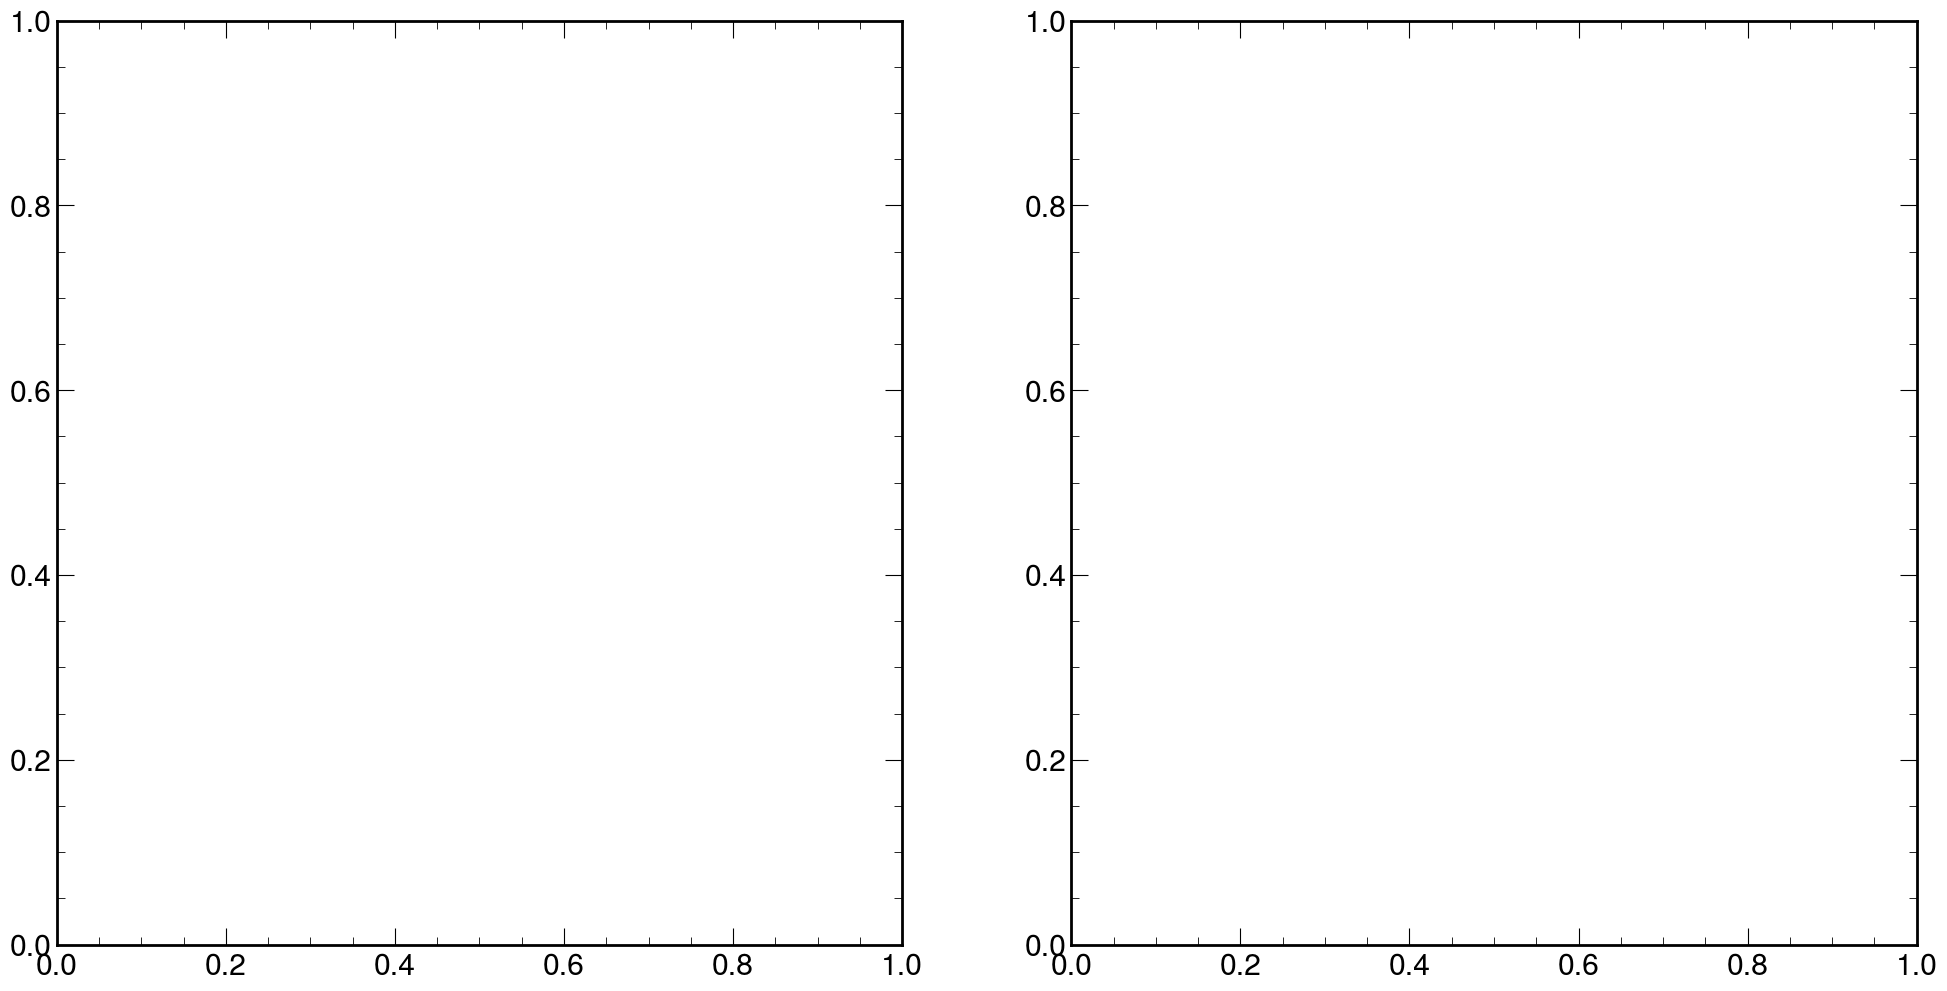

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def clean_data(energies, values, errors):
    """Filters out non-finite data and data with non-positive errors."""
    mask = np.isfinite(energies) & np.isfinite(values) & np.isfinite(errors) & (errors > 0)
    return energies[mask], values[mask], errors[mask]

def model_function(E, a, b, c):
    """Model function to fit the data, handling zero or near-zero energies safely."""
    epsilon = 1e-10  # Prevent division by zero
    E_safe = np.maximum(E, epsilon)  # Ensure E is never zero or too close to zero
    return np.sqrt((a / np.sqrt(E_safe))**2 + b**2 + (c / E_safe)**2)

def fit_and_plot(ax, energies, values, errors, title, label, initial_params, y_limits=None):
    """Fit model to data and plot the results with error bars and a fitted curve on the given axes."""
    try:
        params, cov = curve_fit(model_function, energies, values, sigma=errors, p0=initial_params, method='trf')
        E_fit = np.linspace(np.min(energies), np.max(energies), 500)
        fit_values = model_function(E_fit, *params)

        ax.errorbar(energies, values, yerr=errors, fmt='o', label=f'Measured {label}', capsize=5)
        ax.plot(E_fit, fit_values, 'r--', label=f'Fitted {label}')
        ax.set_xlabel('Neutron Energy (GeV)')
        ax.set_ylabel(f'{label} Values')
        ax.set_title(title)
        ax.legend()
        ax.grid(True)
        if y_limits:
            ax.set_ylim(y_limits)  # Set y-axis limits if provided
    except Exception as e:
        print(f"An error occurred during fitting {label}: {str(e)}")

# Set up the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))  # Adjust size as needed

# Data cleaning and preparation
energies_filtered, mu_values_filtered, mu_errors_filtered = clean_data(energies_for_mu_sigma, mu_values, mu_errors)
_, sigma_values_filtered, sigma_errors_filtered = clean_data(energies_for_mu_sigma, sigma_values, sigma_errors)

# Initial parameters
initial_params_mu = [0.4, 0.025, 0.0001]
initial_params_sigma = [0.4, 0.025, 0.0001]

# Plotting the data
fit_and_plot(ax1, energies_filtered, mu_values_filtered, mu_errors_filtered, 'Mu vs Neutron Energy', 'Mu', initial_params_mu, y_limits=(-1, 2))
fit_and_plot(ax2, energies_filtered, sigma_values_filtered, sigma_errors_filtered, 'Sigma vs Neutron Energy', 'Sigma', initial_params_sigma, y_limits=(0, 0.3))

plt.tight_layout()  # Adjust layout to fit elements
plt.show()


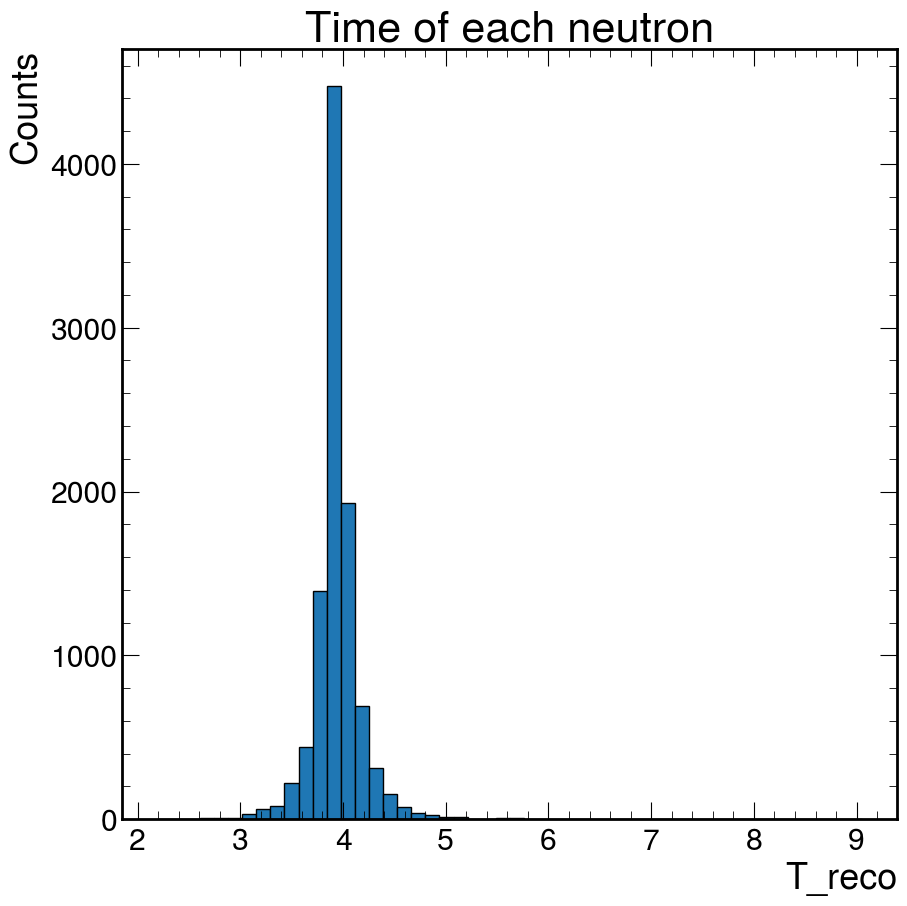

In [13]:
# Function to calculate T_reco
def calculate_T_reco(t_cells, E_cells):
    sum_E = sum(E_cells)
    if sum_E == 0:
        return 0
    T_reco = sum(t * E for t, E in zip(t_cells, E_cells)) / sum_E
    return T_reco
# Function to plot histogram
def plot_T_reco_histogram(T_reco_values):
    plt.hist(T_reco_values, bins=50, edgecolor='black')
    plt.xlabel('T_reco')
    plt.ylabel('Counts')
    plt.title('Time of each neutron')
    plt.show()
with ur.open(f"{data_directory + file_name}:events") as events:
    zdc_reco = events.arrays(["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy", "HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.time"])
    energies = zdc_reco["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"]
    times = zdc_reco["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.time"]
    T_reco_values = [calculate_T_reco(t, E) for t, E in zip(times, energies)]
    plot_T_reco_histogram(T_reco_values)

Energy Resolution (sigma/mu): 71.10


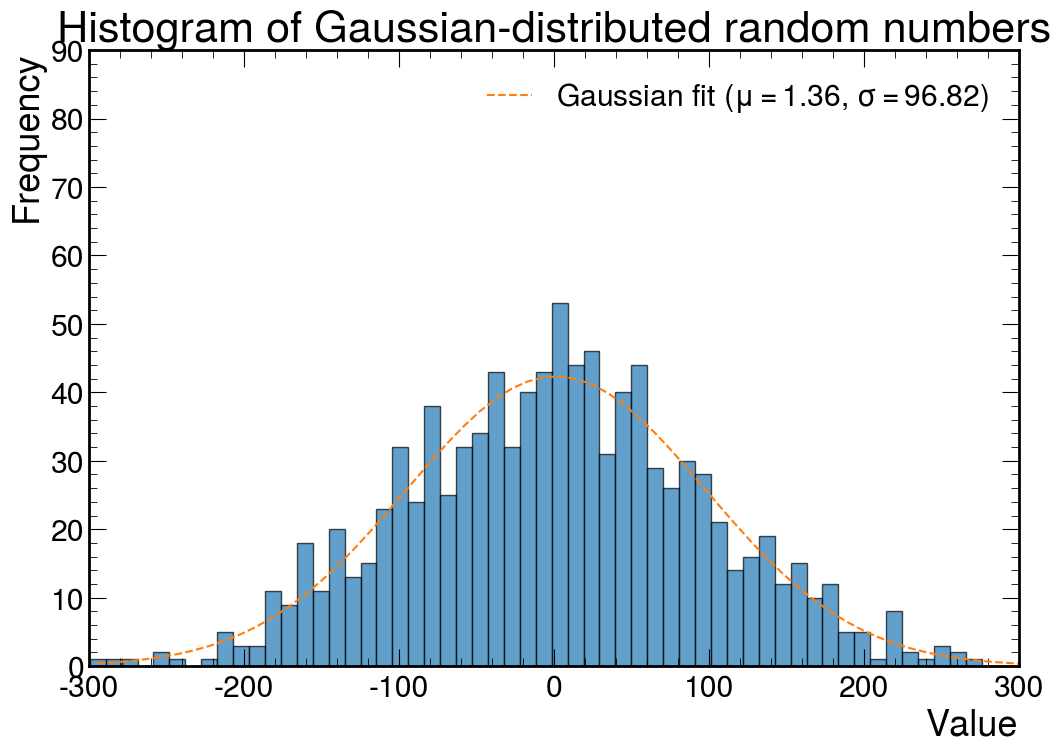

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import awkward as ak

# Simulating some sample neutron_energy and reconstructed_event_energy for demonstration
# You should replace this with your actual data
np.random.seed(0)  # For reproducibility
neutron_energy = np.random.normal(0, 100, size=1000)  # Sample data from a Gaussian distribution with mu=0, sigma=100 MeV
reconstructed_event_energy = np.random.normal(0, 100, size=1000)

# Ensure neutron_energy is a NumPy array
if isinstance(neutron_energy, ak.Array):
    neutron_energy_flat = ak.to_numpy(neutron_energy)
else:
    neutron_energy_flat = np.asarray(neutron_energy)

# Aggregate all reconstructed energies into one histogram
plt.figure(figsize=(12, 8))

# Plot histogram of all energies
hist_data, bins, _ = plt.hist(reconstructed_event_energy, bins=60, edgecolor='black', alpha=0.7)

# Compute bin centers
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Fit Gaussian to the aggregated data
(mu, sigma) = norm.fit(reconstructed_event_energy)

# Compute the Gaussian fit line
best_fit_line = norm.pdf(bin_centers, mu, sigma) * sum(hist_data) * (bins[1] - bins[0])

# Plot the Gaussian fit line
plt.plot(bin_centers, best_fit_line, '--', label=f'Gaussian fit ($\mu={mu:.2f}$, $\sigma={sigma:.2f}$)')

# Calculate and print energy resolution
energy_resolution = sigma / mu if mu != 0 else float('inf')
print(f'Energy Resolution (sigma/mu): {energy_resolution:.2f}')

# Customize plot for all specific energies
plt.xlim(-300, 300)
plt.ylim(0, 90)
plt.title('Histogram of Gaussian-distributed random numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


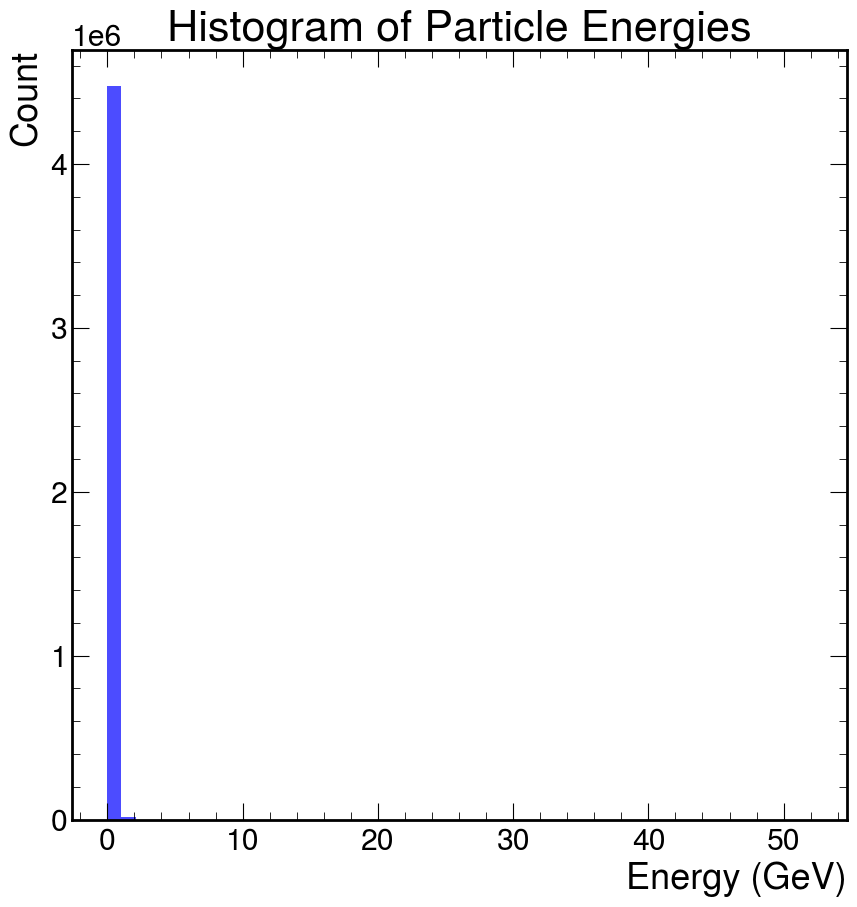

In [15]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

# Function to create Lorentz vector
def create_lorentz_vector(mass, px, py, pz):
    energy = np.sqrt(mass**2 + px**2 + py**2 + pz**2)
    return energy, px, py, pz

# File path
data_directory = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/"
file_name = "reco_zdc_prototype_e-_2GeV.edm4hep.root"
file_path = data_directory + file_name

# Open the ROOT file and access the tree
file = uproot.open(file_path)
tree = file["events;12"]  # Assuming the tree name is "events;12"

# Read the data from the ROOT file
mc_particles_branches = [
    'MCParticles/MCParticles.mass',
    'MCParticles/MCParticles.momentum.x',
    'MCParticles/MCParticles.momentum.y',
    'MCParticles/MCParticles.momentum.z'
]

# Extract mass and momentum components
mcparticles = tree.arrays(mc_particles_branches, library="ak")
mass = ak.flatten(mcparticles['MCParticles/MCParticles.mass'])
px = ak.flatten(mcparticles['MCParticles/MCParticles.momentum.x'])
py = ak.flatten(mcparticles['MCParticles/MCParticles.momentum.y'])
pz = ak.flatten(mcparticles['MCParticles/MCParticles.momentum.z'])

# Create Lorentz vectors
lorentz_vectors = [create_lorentz_vector(m, px[i], py[i], pz[i]) for i, m in enumerate(mass)]

# Convert lorentz_vectors to a NumPy array, ensuring consistent shapes
lorentz_vectors = np.array(lorentz_vectors, dtype=object)

# Filter and clean Lorentz vectors
clean_lorentz_vectors = [vec for vec in lorentz_vectors if len(vec) == 4]

# Extract energy components
energies = np.array([vec[0] for vec in clean_lorentz_vectors])

# Plot histogram of the energy component
plt.hist(energies, bins=50, alpha=0.7, color='blue')
plt.xlabel('Energy (GeV)')
plt.ylabel('Count')
plt.title('Histogram of Particle Energies')
plt.show()


In [16]:
import numpy as np

def lorentz_boost(beta, phi, four_vector):
    # Calculate gamma
    gamma = 1 / np.sqrt(1 - beta**2)
    
    # Define the boost matrix
    boost_matrix = np.array([
        [gamma, 0, -gamma * beta * np.cos(phi), -gamma * beta * np.sin(phi)],
        [0, 1, 0, 0],
        [-gamma * beta * np.cos(phi), 0, gamma, 0],
        [-gamma * beta * np.sin(phi), 0, 0, gamma]
    ])
    
    # Apply the boost matrix to the 4-vector
    boosted_vector = np.dot(boost_matrix, four_vector)
    return boosted_vector

# Example usage
if __name__ == "__main__":
    beta = 0.5  # Example value for beta
    phi = np.pi / 4  # Example value for phi (45 degrees)
    four_vector = np.array([10, 1, 2, 3])  # Example 4-vector (E, p_x, p_y, p_z)

    boosted_vector = lorentz_boost(beta, phi, four_vector)
    print("Original 4-vector:", four_vector)
    print("Boosted 4-vector:", boosted_vector)


Original 4-vector: [10  1  2  3]
Boosted 4-vector: [ 9.50576393  1.         -1.77308183 -0.61838129]


NameError: name 'boosted_neutron_phi' is not defined

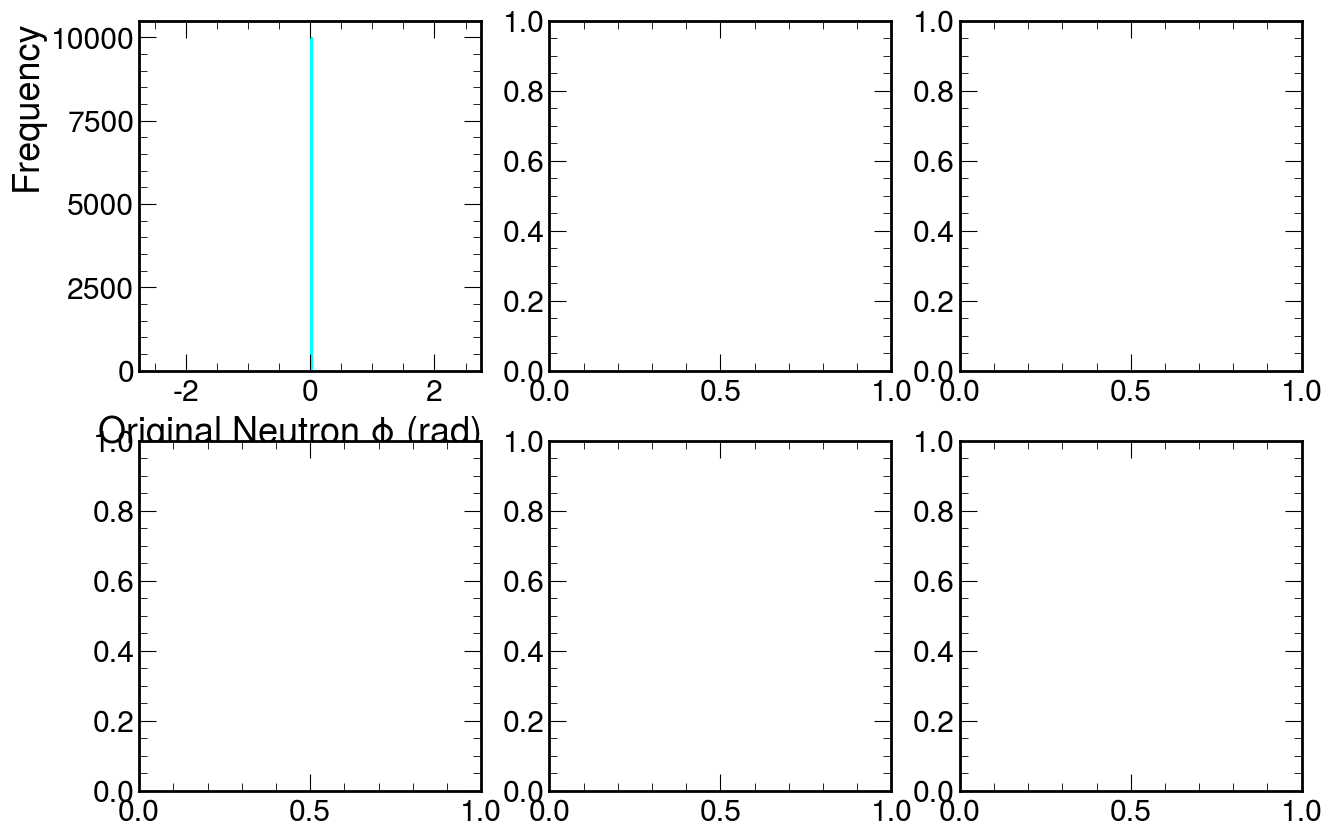

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

def lorentz_boost(beta, phi, four_vector):
    gamma = 1 / np.sqrt(1 - beta**2)
    boost_matrix = np.array([
        [gamma, 0, -gamma * beta * np.cos(phi), -gamma * beta * np.sin(phi)],
        [0, 1, 0, 0],
        [-gamma * beta * np.cos(phi), 0, gamma, 0],
        [-gamma * beta * np.sin(phi), 0, 0, gamma]
    ])
    boosted_vector = np.dot(boost_matrix, four_vector)
    return boosted_vector

# Mask to get incident neutron information
neutron_mask = (zdc_MC["MCParticles/MCParticles.generatorStatus"] == 1)

# Getting the momentum in different directions and mass of the neutrons
neutron_px = ak.to_numpy(zdc_MC["MCParticles/MCParticles.momentum.x"][neutron_mask])
neutron_py = ak.to_numpy(zdc_MC["MCParticles/MCParticles.momentum.y"][neutron_mask])
neutron_pz = ak.to_numpy(zdc_MC["MCParticles/MCParticles.momentum.z"][neutron_mask])
neutron_mass = ak.to_numpy(zdc_MC["MCParticles/MCParticles.mass"][neutron_mask])

# Calculate the neutron's energy and the angles it was fired at
neutron_mom = np.sqrt(neutron_px**2 + neutron_py**2 + neutron_pz**2)
neutron_energy = np.sqrt(neutron_mom**2 + neutron_mass**2)  # Units = GeV
neutron_theta = np.arccos(neutron_pz / neutron_mom)  # Units = radians
neutron_phi = np.arctan2(neutron_py, neutron_px)  # Units = radians

# Define boost parameters (example values)
beta = 0.1  # Adjust beta to a smaller value
phi_boost = np.pi / 4  # Example value for phi (45 degrees)

# Convert 3-momenta to 4-vectors
four_vectors = np.column_stack((neutron_energy, neutron_px, neutron_py, neutron_pz))

# Apply the boost to each 4-vector
boosted_four_vectors = np.array([lorentz_boost(beta, phi_boost, vec) for vec in four_vectors])

# Extract boosted energies and momenta
boosted_neutron_energy = boosted_four_vectors[:, 0]
boosted_neutron_px = boosted_four_vectors[:, 1]
boosted_neutron_py = boosted_four_vectors[:, 2]
boosted_neutron_pz = boosted_four_vectors[:, 3]

# Recalculate momentum and angles for boosted neutrons
boosted_neutron_mom = np.sqrt(boosted_neutron_px**2 + boosted_neutron_py**2 + boosted_neutron_pz**2)

# Ensure no division by zero by handling cases where momentum is zero
nonzero_mom_indices = boosted_neutron_mom > 0
boosted_neutron_theta = np.zeros_like(boosted_neutron_mom)
boosted_neutron_theta[nonzero_mom_indices] = np.arccos(boosted_neutron_pz[nonzero_mom_indices] / boosted_neutron_mom[nonzero_mom_indices])

# Plotting the original and boosted neutron energy & angles
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original phi
axes[0, 0].hist(neutron_phi, bins=100, range=[-2.5, 2.5], histtype='stepfilled', color='cyan')
axes[0, 0].set_xlabel("Original Neutron $\\phi$ (rad)")
axes[0, 0].set_ylabel("Frequency")

# Boosted phi
axes[0, 1].hist(boosted_neutron_phi, bins=100, range=[-2.5, 2.5], histtype='stepfilled', color='blue')
axes[0, 1].set_xlabel("Boosted Neutron $\\phi$ (rad)")
axes[0, 1].set_ylabel("Frequency")

# Original energy
axes[0, 2].hist(neutron_energy, bins=100, range=[0, 150], histtype='stepfilled', color='green')
axes[0, 2].set_xlabel("Original Neutron Energy (GeV)")
axes[0, 2].set_ylabel("Frequency")

# Original theta
axes[1, 0].hist(neutron_theta * 1000, bins=100, range=[0, 6], histtype='stepfilled', color='red')
axes[1, 0].set_xlabel("Original Neutron $\\theta$ (mrad)")
axes[1, 0].set_ylabel("Frequency")

# Boosted theta
axes[1, 1].hist(boosted_neutron_theta * 1000, bins=100, range=[0, 28], histtype='stepfilled', color='orange')
axes[1, 1].set_xlabel("Boosted Neutron $\\theta$ (mrad)")
axes[1, 1].set_ylabel("Frequency")

# Boosted energy
axes[1, 2].hist(boosted_neutron_energy, bins=100, range=[0, 400], histtype='stepfilled', color='purple')
axes[1, 2].set_xlabel("Boosted Neutron Energy (GeV)")
axes[1, 2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


Original Neutron Energy (first 5 entries): [[1.81238237]
 [1.79861589]
 [2.15639959]
 [1.83596325]
 [1.64638776]]
Boosted Neutron Energy (first 5 entries): [1.67020352 1.6671023  1.9946395  1.70712389 1.52401798]
Original Neutron Theta (first 5 entries): [[0.57848053]
 [0.3395904 ]
 [0.22866984]
 [0.33655119]
 [0.16965238]]
Boosted Neutron Theta (first 5 entries): [0.56147892 0.31835523 0.17011011 0.33390799 0.1136799 ]
Histogram Range for Boosted Theta: 2.4584201003992643 to 964.2426923451067
Histogram Range for Boosted Energy: 0.9550731808353911 to 2.371624001340074


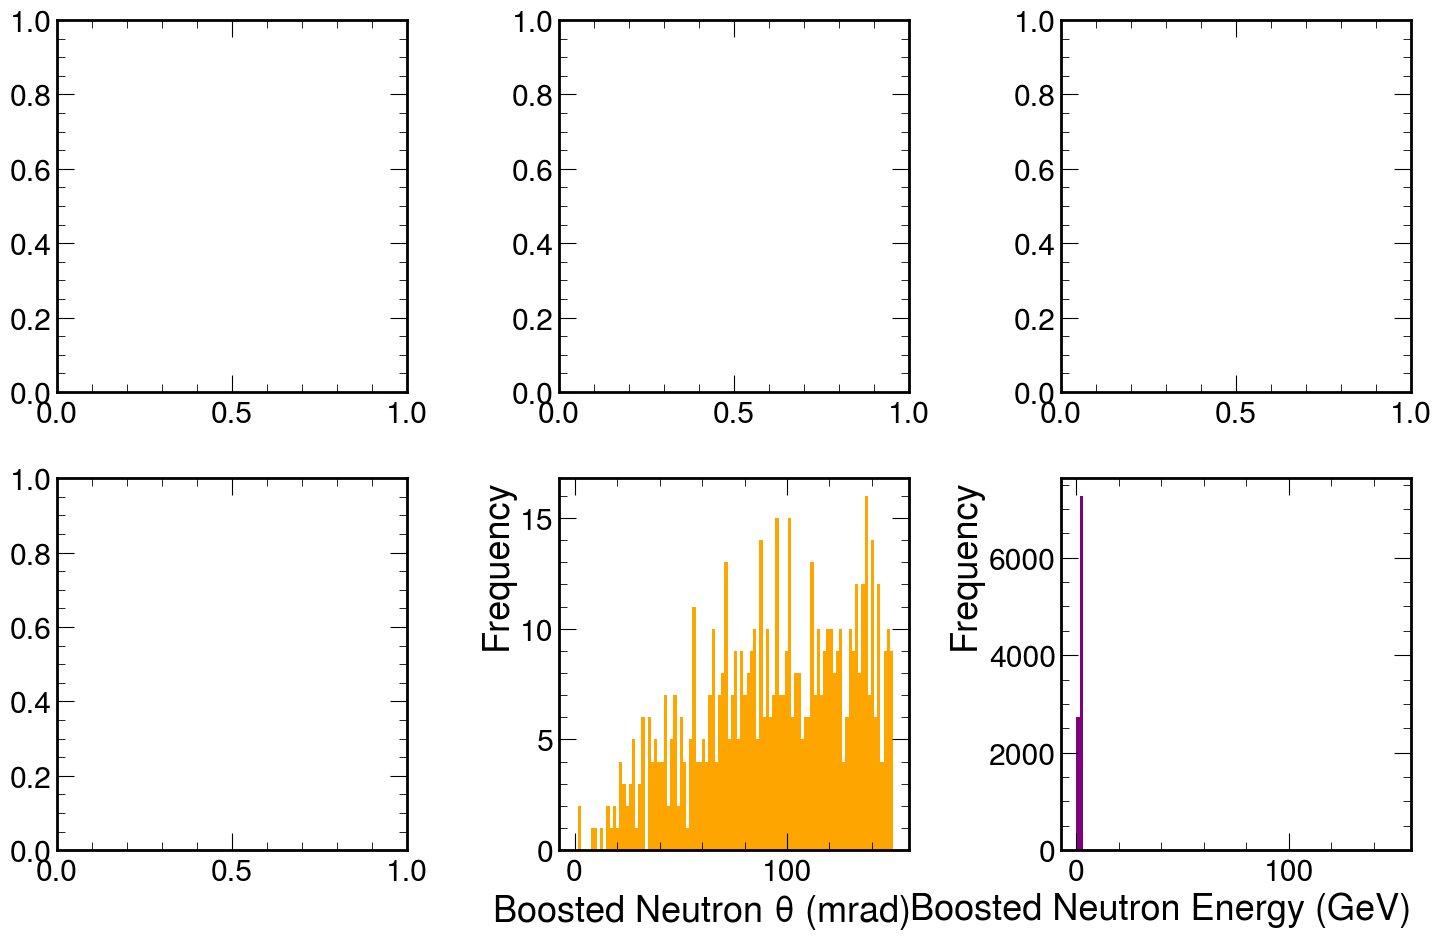

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

def lorentz_boost(beta, phi, four_vector):
    gamma = 1 / np.sqrt(1 - beta**2)
    boost_matrix = np.array([
        [gamma, 0, -gamma * beta * np.cos(phi), -gamma * beta * np.sin(phi)],
        [0, 1, 0, 0],
        [-gamma * beta * np.cos(phi), 0, gamma, 0],
        [-gamma * beta * np.sin(phi), 0, 0, gamma]
    ])
    boosted_vector = np.dot(boost_matrix, four_vector)
    return boosted_vector

# Example data setup (replace with actual data)
neutron_px = np.random.uniform(zdc_MC["MCParticles/MCParticles.momentum.x"][neutron_mask])
neutron_py = np.random.uniform(zdc_MC["MCParticles/MCParticles.momentum.y"][neutron_mask])
neutron_pz = np.random.uniform(zdc_MC["MCParticles/MCParticles.momentum.z"][neutron_mask])
neutron_mass = np.random.uniform(zdc_MC["MCParticles/MCParticles.mass"][neutron_mask])

# Calculate original neutron energy and angles
neutron_mom = np.sqrt(neutron_px**2 + neutron_py**2 + neutron_pz**2)
neutron_energy = np.sqrt(neutron_mom**2 + neutron_mass**2)
neutron_theta = np.arccos(neutron_pz / neutron_mom)
neutron_phi = np.arctan2(neutron_py, neutron_px)

# Boost parameters
beta = 0.1
phi_boost = np.pi / 4

# Convert to 4-vectors
four_vectors = np.column_stack((neutron_energy, neutron_px, neutron_py, neutron_pz))

# Apply boost
boosted_four_vectors = np.array([lorentz_boost(beta, phi_boost, vec) for vec in four_vectors])
boosted_neutron_energy = boosted_four_vectors[:, 0]
boosted_neutron_px = boosted_four_vectors[:, 1]
boosted_neutron_py = boosted_four_vectors[:, 2]
boosted_neutron_pz = boosted_four_vectors[:, 3]

# Recalculate boosted neutron angles
boosted_neutron_mom = np.sqrt(boosted_neutron_px**2 + boosted_neutron_py**2 + boosted_neutron_pz**2)
boosted_neutron_theta = np.zeros_like(boosted_neutron_mom)
nonzero_mom_indices = boosted_neutron_mom > 0
boosted_neutron_theta[nonzero_mom_indices] = np.arccos(boosted_neutron_pz[nonzero_mom_indices] / boosted_neutron_mom[nonzero_mom_indices])

# Debug prints
print("Original Neutron Energy (first 5 entries):", neutron_energy[:5])
print("Boosted Neutron Energy (first 5 entries):", boosted_neutron_energy[:5])
print("Original Neutron Theta (first 5 entries):", neutron_theta[:5])
print("Boosted Neutron Theta (first 5 entries):", boosted_neutron_theta[:5])

print("Histogram Range for Boosted Theta:", np.min(boosted_neutron_theta * 1000), "to", np.max(boosted_neutron_theta * 1000))
print("Histogram Range for Boosted Energy:", np.min(boosted_neutron_energy), "to", np.max(boosted_neutron_energy))

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Boosted theta
axes[1, 1].hist(boosted_neutron_theta * 1000, bins=100, range=[0, 150], histtype='stepfilled', color='orange')
axes[1, 1].set_xlabel("Boosted Neutron $\\theta$ (mrad)")
axes[1, 1].set_ylabel("Frequency")

# Boosted energy
axes[1, 2].hist(boosted_neutron_energy, bins=100, range=[0, 150], histtype='stepfilled', color='purple')
axes[1, 2].set_xlabel("Boosted Neutron Energy (GeV)")
axes[1, 2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


Files in directory: ['reco_zdc_prototype_e-_12GeV.edm4hep.root', 'reco_zdc_prototype_e-_20GeV.edm4hep.root', 'reco_zdc_prototype_e-_2GeV.edm4hep.root', 'reco_zdc_prototype_e-_30GeV.edm4hep.root', 'reco_zdc_prototype_e-_4GeV.edm4hep.root', 'reco_zdc_prototype_e-_8GeV.edm4hep.root', 'reco_zdc_prototype_proton_120GeV.edm4hep.root']
Keys in file reco_zdc_prototype_e-_2GeV.edm4hep.root: ['events;12', 'events;11', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_4GeV.edm4hep.root: ['events;24', 'events;23', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_8GeV.edm4hep.root: ['events;48', 'events;47', 'podio_metadata;1']


/usr/local/lib/python3.8/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Keys in file reco_zdc_prototype_e-_12GeV.edm4hep.root: ['events;73', 'events;72', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_20GeV.edm4hep.root: ['events;130', 'events;129', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_30GeV.edm4hep.root: ['events;193', 'events;192', 'podio_metadata;1']


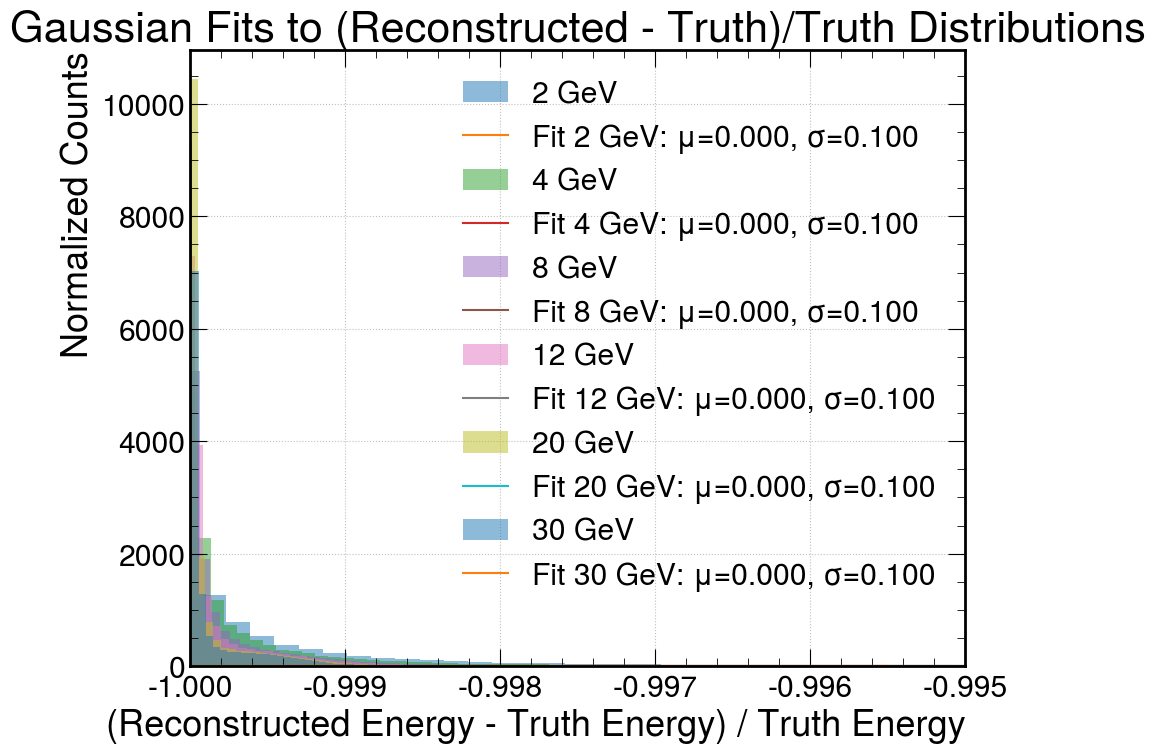

Beam Energy: 2 GeV, mu: 0.000, sigma: 0.100
Beam Energy: 4 GeV, mu: 0.000, sigma: 0.100
Beam Energy: 8 GeV, mu: 0.000, sigma: 0.100
Beam Energy: 12 GeV, mu: 0.000, sigma: 0.100
Beam Energy: 20 GeV, mu: 0.000, sigma: 0.100
Beam Energy: 30 GeV, mu: 0.000, sigma: 0.100


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as ur
import awkward as ak
import os
from scipy.optimize import curve_fit

# Gaussian function to fit the data
def gaussian(x, mu, sigma, A):
    return A * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Define the directory and the file names
data_directory = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/"
beam_energies = [2, 4, 8, 12, 20, 30]

# List all files in the directory
files_in_directory = os.listdir(data_directory)
print("Files in directory:", files_in_directory)

# Initialize lists to store mu and sigma values for each energy
mu_values = []
sigma_values = []

# Initialize the figure for plotting
plt.figure(figsize=(10, 8))

# Loop over each beam energy
for energy in beam_energies:
    file_name = f"reco_zdc_prototype_e-_{energy}GeV.edm4hep.root"
    file_path = os.path.join(data_directory, file_name)
    
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    
    with ur.open(file_path) as file:
        # List all keys in the file
        keys = file.keys()
        print(f"Keys in file {file_name}: {keys}")
        
        # Find the correct key for events
        event_key = None
        for key in keys:
            if key.startswith('events;'):
                event_key = key
                break
        
        if event_key is None:
            print(f"No events key found in file: {file_name}")
            continue
        
        events = file[event_key]
        zdc_reco = events.arrays(["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"])
        
        # Flatten and convert to numpy arrays
        zdc_energies = ak.to_numpy(ak.flatten(zdc_reco["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"]))
        
        # Compute (reco - truth) / truth
        reco_minus_truth_over_truth = (zdc_energies - energy) / energy
        
        # Create a histogram of the distribution
        hist_data, bin_edges = np.histogram(reco_minus_truth_over_truth, bins=100, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Fit a Gaussian to the histogram
        popt, pcov = curve_fit(gaussian, bin_centers, hist_data, p0=[0, 0.1, 1])
        mu, sigma, A = popt
        
        # Store the mu and sigma values
        mu_values.append(mu)
        sigma_values.append(sigma)
        
        # Plot the histogram and the Gaussian fit
        plt.hist(reco_minus_truth_over_truth, bins=100, density=True, alpha=0.5, label=f'{energy} GeV')
        plt.plot(bin_centers, gaussian(bin_centers, *popt), label=f'Fit {energy} GeV: μ={mu:.3f}, σ={sigma:.3f}')

# Configure the plot
plt.xlabel("(Reconstructed Energy - Truth Energy) / Truth Energy")
plt.ylabel("Normalized Counts")
plt.xlim(-1, -0.9950)
#plt.ylim(0, 1500)
plt.title("Gaussian Fits to (Reconstructed - Truth)/Truth Distributions")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Print out the mu and sigma values for each energy
for energy, mu, sigma in zip(beam_energies, mu_values, sigma_values):
    print(f'Beam Energy: {energy} GeV, mu: {mu:.3f}, sigma: {sigma:.3f}')


Files in directory: ['reco_zdc_prototype_e-_12GeV.edm4hep.root', 'reco_zdc_prototype_e-_20GeV.edm4hep.root', 'reco_zdc_prototype_e-_2GeV.edm4hep.root', 'reco_zdc_prototype_e-_30GeV.edm4hep.root', 'reco_zdc_prototype_e-_4GeV.edm4hep.root', 'reco_zdc_prototype_e-_8GeV.edm4hep.root', 'reco_zdc_prototype_proton_120GeV.edm4hep.root']
Keys in file reco_zdc_prototype_e-_2GeV.edm4hep.root: ['events;12', 'events;11', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_4GeV.edm4hep.root: ['events;24', 'events;23', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_8GeV.edm4hep.root: ['events;48', 'events;47', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_12GeV.edm4hep.root: ['events;73', 'events;72', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_20GeV.edm4hep.root: ['events;130', 'events;129', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_30GeV.edm4hep.root: ['events;193', 'events;192', 'podio_metadata;1']


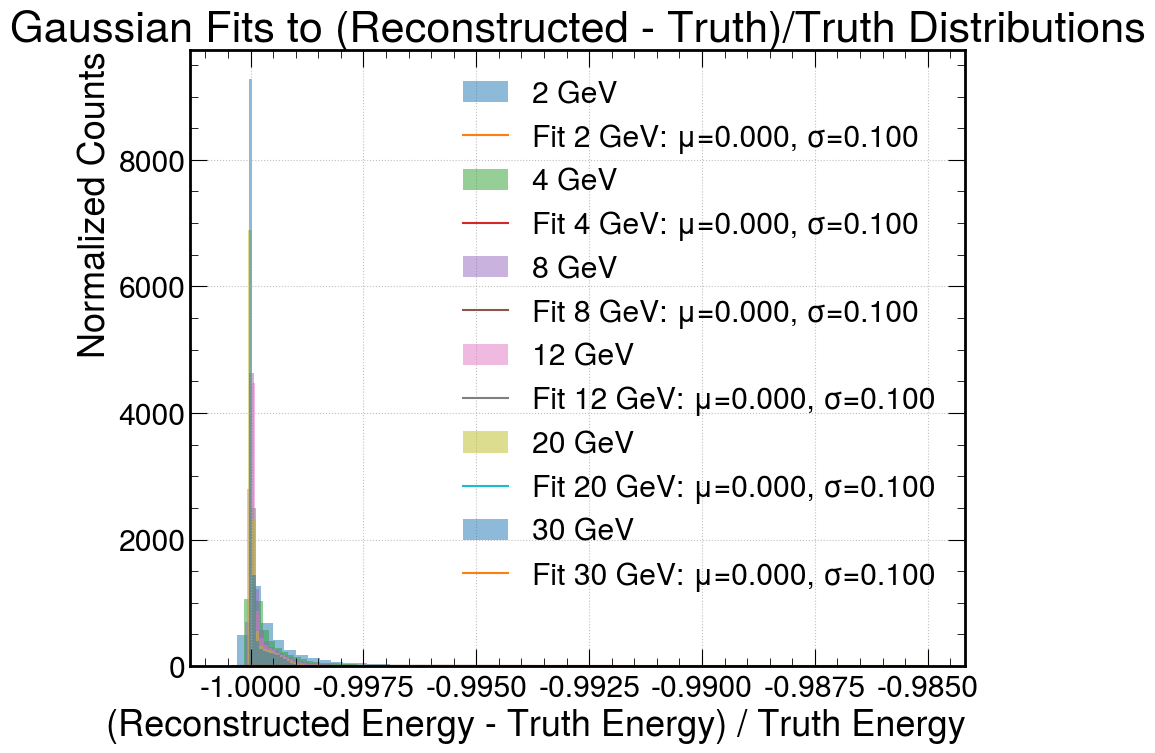

Beam Energy: 2 GeV, mu: 0.000, sigma: 0.100
Beam Energy: 4 GeV, mu: 0.000, sigma: 0.100
Beam Energy: 8 GeV, mu: 0.000, sigma: 0.100
Beam Energy: 12 GeV, mu: 0.000, sigma: 0.100
Beam Energy: 20 GeV, mu: 0.000, sigma: 0.100
Beam Energy: 30 GeV, mu: 0.000, sigma: 0.100


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as ur
import awkward as ak
import os
from scipy.optimize import curve_fit
from scipy.stats import norm

# Gaussian function to fit the data
def gaussian(x, mu, sigma, A):
    return A * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Define the directory and the file names
data_directory = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/"
beam_energies = [2, 4, 8, 12, 20, 30]

# List all files in the directory
files_in_directory = os.listdir(data_directory)
print("Files in directory:", files_in_directory)

# Initialize lists to store mu and sigma values for each energy
mu_values = []
sigma_values = []

# Initialize the figure for plotting
plt.figure(figsize=(10, 8))

# Loop over each beam energy
for energy in beam_energies:
    file_name = f"reco_zdc_prototype_e-_{energy}GeV.edm4hep.root"
    file_path = os.path.join(data_directory, file_name)
    
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    
    with ur.open(file_path) as file:
        # List all keys in the file
        keys = file.keys()
        print(f"Keys in file {file_name}: {keys}")
        
        # Find the correct key for events
        event_key = None
        for key in keys:
            if key.startswith('events;'):
                event_key = key
                break
        
        if event_key is None:
            print(f"No events key found in file: {file_name}")
            continue
        
        events = file[event_key]
        zdc_reco = events.arrays(["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"])
        
        # Flatten and convert to numpy arrays
        zdc_energies = ak.to_numpy(ak.flatten(zdc_reco["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"]))
        
        # Compute (reco - truth) / truth
        reco_minus_truth_over_truth = (zdc_energies - energy) / energy
        
        # Plot histogram of the masked energies
        hist_data, bin_edges = np.histogram(reco_minus_truth_over_truth, bins=60, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Fit Gaussian to the histogram
        if len(reco_minus_truth_over_truth) > 1:
            popt, pcov = curve_fit(gaussian, bin_centers, hist_data, p0=[0, 0.1, 1])
            mu, sigma, A = popt
            
            # Store the mu and sigma values
            mu_values.append(mu)
            sigma_values.append(sigma)
            
            # Plot the histogram and the Gaussian fit
            plt.hist(reco_minus_truth_over_truth, bins=60, density=True, alpha=0.5, label=f'{energy} GeV')
            plt.plot(bin_centers, gaussian(bin_centers, *popt), label=f'Fit {energy} GeV: μ={mu:.3f}, σ={sigma:.3f}')
        
# Configure the plot
plt.xlabel("(Reconstructed Energy - Truth Energy) / Truth Energy")
plt.ylabel("Normalized Counts")
plt.title("Gaussian Fits to (Reconstructed - Truth)/Truth Distributions")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Print out the mu and sigma values for each energy
for energy, mu, sigma in zip(beam_energies, mu_values, sigma_values):
    print(f'Beam Energy: {energy} GeV, mu: {mu:.3f}, sigma: {sigma:.3f}')


Files in directory: ['reco_zdc_prototype_e-_12GeV.edm4hep.root', 'reco_zdc_prototype_e-_20GeV.edm4hep.root', 'reco_zdc_prototype_e-_2GeV.edm4hep.root', 'reco_zdc_prototype_e-_30GeV.edm4hep.root', 'reco_zdc_prototype_e-_4GeV.edm4hep.root', 'reco_zdc_prototype_e-_8GeV.edm4hep.root', 'reco_zdc_prototype_proton_120GeV.edm4hep.root']
Keys in file reco_zdc_prototype_e-_2GeV.edm4hep.root: ['events;12', 'events;11', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_4GeV.edm4hep.root: ['events;24', 'events;23', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_8GeV.edm4hep.root: ['events;48', 'events;47', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_12GeV.edm4hep.root: ['events;73', 'events;72', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_20GeV.edm4hep.root: ['events;130', 'events;129', 'podio_metadata;1']
Keys in file reco_zdc_prototype_e-_30GeV.edm4hep.root: ['events;193', 'events;192', 'podio_metadata;1']


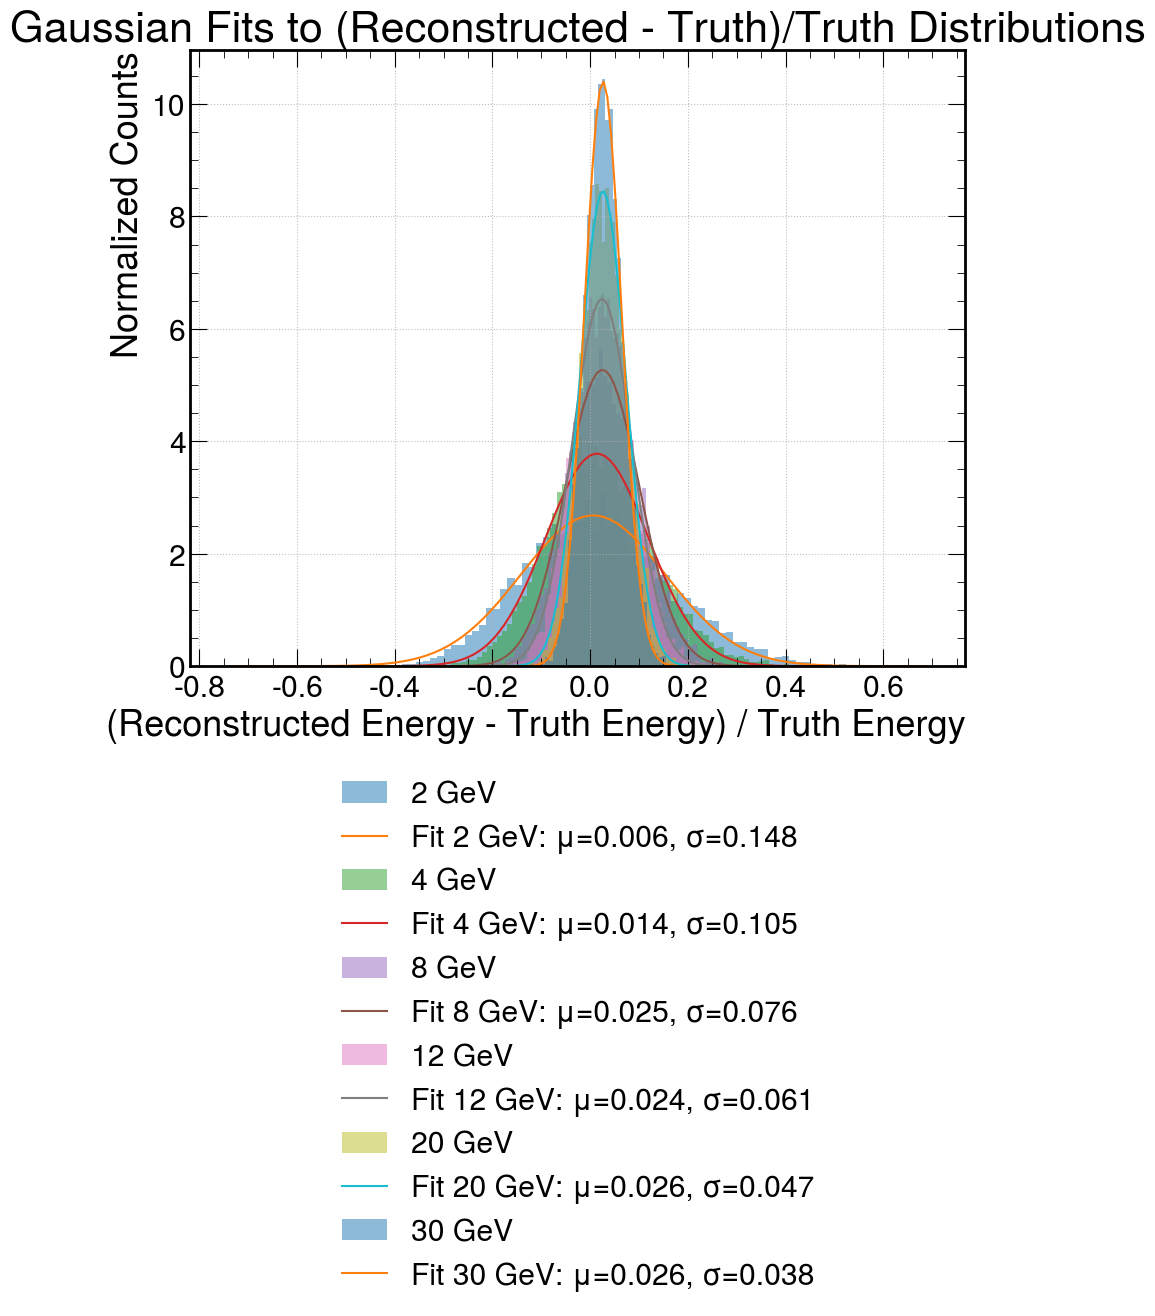

Beam Energy: 2 GeV, mu: 0.006, sigma: 0.148
Beam Energy: 4 GeV, mu: 0.014, sigma: 0.105
Beam Energy: 8 GeV, mu: 0.025, sigma: 0.076
Beam Energy: 12 GeV, mu: 0.024, sigma: 0.061
Beam Energy: 20 GeV, mu: 0.026, sigma: 0.047
Beam Energy: 30 GeV, mu: 0.026, sigma: 0.038


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as ur
import awkward as ak
import os
from scipy.optimize import curve_fit

# Gaussian function to fit the data
def gaussian(x, mu, sigma, A):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define the directory and the file names
data_directory = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/"
#beam_energies = [2, 4, 8, 12, 20, 30]

# List all files in the directory
files_in_directory = os.listdir(data_directory)
print("Files in directory:", files_in_directory)

# Initialize lists to store mu and sigma values for each energy
mu_values = []
sigma_values = []

# Initialize the figure for plotting
plt.figure(figsize=(10, 8))

# Loop over each beam energy
for energy in beam_energies:
    file_name = f"reco_zdc_prototype_e-_{energy}GeV.edm4hep.root"
    """file_name = "reco_zdc_prototype_e-_2GeV.edm4hep.root"
    file_name = "reco_zdc_prototype_e-_4GeV.edm4hep.root"
    file_name = "reco_zdc_prototype_e-_12GeV.edm4hep.root"
    file_name = "reco_zdc_prototype_e-_20GeV.edm4hep.root"
    file_name = "reco_zdc_prototype_e-_30GeV.edm4hep.root" """
    file_path = os.path.join(data_directory, file_name)
    
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    
    with ur.open(file_path) as file:
        # List all keys in the file
        keys = file.keys()
        print(f"Keys in file {file_name}: {keys}")
        
        # Find the correct key for events
        event_key = None
        for key in keys:
            if key.startswith('events;'):
                event_key = key
                break
        
        if event_key is None:
            print(f"No events key found in file: {file_name}")
            continue
        
        events = file[event_key]
        zdc_reco = events.arrays(["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"])
        
        # Combine the cell energies for each event
        combined_energy_per_event = ak.sum(zdc_reco["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"], axis=1)
        
        # Convert to numpy array
        combined_energy_per_event = ak.to_numpy(combined_energy_per_event) / .02
        
        # Compute (reco - truth) / truth
        reco_minus_truth_over_truth = (combined_energy_per_event - energy) / energy
        
        # Create a histogram of the distribution
        hist_data, bin_edges = np.histogram(reco_minus_truth_over_truth, bins=100, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Check if there's enough data to fit
        if len(hist_data) < 3:
            print(f"Not enough data to fit for {energy} GeV")
            continue
        
        # Fit a Gaussian to the histogram with better initial guesses
        try:
            p0 = [np.mean(reco_minus_truth_over_truth), np.std(reco_minus_truth_over_truth), np.max(hist_data)]
            popt, pcov = curve_fit(gaussian, bin_centers, hist_data, p0=p0)
            mu, sigma, A = popt

            # Store the mu and sigma values
            mu_values.append(mu)
            sigma_values.append(sigma)
            
            # Plot the histogram and the Gaussian fit
            plt.hist(reco_minus_truth_over_truth, bins=100, density=True, alpha=0.5, label=f'{energy} GeV')
            plt.plot(bin_centers, gaussian(bin_centers, *popt), label=f'Fit {energy} GeV: μ={mu:.3f}, σ={sigma:.3f}')
        except RuntimeError:
            print(f"Fit failed for {energy} GeV")
            continue

# Configure the plot
plt.xlabel("(Reconstructed Energy - Truth Energy) / Truth Energy")
plt.ylabel("Normalized Counts")
plt.title("Gaussian Fits to (Reconstructed - Truth)/Truth Distributions")
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.6))
plt.grid(True)
plt.show()

# Print out the mu and sigma values for each energy
for energy, mu, sigma in zip(beam_energies, mu_values, sigma_values):
    print(f'Beam Energy: {energy} GeV, mu: {mu:.3f}, sigma: {sigma:.3f}')


Files in directory: ['reco_zdc_prototype_e-_12GeV.edm4hep.root', 'reco_zdc_prototype_e-_20GeV.edm4hep.root', 'reco_zdc_prototype_e-_2GeV.edm4hep.root', 'reco_zdc_prototype_e-_30GeV.edm4hep.root', 'reco_zdc_prototype_e-_4GeV.edm4hep.root', 'reco_zdc_prototype_e-_8GeV.edm4hep.root', 'reco_zdc_prototype_proton_120GeV.edm4hep.root']
Keys in file reco_zdc_prototype_e-_2GeV.edm4hep.root: ['events;12', 'events;11', 'podio_metadata;1']


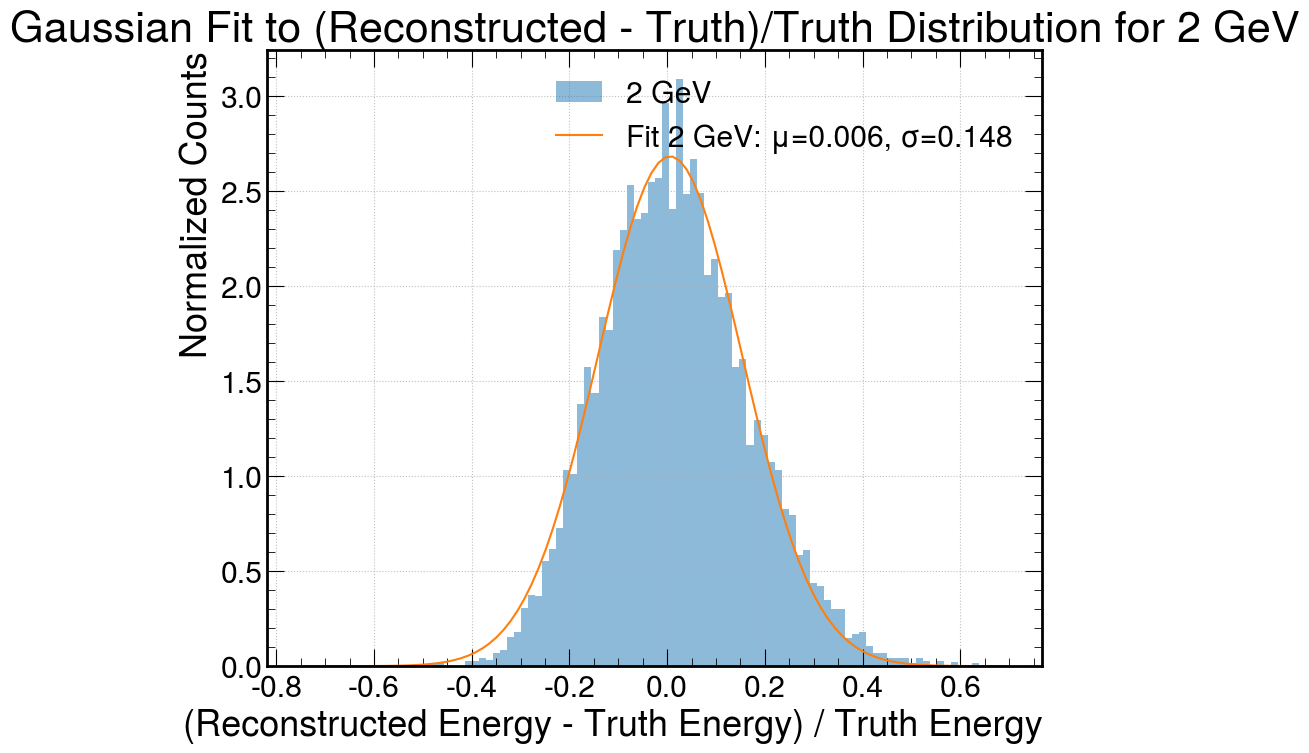

Beam Energy: 2 GeV, mu: 0.006, sigma: 0.148
Keys in file reco_zdc_prototype_e-_4GeV.edm4hep.root: ['events;24', 'events;23', 'podio_metadata;1']


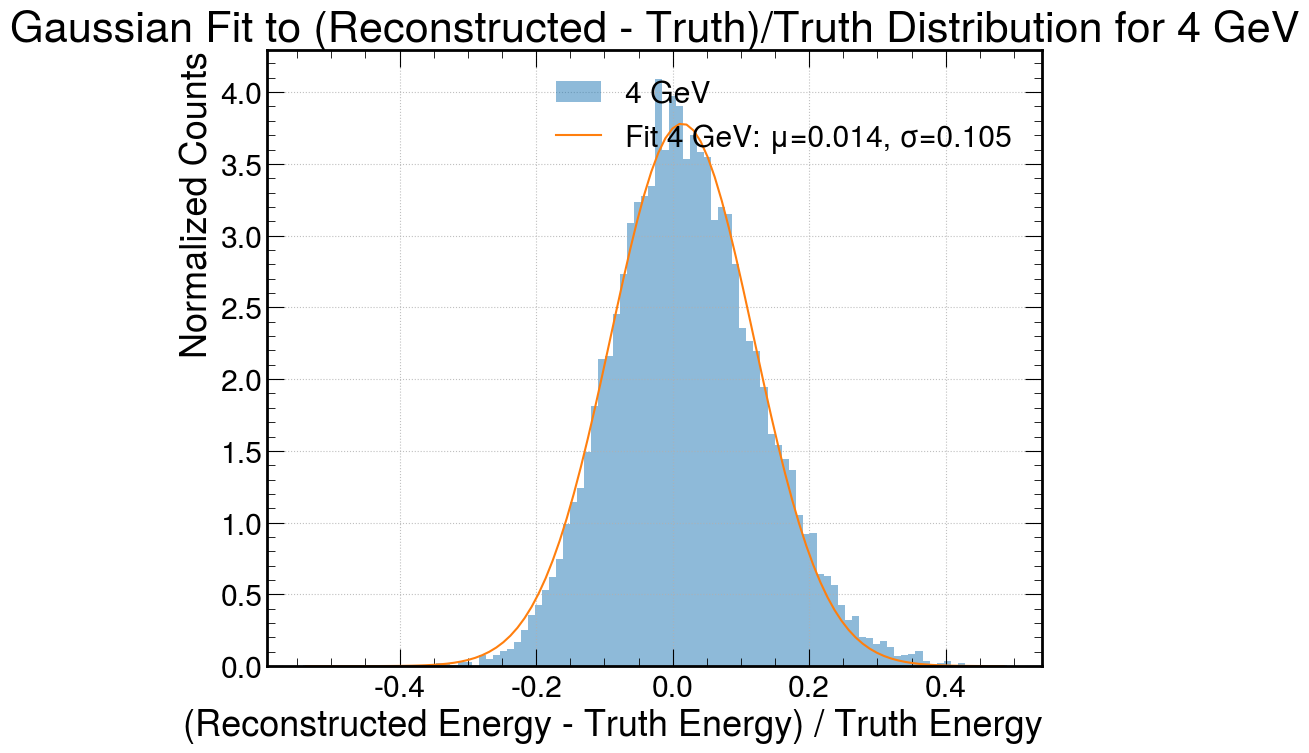

Beam Energy: 4 GeV, mu: 0.014, sigma: 0.105
Keys in file reco_zdc_prototype_e-_8GeV.edm4hep.root: ['events;48', 'events;47', 'podio_metadata;1']


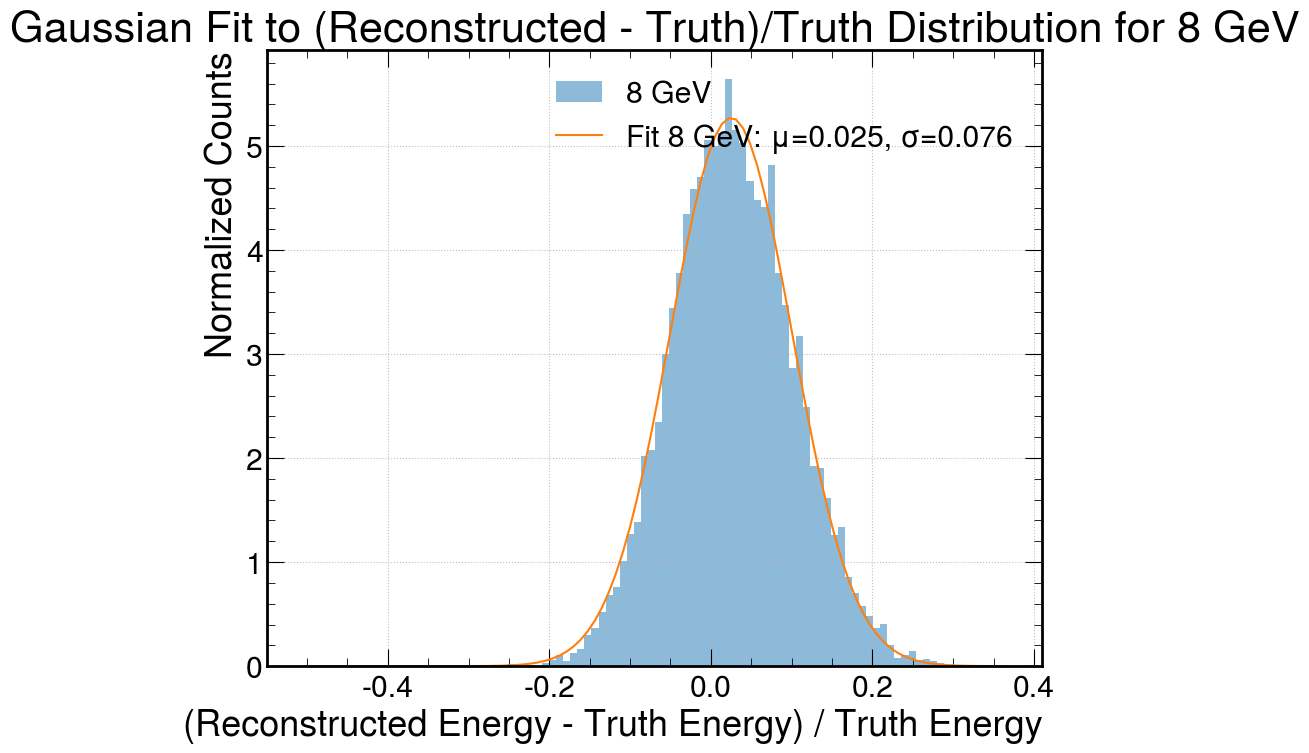

Beam Energy: 8 GeV, mu: 0.025, sigma: 0.076
Keys in file reco_zdc_prototype_e-_12GeV.edm4hep.root: ['events;73', 'events;72', 'podio_metadata;1']


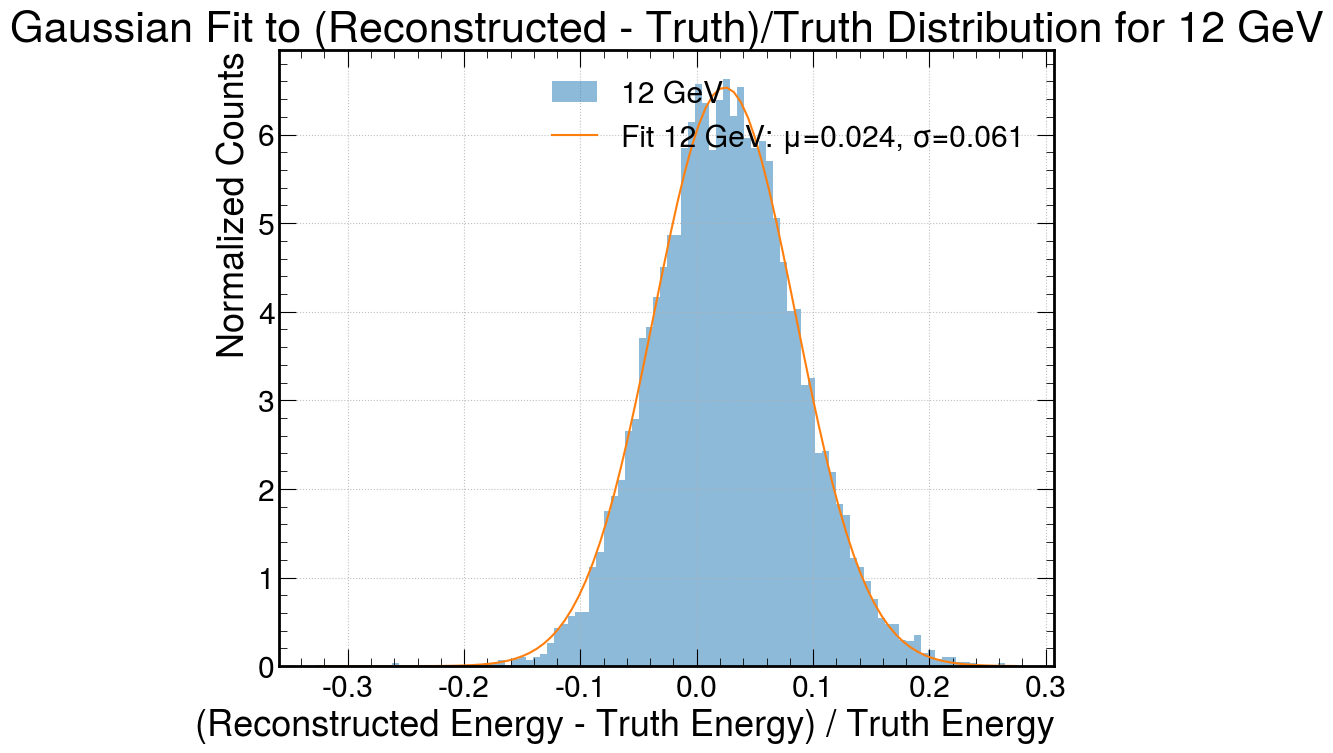

Beam Energy: 12 GeV, mu: 0.024, sigma: 0.061
Keys in file reco_zdc_prototype_e-_20GeV.edm4hep.root: ['events;130', 'events;129', 'podio_metadata;1']


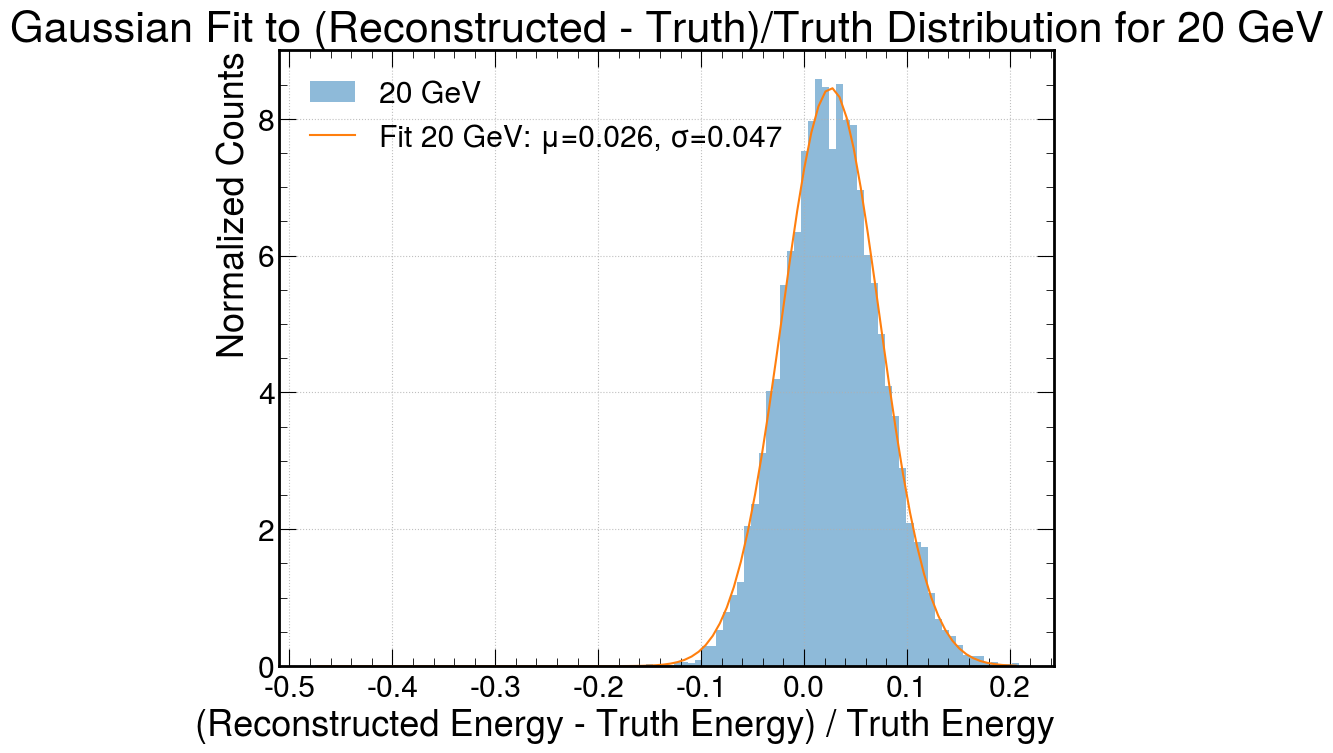

Beam Energy: 20 GeV, mu: 0.026, sigma: 0.047
Keys in file reco_zdc_prototype_e-_30GeV.edm4hep.root: ['events;193', 'events;192', 'podio_metadata;1']


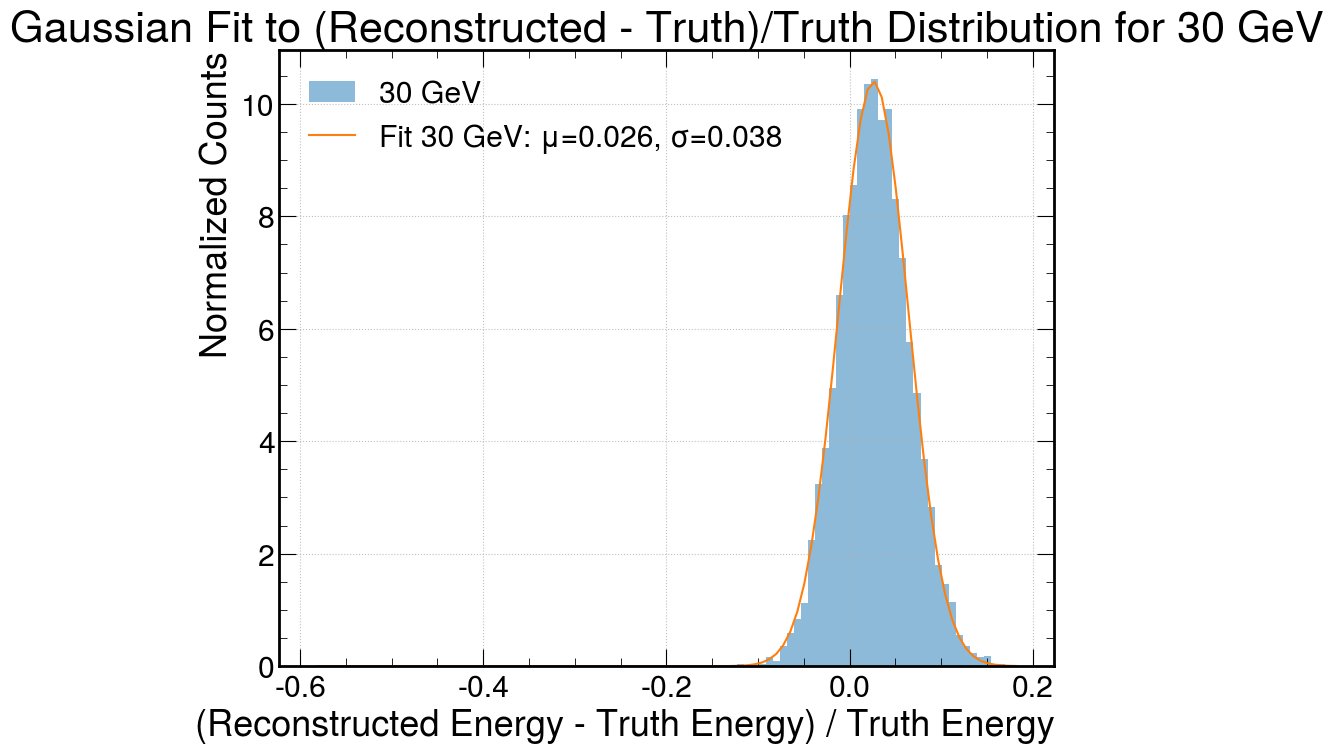

Beam Energy: 30 GeV, mu: 0.026, sigma: 0.038


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as ur
import awkward as ak
import os
from scipy.optimize import curve_fit

# Gaussian function to fit the data
def gaussian(x, mu, sigma, A):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define the directory and the file names
data_directory = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/"
beam_energies = [2, 4, 8, 12, 20, 30]

# List all files in the directory
files_in_directory = os.listdir(data_directory)
print("Files in directory:", files_in_directory)

# Initialize lists to store mu and sigma values for each energy
mu_values = []
sigma_values = []

# Loop over each beam energy
for energy in beam_energies:
    file_name = f"reco_zdc_prototype_e-_{energy}GeV.edm4hep.root"
    file_path = os.path.join(data_directory, file_name)
    
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    
    with ur.open(file_path) as file:
        # List all keys in the file
        keys = file.keys()
        print(f"Keys in file {file_name}: {keys}")
        
        # Find the correct key for events
        event_key = None
        for key in keys:
            if key.startswith('events;'):
                event_key = key
                break
        
        if event_key is None:
            print(f"No events key found in file: {file_name}")
            continue
        
        events = file[event_key]
        zdc_reco = events.arrays(["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"])
        
        # Combine the cell energies for each event
        combined_energy_per_event = ak.sum(zdc_reco["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"], axis=1)
        
        # Convert to numpy array
        combined_energy_per_event = ak.to_numpy(combined_energy_per_event) / .02
        
        # Compute (reco - truth) / truth
        reco_minus_truth_over_truth = (combined_energy_per_event - energy) / energy
        
        # Create a histogram of the distribution
        hist_data, bin_edges = np.histogram(reco_minus_truth_over_truth, bins=100, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Check if there's enough data to fit
        if len(hist_data) < 3:
            print(f"Not enough data to fit for {energy} GeV")
            continue
        
        # Fit a Gaussian to the histogram with better initial guesses
        try:
            p0 = [np.mean(reco_minus_truth_over_truth), np.std(reco_minus_truth_over_truth), np.max(hist_data)]
            popt, pcov = curve_fit(gaussian, bin_centers, hist_data, p0=p0)
            mu, sigma, A = popt

            # Store the mu and sigma values
            mu_values.append(mu)
            sigma_values.append(sigma)
            
            # Plot the histogram and the Gaussian fit
            plt.figure(figsize=(10, 8))
            plt.hist(reco_minus_truth_over_truth, bins=100, density=True, alpha=0.5, label=f'{energy} GeV')
            plt.plot(bin_centers, gaussian(bin_centers, *popt), label=f'Fit {energy} GeV: μ={mu:.3f}, σ={sigma:.3f}')
            
            # Configure the plot
            plt.xlabel("(Reconstructed Energy - Truth Energy) / Truth Energy")
            plt.ylabel("Normalized Counts")
            plt.title(f"Gaussian Fit to (Reconstructed - Truth)/Truth Distribution for {energy} GeV")
            plt.legend(loc='best')
            plt.grid(True)
            plt.show()
            
            # Print out the mu and sigma values for the current energy
            print(f'Beam Energy: {energy} GeV, mu: {mu:.3f}, sigma: {sigma:.3f}')
        
        except RuntimeError:
            print(f"Fit failed for {energy} GeV")
            continue


Trying to open: /media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/reco_zdc_prototype_e-_2GeV.edm4hep.root
Keys in file reco_zdc_prototype_e-_2GeV.edm4hep.root: ['events;12', 'events;11', 'podio_metadata;1']
Number of events: 10000
Trying to open: /media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/reco_zdc_prototype_e-_4GeV.edm4hep.root
Keys in file reco_zdc_prototype_e-_4GeV.edm4hep.root: ['events;24', 'events;23', 'podio_metadata;1']
Number of events: 10000
Trying to open: /media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/reco_zdc_prototype_e-_8GeV.edm4hep.root
Keys in file reco_zdc_prototype_e-_8GeV.edm4hep.root: ['events;48', 'events;47', 'podio_metadata;1']
Number of events: 10000
Trying to open: /media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/reco_zdc_prototype_e-_12GeV.edm4hep.root
Keys in file reco_zdc_prototype_e-_12GeV.edm4hep.root: ['events;73', 'events;72', 'podio_metadata;1']
Number of events: 10000
Trying to open: /media/mig

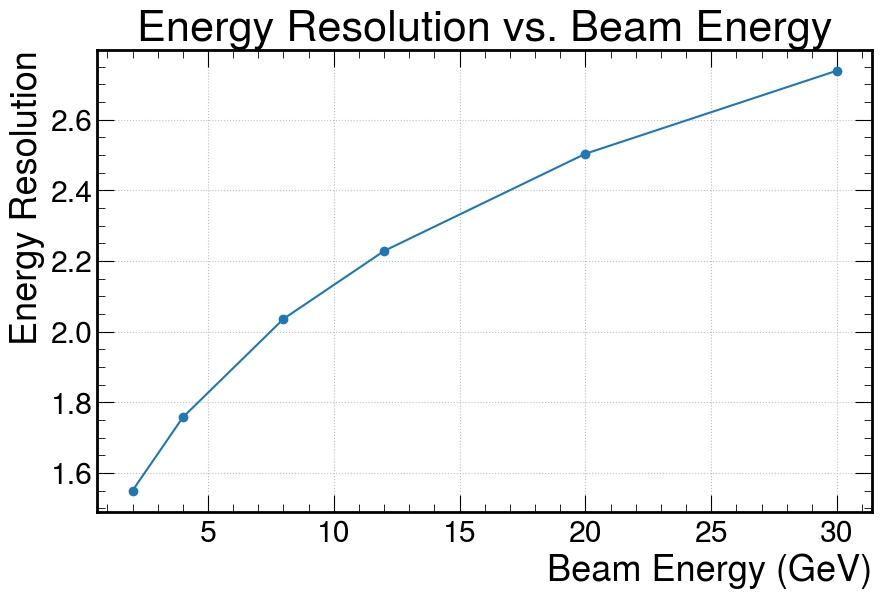

In [23]:
import uproot as ur
import matplotlib.pyplot as plt
import numpy as np
import re

data_directory = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/"
file_names = [
    "reco_zdc_prototype_e-_2GeV.edm4hep.root",
    "reco_zdc_prototype_e-_4GeV.edm4hep.root",
    "reco_zdc_prototype_e-_8GeV.edm4hep.root",
    "reco_zdc_prototype_e-_12GeV.edm4hep.root",
    "reco_zdc_prototype_e-_20GeV.edm4hep.root",
    "reco_zdc_prototype_e-_30GeV.edm4hep.root"
]

# Define expected events keys
expected_keys = {
    'reco_zdc_prototype_e-_2GeV.edm4hep.root': 'events;12',
    'reco_zdc_prototype_e-_4GeV.edm4hep.root': 'events;24',
    'reco_zdc_prototype_e-_8GeV.edm4hep.root': 'events;48',
    'reco_zdc_prototype_e-_12GeV.edm4hep.root': 'events;73',
    'reco_zdc_prototype_e-_20GeV.edm4hep.root': 'events;130',
    'reco_zdc_prototype_e-_30GeV.edm4hep.root': 'events;193'
}

# Initialize lists for storing beam energies and corresponding resolutions
beam_energies = []
energy_resolutions = []

for file_name in file_names:
    file_path = data_directory + file_name
    print(f"Trying to open: {file_path}")
    try:
        with ur.open(file_path) as file:
            # Check the available keys
            keys = file.keys()
            print(f"Keys in file {file_name}: {keys}")

            # Determine the expected key for this file
            expected_key = expected_keys.get(file_name, None)
            
            if expected_key and expected_key in keys:
                events = file[expected_key]
                num_events = events.num_entries
                print(f"Number of events: {num_events}")

                # Extract energy data from the events tree
                reconstructed_energy = events["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"].array()
                
                # Calculate mean, sigma, and energy resolution
                mean_energy = np.mean(reconstructed_energy)
                sigma_energy = np.std(reconstructed_energy)
                energy_resolution = sigma_energy / mean_energy
                
                # Extract beam energy from the file name using regex
                match = re.search(r'(\d+)GeV', file_name)
                if match:
                    beam_energy_value = float(match.group(1))
                    beam_energies.append(beam_energy_value)
                    energy_resolutions.append(energy_resolution)
                else:
                    print(f"Failed to extract beam energy from file name {file_name}")
                
            else:
                print(f"Expected key '{expected_key}' not found in file {file_name}")

    except Exception as e:
        print(f"Failed to process {file_name}: {e}")

# After processing all files, plot the results
if beam_energies and energy_resolutions:
    plt.figure(figsize=(10, 6))
    plt.plot(beam_energies, energy_resolutions, marker='o')
    plt.xlabel('Beam Energy (GeV)')
    plt.ylabel('Energy Resolution')
    plt.title('Energy Resolution vs. Beam Energy')
    plt.grid(True)
    plt.show()
else:
    print("No valid data to plot.")


Processed reco_zdc_prototype_e-_2GeV.edm4hep.root with 9592 events.
Processed reco_zdc_prototype_e-_4GeV.edm4hep.root with 9844 events.
Processed reco_zdc_prototype_e-_8GeV.edm4hep.root with 9964 events.
Processed reco_zdc_prototype_e-_12GeV.edm4hep.root with 9864 events.
Processed reco_zdc_prototype_e-_20GeV.edm4hep.root with 9933 events.
Processed reco_zdc_prototype_e-_30GeV.edm4hep.root with 9984 events.


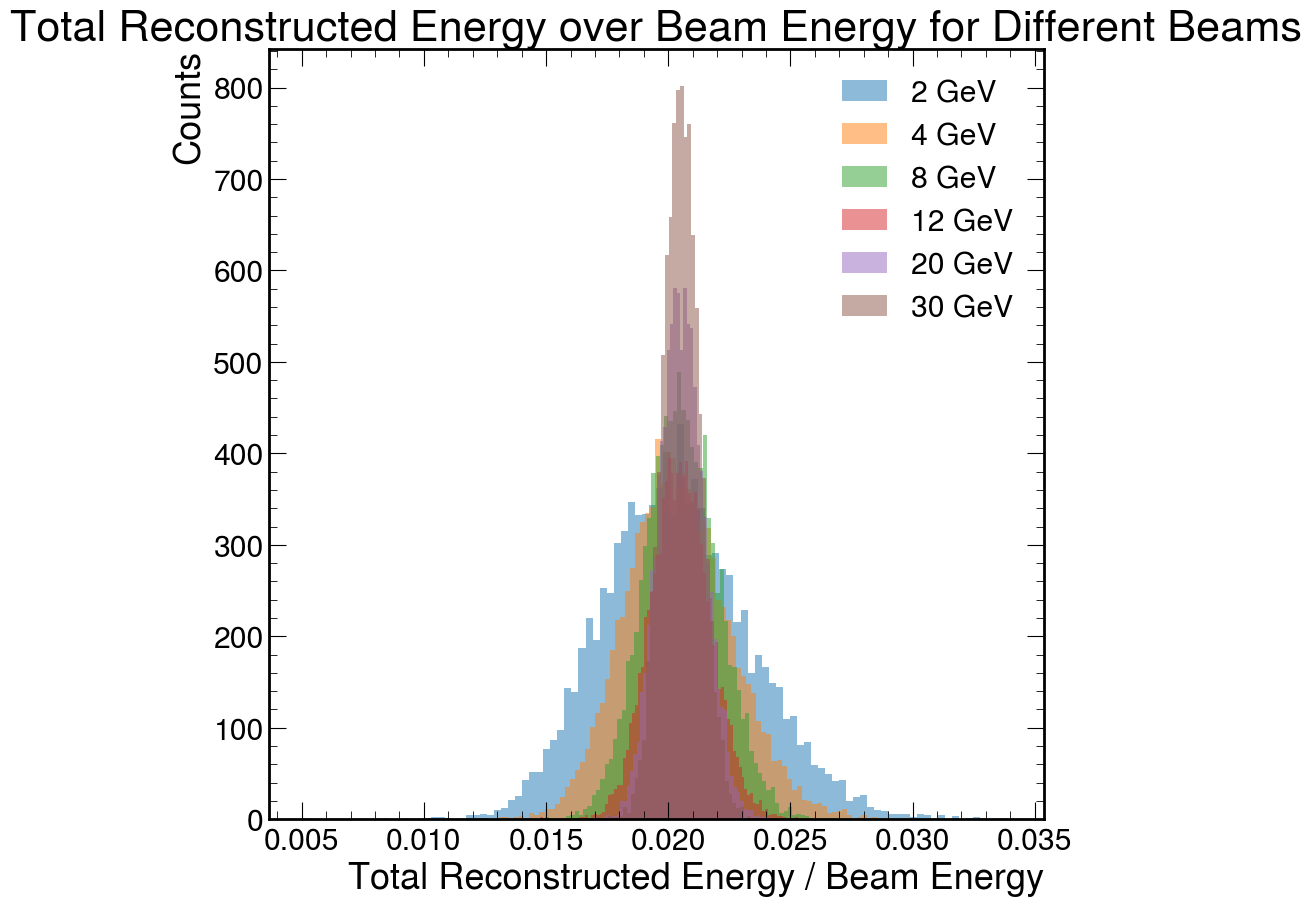

In [24]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

# Define the file directory and list of ROOT files
data_directory = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/"
file_names = [
    "reco_zdc_prototype_e-_2GeV.edm4hep.root",
    "reco_zdc_prototype_e-_4GeV.edm4hep.root",
    "reco_zdc_prototype_e-_8GeV.edm4hep.root",
    "reco_zdc_prototype_e-_12GeV.edm4hep.root",
    "reco_zdc_prototype_e-_20GeV.edm4hep.root",
    "reco_zdc_prototype_e-_30GeV.edm4hep.root"
]

# Mapping from file name to beam energy in GeV
beam_energies = {
    "reco_zdc_prototype_e-_2GeV.edm4hep.root": 2,
    "reco_zdc_prototype_e-_4GeV.edm4hep.root": 4,
    "reco_zdc_prototype_e-_8GeV.edm4hep.root": 8,
    "reco_zdc_prototype_e-_12GeV.edm4hep.root": 12,
    "reco_zdc_prototype_e-_20GeV.edm4hep.root": 20,
    "reco_zdc_prototype_e-_30GeV.edm4hep.root": 30
}

# Initialize a list to store ratios
ratios = {}

# Loop over each file and calculate the reconstructed energy ratio
for file_name in file_names:
    file_path = f"{data_directory}/{file_name}"
    beam_energy = beam_energies[file_name]

    try:
        # Open the ROOT file
        with uproot.open(file_path) as file:
            # Assuming the correct key is always the last "events" key
            events_key = [key for key in file.keys() if "events" in key][-1]
            events = file[events_key]
            
            # Extract the reconstructed energy array
            reconstructed_energy = events["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"].array()
            
            # Sum the energy for each event to get a single energy value per event
            total_energy_per_event = ak.sum(reconstructed_energy, axis=1)
            
            # Calculate the ratio of total reconstructed energy over beam energy
            ratio = total_energy_per_event / beam_energy
            ratios[file_name] = ratio
            
            # Plot the histogram of the ratio
            plt.hist(ratio, bins=100, alpha=0.5, label=f"{beam_energy} GeV")

            print(f"Processed {file_name} with {len(total_energy_per_event)} events.")
    except Exception as e:
        print(f"Failed to process {file_name}: {e}")

# Customize and show the plot
plt.xlabel("Total Reconstructed Energy / Beam Energy")
plt.ylabel("Counts")
plt.legend()
plt.title("Total Reconstructed Energy over Beam Energy for Different Beams")
plt.show()


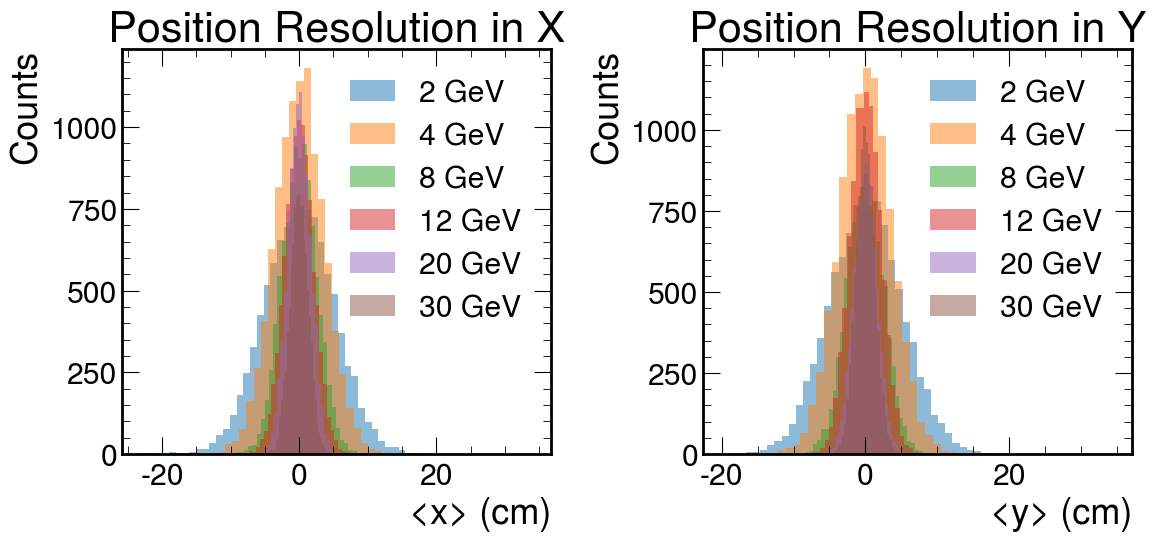

In [25]:
import uproot as ur
import numpy as np
import matplotlib.pyplot as plt

# Define the file path and the file names
data_directory = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/"
file_names = [
    "reco_zdc_prototype_e-_2GeV.edm4hep.root",
    "reco_zdc_prototype_e-_4GeV.edm4hep.root",
    "reco_zdc_prototype_e-_8GeV.edm4hep.root",
    "reco_zdc_prototype_e-_12GeV.edm4hep.root",
    "reco_zdc_prototype_e-_20GeV.edm4hep.root",
    "reco_zdc_prototype_e-_30GeV.edm4hep.root"
]

# Mapping from file name to beam energy in GeV
beam_energies = {
    "reco_zdc_prototype_e-_2GeV.edm4hep.root": 2,
    "reco_zdc_prototype_e-_4GeV.edm4hep.root": 4,
    "reco_zdc_prototype_e-_8GeV.edm4hep.root": 8,
    "reco_zdc_prototype_e-_12GeV.edm4hep.root": 12,
    "reco_zdc_prototype_e-_20GeV.edm4hep.root": 20,
    "reco_zdc_prototype_e-_30GeV.edm4hep.root": 30
}

# Prepare lists to hold position resolution data
mean_x_positions = []
mean_y_positions = []
energy_labels = []

# Loop through each file and calculate the position resolutions
for file_name in file_names:
    file_path = f"{data_directory}/{file_name}"
    
    # Open the ROOT file
    with ur.open(file_path) as file:
        # Access the 'events' tree and then the branches
        tree = file["events"]
        energy_data = tree["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"].array()
        x_positions = tree["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.x"].array()
        y_positions = tree["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.y"].array()

        # Calculate <x> and <y>
        mean_x = np.sum(energy_data * x_positions, axis=1) / np.sum(energy_data, axis=1)
        mean_y = np.sum(energy_data * y_positions, axis=1) / np.sum(energy_data, axis=1)

        # Store the calculated means
        mean_x_positions.append(mean_x)
        mean_y_positions.append(mean_y)
        energy_labels.append(f"{beam_energies[file_name]} GeV")

# Plot the position resolutions for different energies
plt.figure(figsize=(12, 6))

# Plot <x>
plt.subplot(1, 2, 1)
for i, energy in enumerate(energy_labels):
    plt.hist(mean_x_positions[i], bins=50, alpha=0.5, label=energy)
plt.title("Position Resolution in X")
plt.xlabel("<x> (cm)")
plt.ylabel("Counts")
plt.legend()

# Plot <y>
plt.subplot(1, 2, 2)
for i, energy in enumerate(energy_labels):
    plt.hist(mean_y_positions[i], bins=50, alpha=0.5, label=energy)
plt.title("Position Resolution in Y")
plt.xlabel("<y> (cm)")
plt.ylabel("Counts")
plt.legend()

plt.tight_layout()
plt.show()


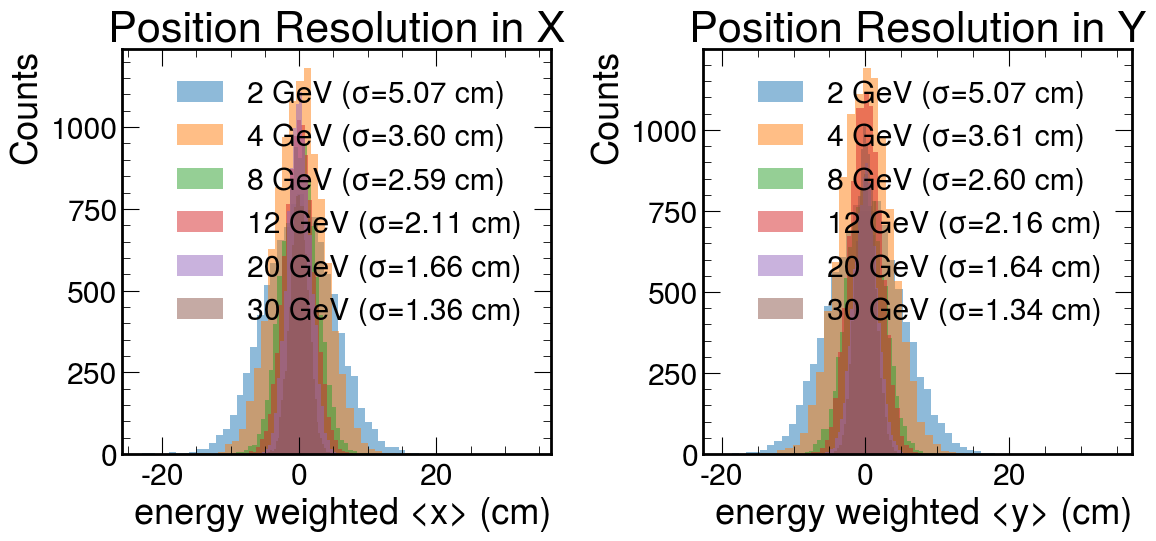

Sigma values for X positions:
2 GeV: 5.07 cm
4 GeV: 3.60 cm
8 GeV: 2.59 cm
12 GeV: 2.11 cm
20 GeV: 1.66 cm
30 GeV: 1.36 cm

Sigma values for Y positions:
2 GeV: 5.07 cm
4 GeV: 3.61 cm
8 GeV: 2.60 cm
12 GeV: 2.16 cm
20 GeV: 1.64 cm
30 GeV: 1.34 cm


In [26]:
import uproot as ur
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import awkward as ak

# Gaussian function
def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Define the file path and the file names
data_directory = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/"
file_names = [
    "reco_zdc_prototype_e-_2GeV.edm4hep.root",
    "reco_zdc_prototype_e-_4GeV.edm4hep.root",
    "reco_zdc_prototype_e-_8GeV.edm4hep.root",
    "reco_zdc_prototype_e-_12GeV.edm4hep.root",
    "reco_zdc_prototype_e-_20GeV.edm4hep.root",
    "reco_zdc_prototype_e-_30GeV.edm4hep.root"
]

# Mapping from file name to beam energy in GeV
beam_energies = {
    "reco_zdc_prototype_e-_2GeV.edm4hep.root": 2,
    "reco_zdc_prototype_e-_4GeV.edm4hep.root": 4,
    "reco_zdc_prototype_e-_8GeV.edm4hep.root": 8,
    "reco_zdc_prototype_e-_12GeV.edm4hep.root": 12,
    "reco_zdc_prototype_e-_20GeV.edm4hep.root": 20,
    "reco_zdc_prototype_e-_30GeV.edm4hep.root": 30
}

# Prepare lists to hold position resolution data
mean_x_positions = []
mean_y_positions = []
energy_labels = []
sigmas_x = []
sigmas_y = []

# Loop through each file and calculate the position resolutions
for file_name in file_names:
    file_path = f"{data_directory}/{file_name}"
    
    # Open the ROOT file
    with ur.open(file_path) as file:
        # Access the 'events' tree and then the branches
        tree = file["events"]
        energy_data = tree["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"].array()
        x_positions = tree["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.x"].array()
        y_positions = tree["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.y"].array()

        # Calculate <x> and <y> for each event
        mean_x = ak.sum(energy_data * x_positions, axis=1) / ak.sum(energy_data, axis=1)
        mean_y = ak.sum(energy_data * y_positions, axis=1) / ak.sum(energy_data, axis=1)

        # Convert to NumPy arrays
        mean_x = ak.to_numpy(mean_x)
        mean_y = ak.to_numpy(mean_y)

        # Store the calculated means
        mean_x_positions.append(mean_x)
        mean_y_positions.append(mean_y)
        energy_labels.append(f"{beam_energies[file_name]} GeV")

        # Fit Gaussian to <x>
        hist_x, bin_edges_x = np.histogram(mean_x, bins=50)
        bin_centers_x = (bin_edges_x[:-1] + bin_edges_x[1:]) / 2
        popt_x, _ = curve_fit(gaussian, bin_centers_x, hist_x, p0=[max(hist_x), np.mean(mean_x), np.std(mean_x)])
        sigmas_x.append(popt_x[2])

        # Fit Gaussian to <y>
        hist_y, bin_edges_y = np.histogram(mean_y, bins=50)
        bin_centers_y = (bin_edges_y[:-1] + bin_edges_y[1:]) / 2
        popt_y, _ = curve_fit(gaussian, bin_centers_y, hist_y, p0=[max(hist_y), np.mean(mean_y), np.std(mean_y)])
        sigmas_y.append(popt_y[2])

# Plot the position resolutions for different energies
plt.figure(figsize=(12, 6))

# Plot <x>
plt.subplot(1, 2, 1)
for i, energy in enumerate(energy_labels):
    plt.hist(mean_x_positions[i], bins=50, alpha=0.5, label=f'{energy} (σ={sigmas_x[i]:.2f} cm)')
plt.title("Position Resolution in X")
plt.xlabel("energy weighted <x> (cm)")
plt.ylabel("Counts")
plt.legend()

# Plot <y>
plt.subplot(1, 2, 2)
for i, energy in enumerate(energy_labels):
    plt.hist(mean_y_positions[i], bins=50, alpha=0.5, label=f'{energy} (σ={sigmas_y[i]:.2f} cm)')
plt.title("Position Resolution in Y")
plt.xlabel("energy weighted <y> (cm)")
plt.ylabel("Counts")
plt.legend()

plt.tight_layout()
plt.show()

# Print the sigma values
print("Sigma values for X positions:")
for i, energy in enumerate(energy_labels):
    print(f"{energy}: {sigmas_x[i]:.2f} cm")

print("\nSigma values for Y positions:")
for i, energy in enumerate(energy_labels):
    print(f"{energy}: {sigmas_y[i]:.2f} cm")


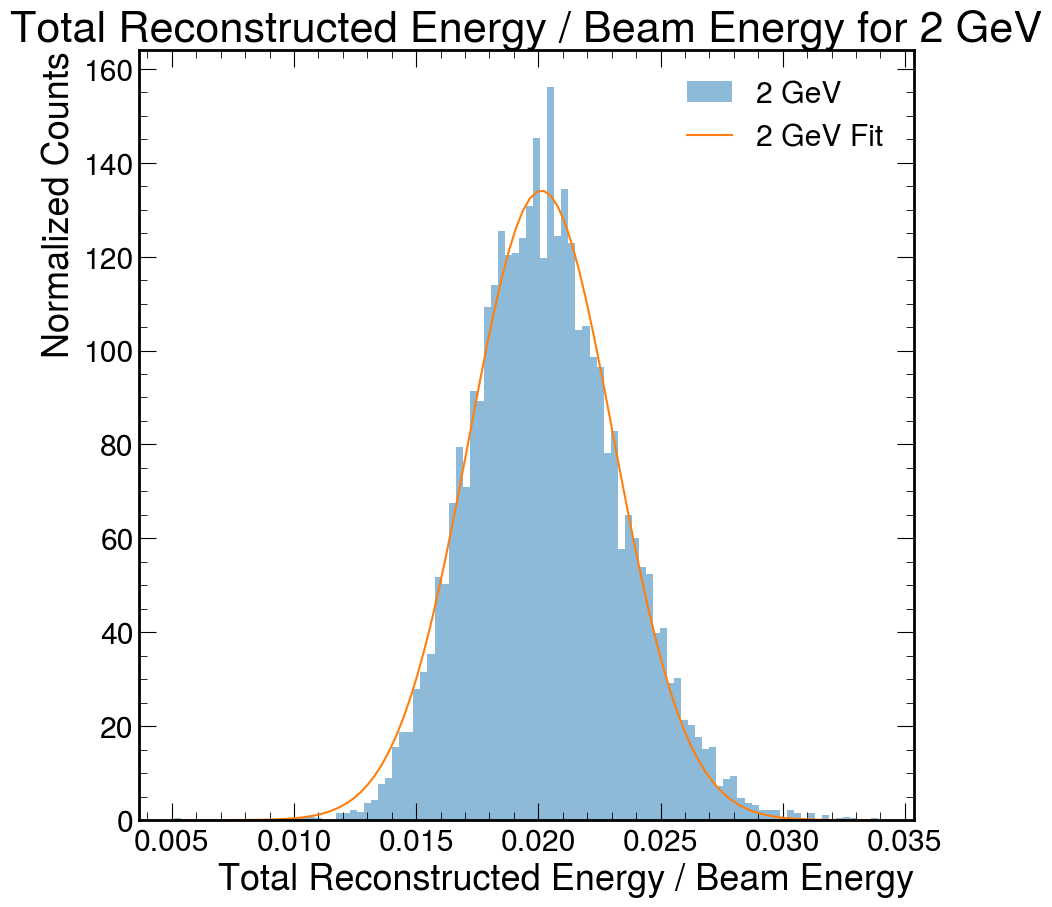

Processed reco_zdc_prototype_e-_2GeV.edm4hep.root with 9592 events.


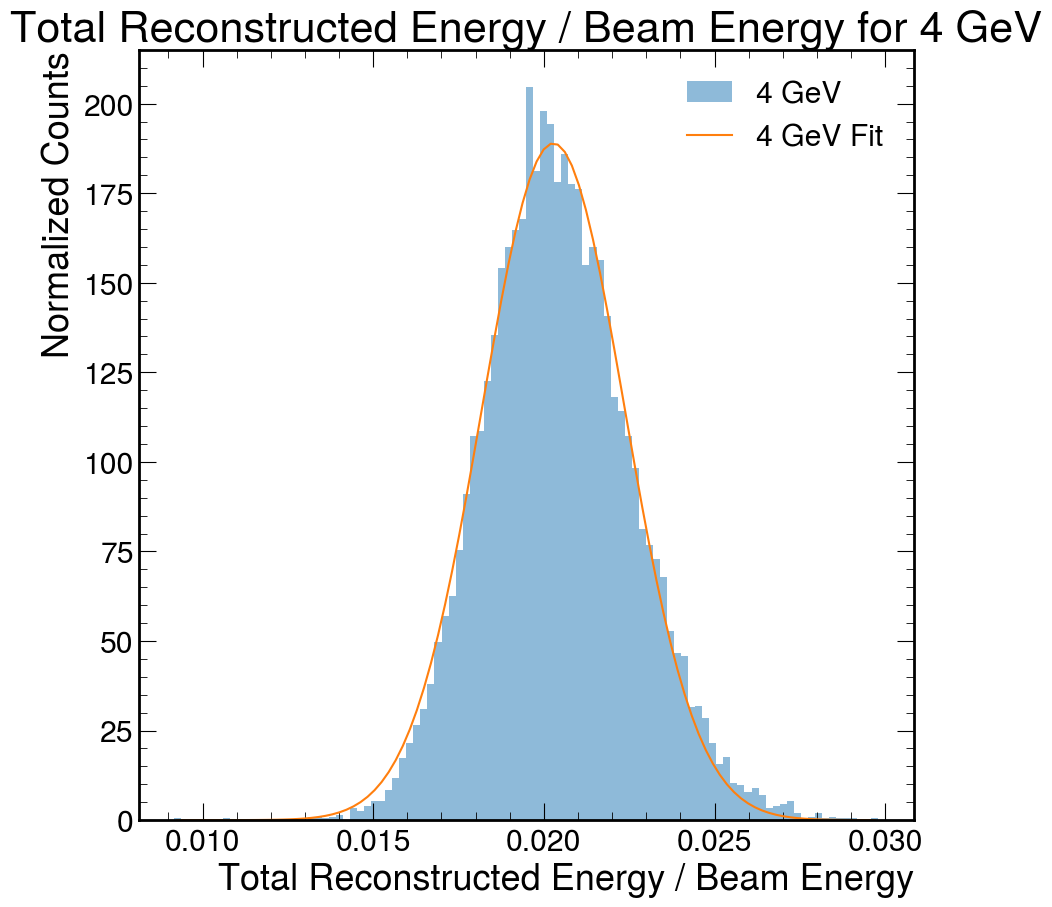

Processed reco_zdc_prototype_e-_4GeV.edm4hep.root with 9844 events.


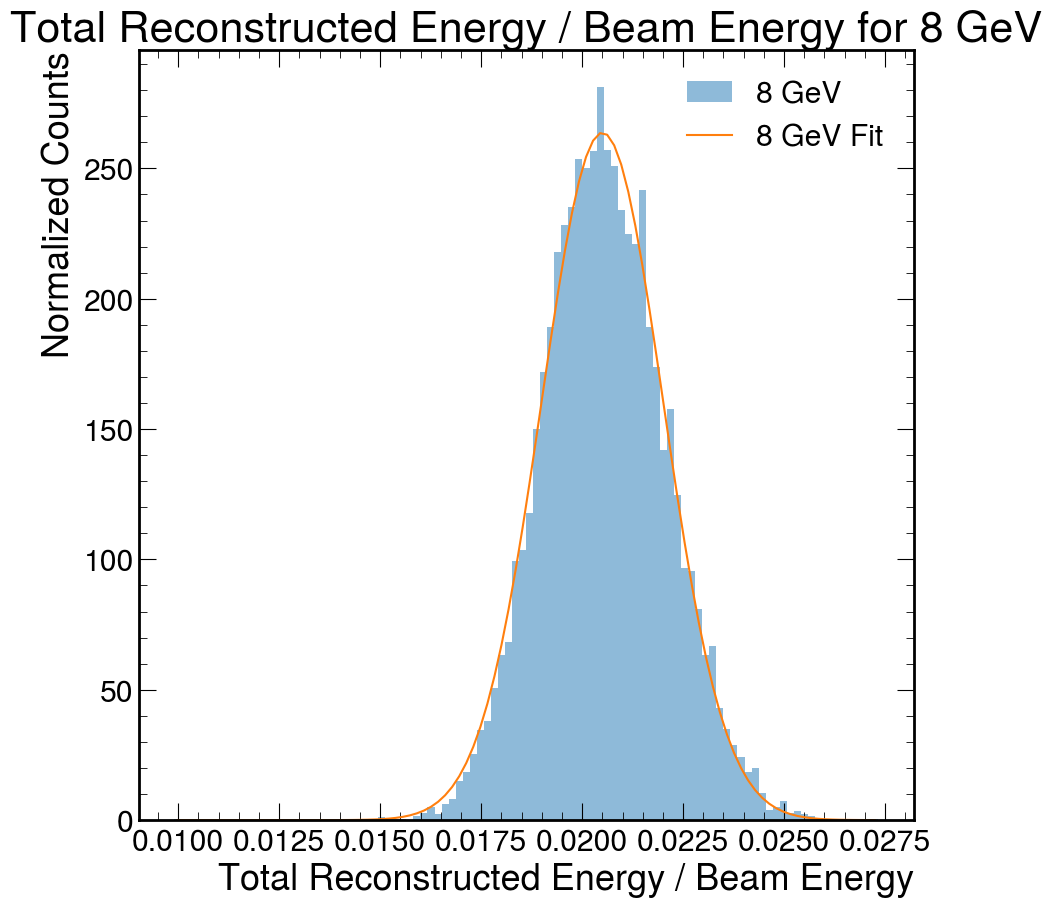

Processed reco_zdc_prototype_e-_8GeV.edm4hep.root with 9964 events.


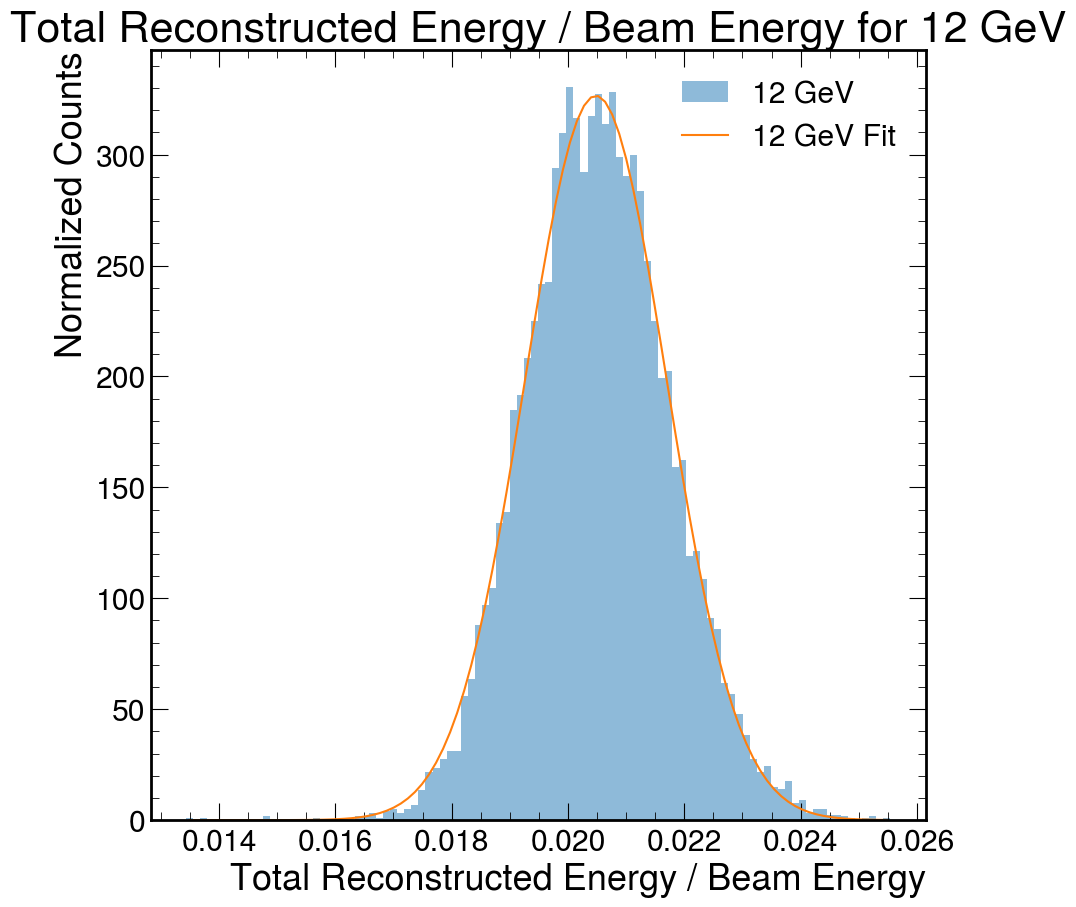

Processed reco_zdc_prototype_e-_12GeV.edm4hep.root with 9864 events.


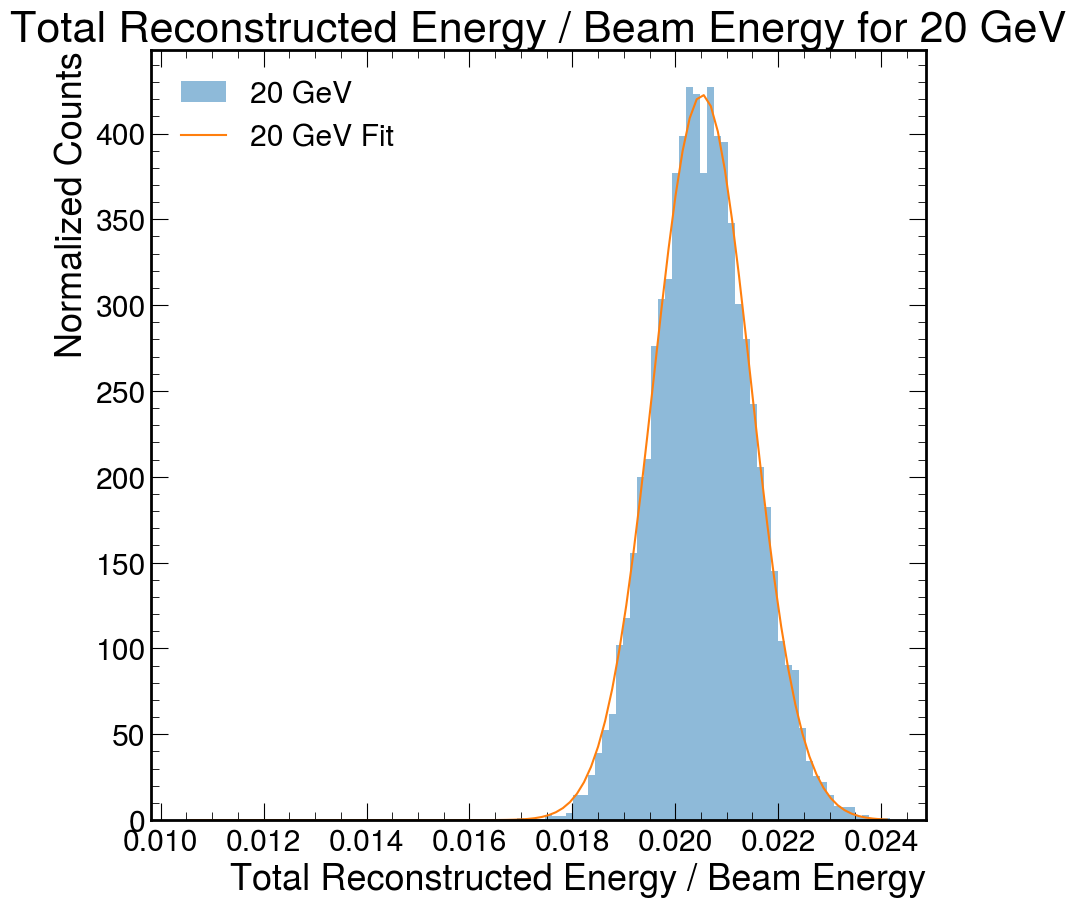

Processed reco_zdc_prototype_e-_20GeV.edm4hep.root with 9933 events.


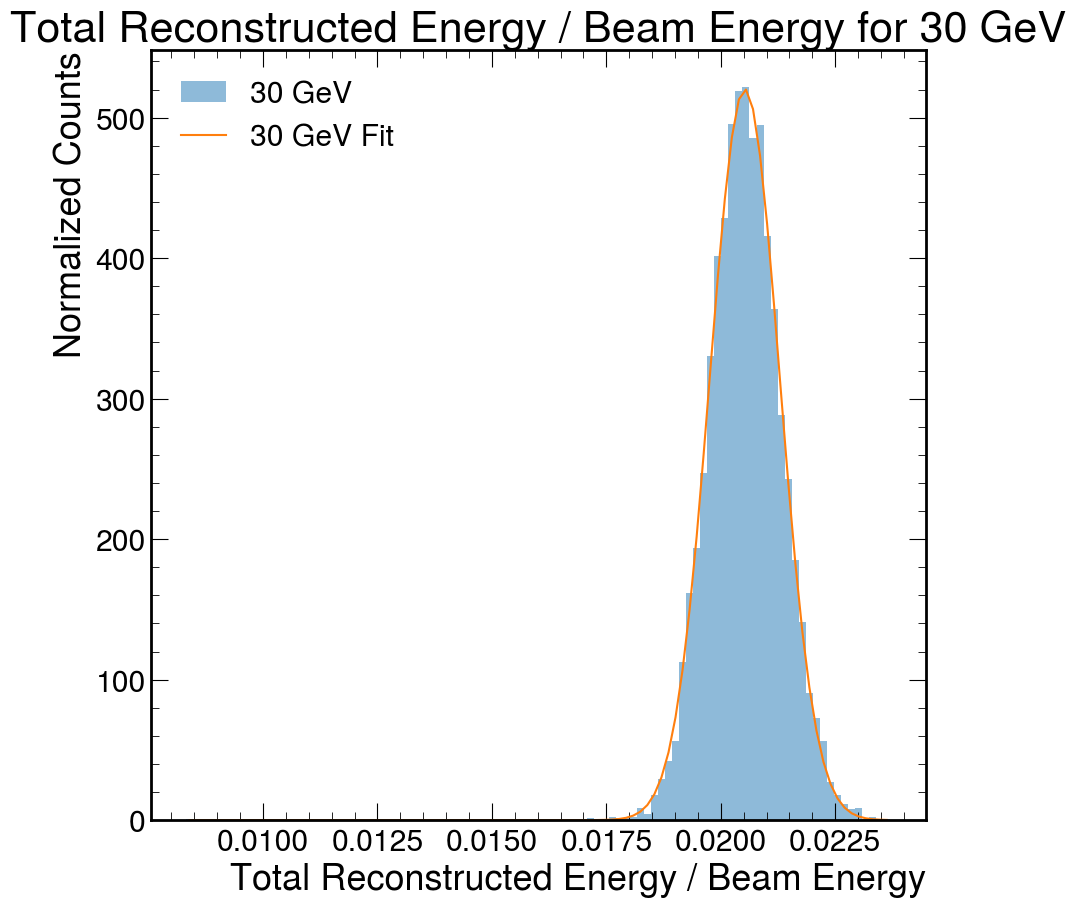

Processed reco_zdc_prototype_e-_30GeV.edm4hep.root with 9984 events.


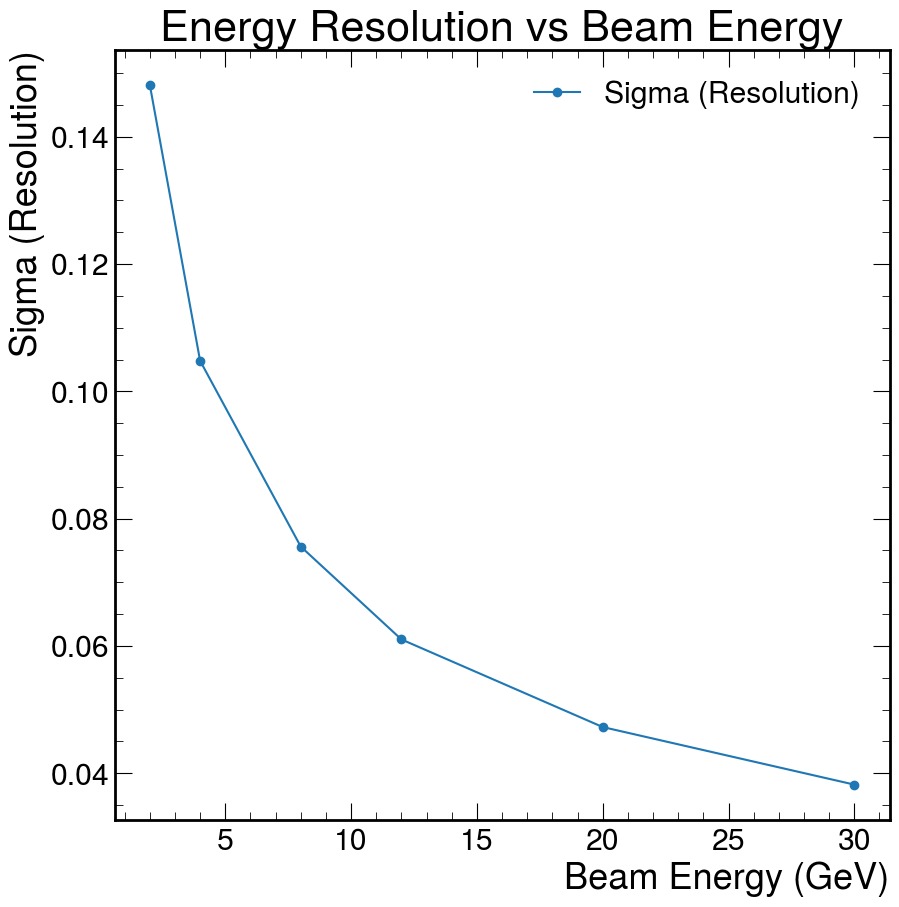

In [27]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, mean, sigma, amplitude):
    return amplitude * np.exp(-0.5 * ((x - mean) / sigma) ** 2)

# Define the file directory and list of ROOT files
data_directory = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/"
file_names = [
    "reco_zdc_prototype_e-_2GeV.edm4hep.root",
    "reco_zdc_prototype_e-_4GeV.edm4hep.root",
    "reco_zdc_prototype_e-_8GeV.edm4hep.root",
    "reco_zdc_prototype_e-_12GeV.edm4hep.root",
    "reco_zdc_prototype_e-_20GeV.edm4hep.root",
    "reco_zdc_prototype_e-_30GeV.edm4hep.root"
]

# Mapping from file name to beam energy in GeV
beam_energies = {
    "reco_zdc_prototype_e-_2GeV.edm4hep.root": 2,
    "reco_zdc_prototype_e-_4GeV.edm4hep.root": 4,
    "reco_zdc_prototype_e-_8GeV.edm4hep.root": 8,
    "reco_zdc_prototype_e-_12GeV.edm4hep.root": 12,
    "reco_zdc_prototype_e-_20GeV.edm4hep.root": 20,
    "reco_zdc_prototype_e-_30GeV.edm4hep.root": 30
}

# Create a figure for each energy
for file_name in file_names:
    file_path = f"{data_directory}/{file_name}"
    beam_energy = beam_energies[file_name]

    try:
        # Open the ROOT file
        with uproot.open(file_path) as file:
            # Assuming the correct key is always the last "events" key
            events_key = [key for key in file.keys() if "events" in key][-1]
            events = file[events_key]
            
            # Extract the reconstructed energy array
            reconstructed_energy = events["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"].array()
            
            # Sum the energy for each event to get a single energy value per event
            total_energy_per_event = ak.sum(reconstructed_energy, axis=1)
            
            # Calculate the ratio of total reconstructed energy over beam energy
            ratio = total_energy_per_event / beam_energy
            
            # Plot the histogram of the ratio
            fig, ax = plt.subplots()
            counts, bins, _ = ax.hist(ratio, bins=100, alpha=0.5, label=f"{beam_energy} GeV", density=True)
            
            # Fit a Gaussian to the histogram
            bin_centers = (bins[1:] + bins[:-1]) / 2
            popt, _ = curve_fit(gaussian, bin_centers, counts, p0=[1, 1, 1])
            mean, sigma, amplitude = popt
            
            # Plot the Gaussian fit
            ax.plot(bin_centers, gaussian(bin_centers, *popt), label=f"{beam_energy} GeV Fit")

            # Customize and show the plot
            ax.set_xlabel("Total Reconstructed Energy / Beam Energy")
            ax.set_ylabel("Normalized Counts")
            ax.legend()
            ax.set_title(f"Total Reconstructed Energy / Beam Energy for {beam_energy} GeV")
            plt.show()

            print(f"Processed {file_name} with {len(total_energy_per_event)} events.")
    except Exception as e:
        print(f"Failed to process {file_name}: {e}")

# Plot sigma values
plt.figure()
plt.plot(beam_energies.values(), sigma_values, 'o-', label="Sigma (Resolution)")
plt.xlabel("Beam Energy (GeV)")
plt.ylabel("Sigma (Resolution)")
plt.title("Energy Resolution vs Beam Energy")
plt.legend()
plt.show()


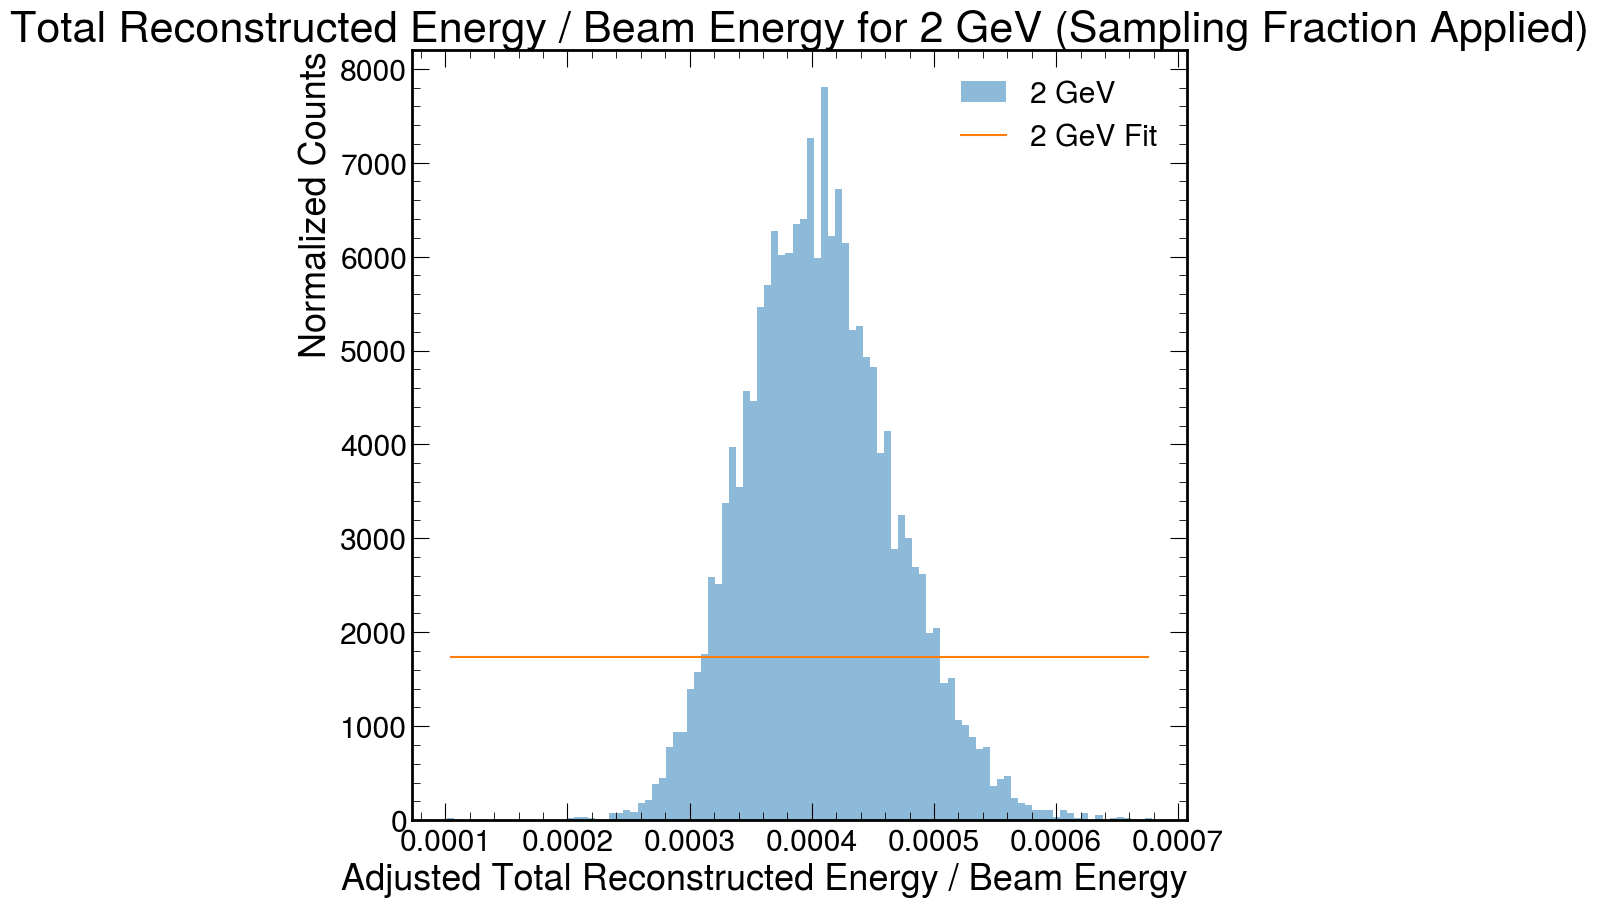

Processed reco_zdc_prototype_e-_2GeV.edm4hep.root with 9592 events.


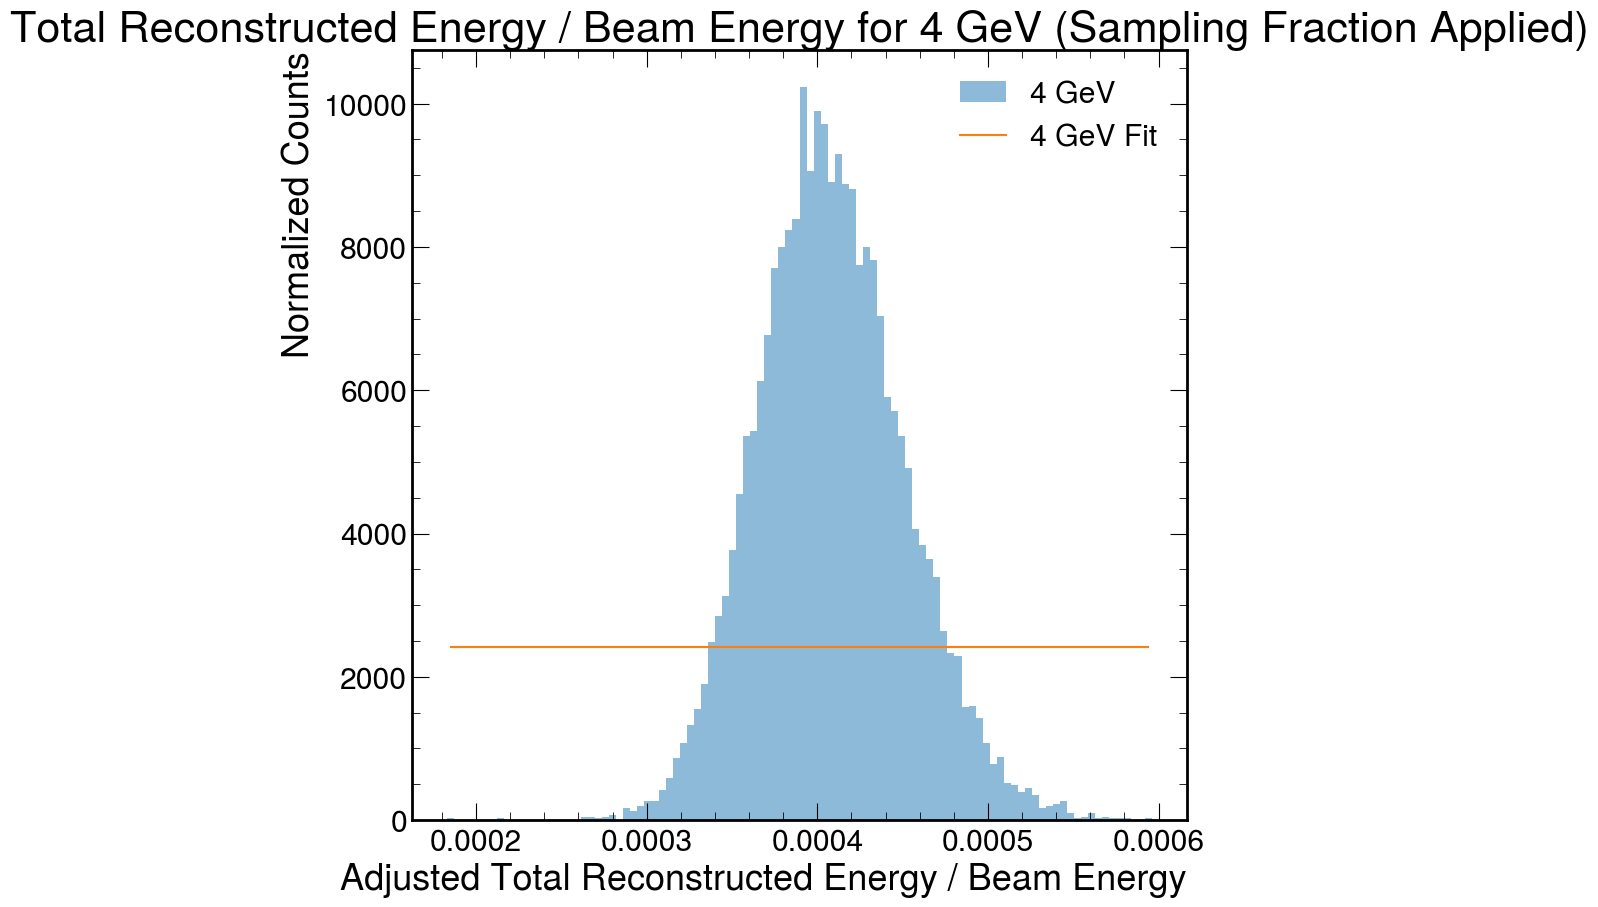

Processed reco_zdc_prototype_e-_4GeV.edm4hep.root with 9844 events.


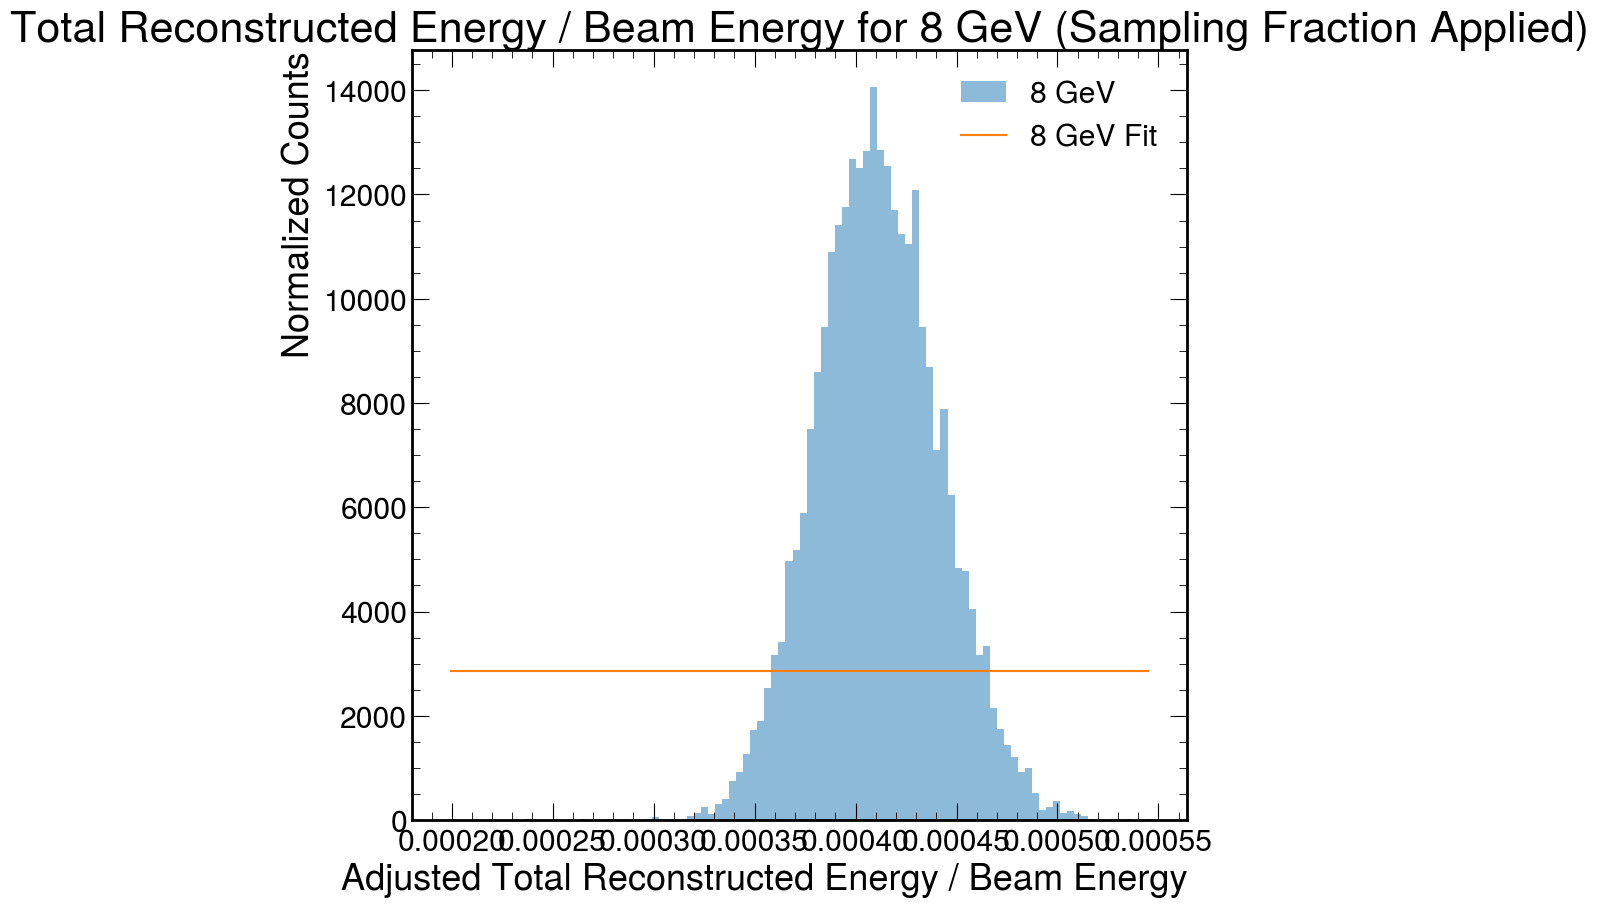

Processed reco_zdc_prototype_e-_8GeV.edm4hep.root with 9964 events.


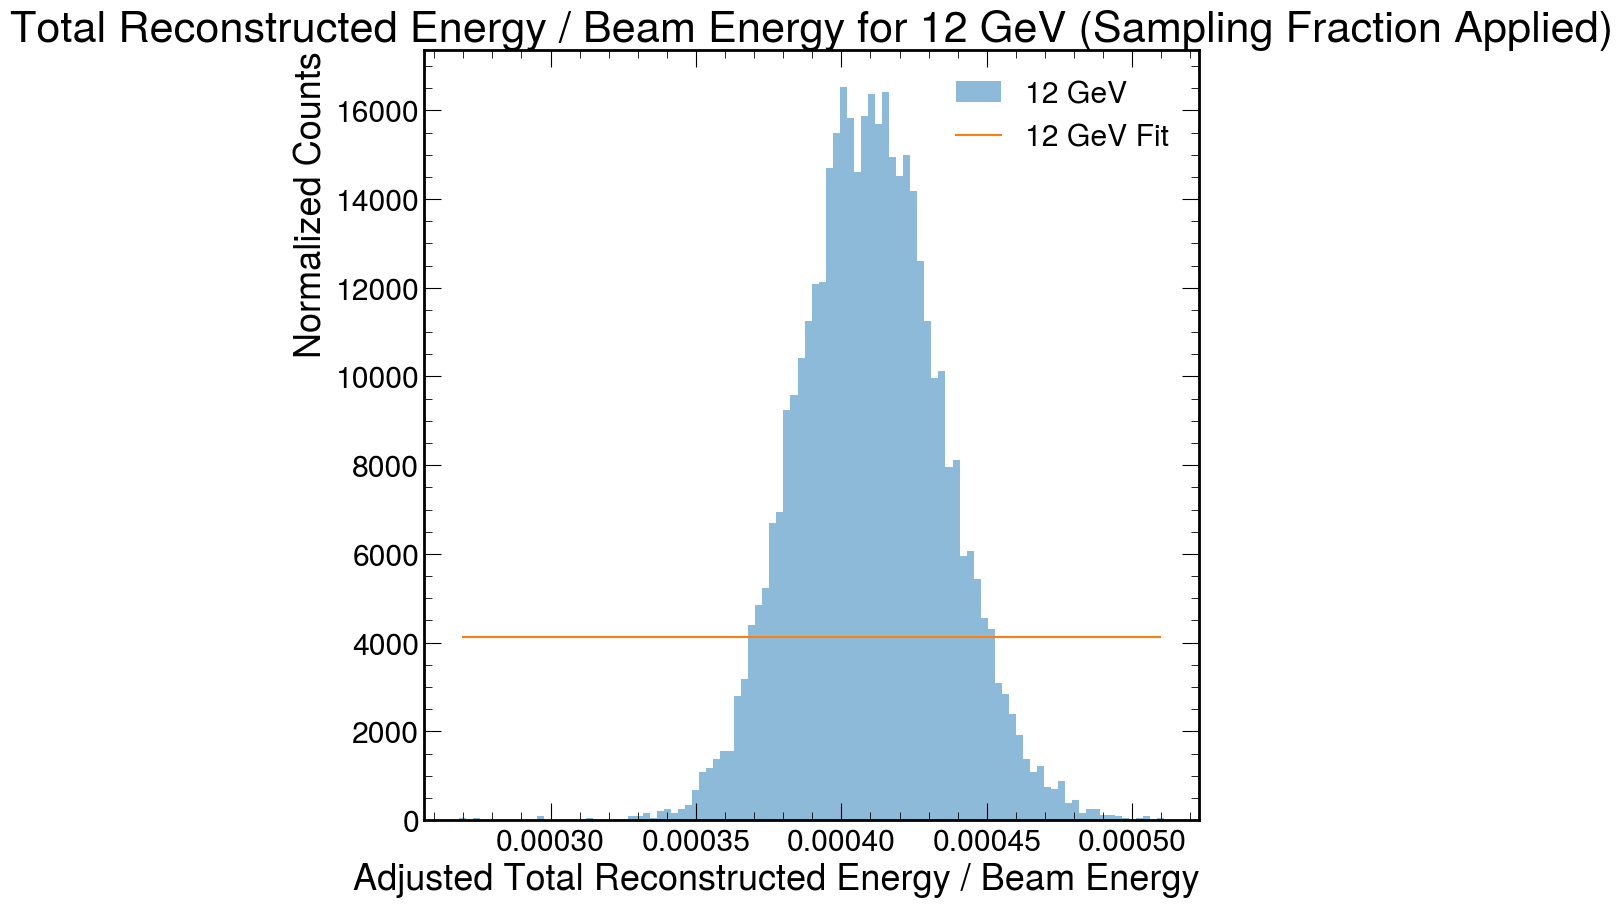

Processed reco_zdc_prototype_e-_12GeV.edm4hep.root with 9864 events.


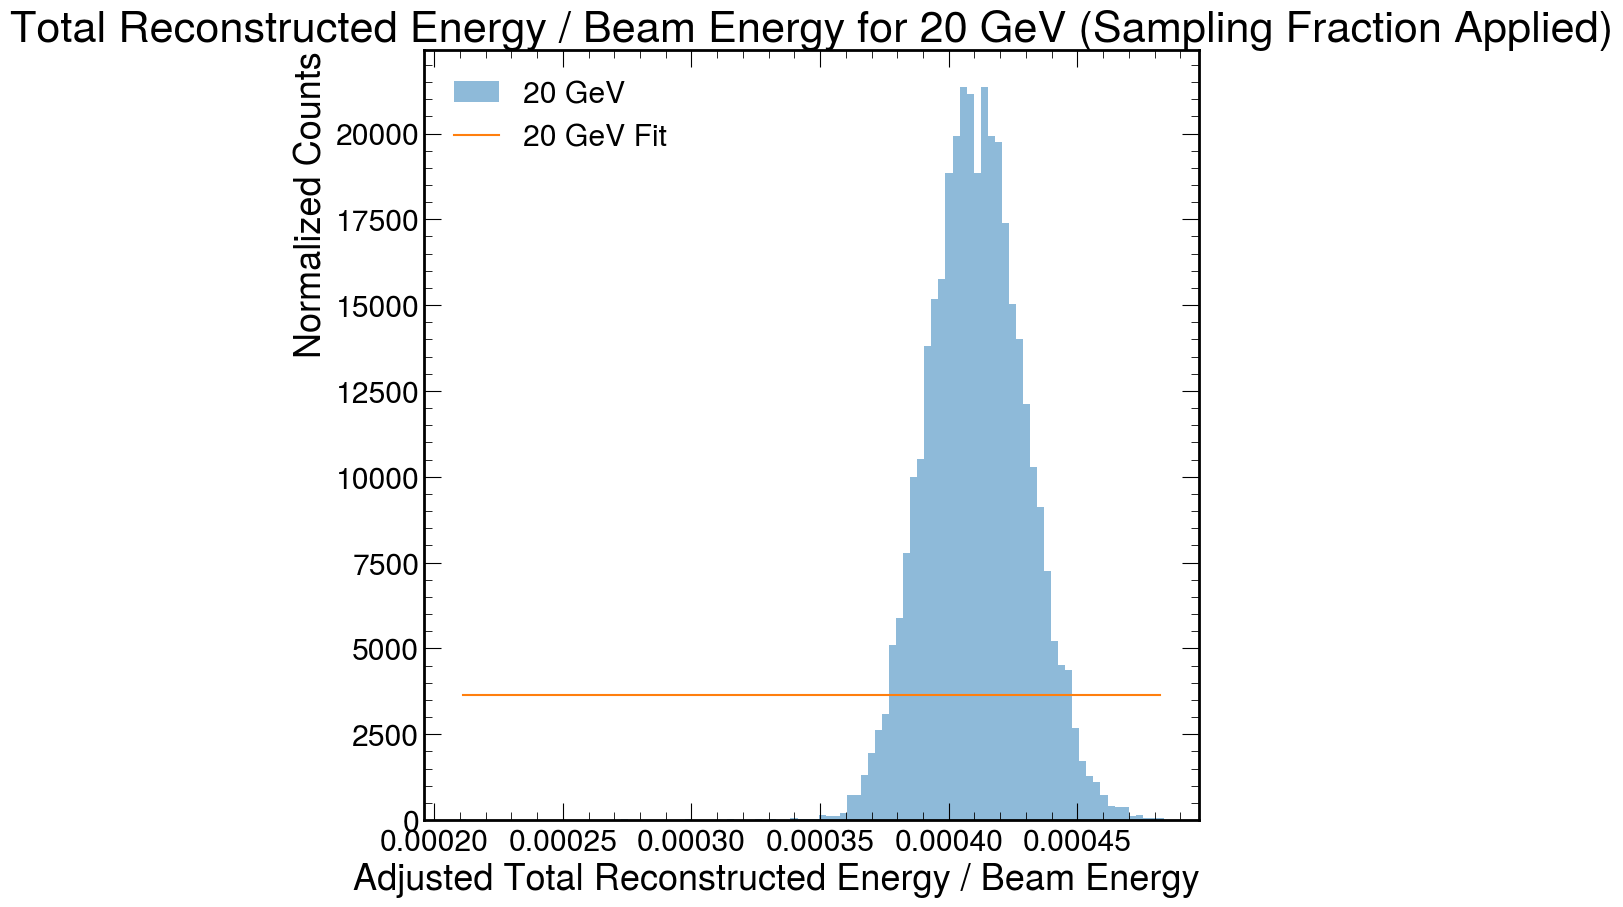

Processed reco_zdc_prototype_e-_20GeV.edm4hep.root with 9933 events.


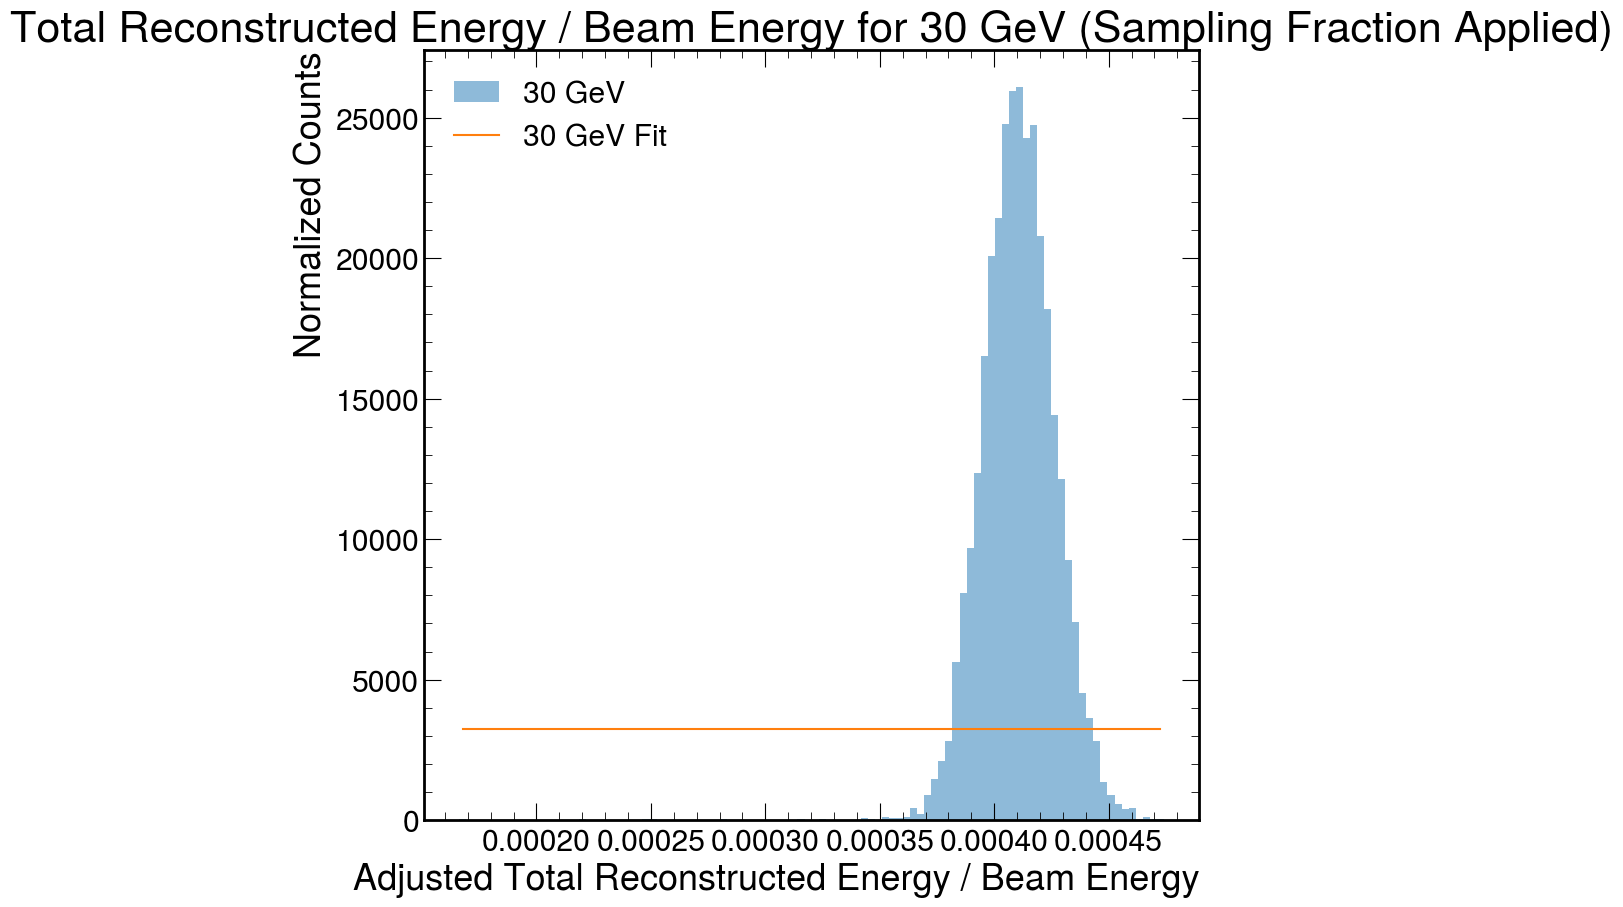

Processed reco_zdc_prototype_e-_30GeV.edm4hep.root with 9984 events.


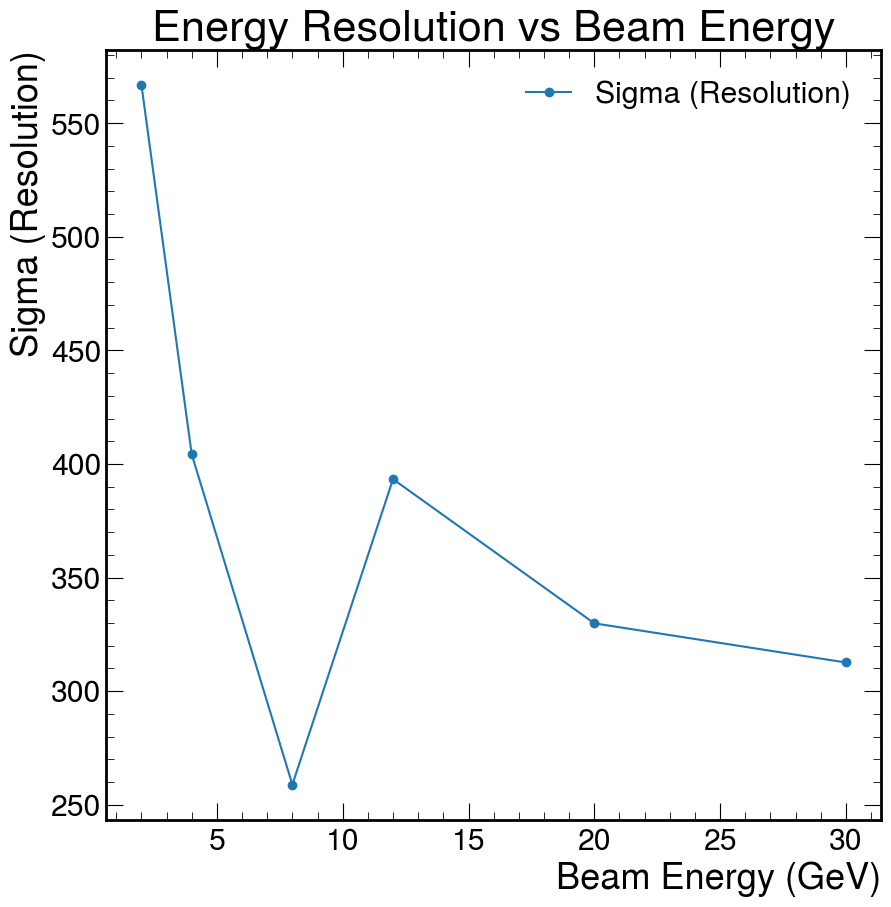

In [28]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Gaussian function
def gaussian(x, mean, sigma, amplitude):
    return amplitude * np.exp(-0.5 * ((x - mean) / sigma) ** 2)

# Define the file directory and list of ROOT files
data_directory = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/"
file_names = [
    "reco_zdc_prototype_e-_2GeV.edm4hep.root",
    "reco_zdc_prototype_e-_4GeV.edm4hep.root",
    "reco_zdc_prototype_e-_8GeV.edm4hep.root",
    "reco_zdc_prototype_e-_12GeV.edm4hep.root",
    "reco_zdc_prototype_e-_20GeV.edm4hep.root",
    "reco_zdc_prototype_e-_30GeV.edm4hep.root"
]

# Mapping from file name to beam energy in GeV
beam_energies = {
    "reco_zdc_prototype_e-_2GeV.edm4hep.root": 2,
    "reco_zdc_prototype_e-_4GeV.edm4hep.root": 4,
    "reco_zdc_prototype_e-_8GeV.edm4hep.root": 8,
    "reco_zdc_prototype_e-_12GeV.edm4hep.root": 12,
    "reco_zdc_prototype_e-_20GeV.edm4hep.root": 20,
    "reco_zdc_prototype_e-_30GeV.edm4hep.root": 30
}

# Sampling fraction
sampling_fraction = 0.02

# Initialize a list to store the sigma values
sigma_values = []
beam_energies_list = []

# Loop over each file and calculate the reconstructed energy ratio
for file_name in file_names:
    file_path = f"{data_directory}/{file_name}"
    beam_energy = beam_energies[file_name]

    try:
        # Open the ROOT file
        with uproot.open(file_path) as file:
            # Assuming the correct key is always the last "events" key
            events_key = [key for key in file.keys() if "events" in key][-1]
            events = file[events_key]
            
            # Extract the reconstructed energy array
            reconstructed_energy = events["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"].array()
            
            # Sum the energy for each event to get a single energy value per event
            total_energy_per_event = ak.sum(reconstructed_energy, axis=1)
            
            # Calculate the ratio of total reconstructed energy over beam energy
            ratio = total_energy_per_event / beam_energy
            
            # Apply the sampling fraction
            adjusted_ratio = ratio * sampling_fraction
            
            # Create a new figure and axis for each histogram
            fig, ax = plt.subplots()
            counts, bins, _ = ax.hist(adjusted_ratio, bins=100, alpha=0.5, label=f"{beam_energy} GeV", density=True)
            
            # Fit a Gaussian to the histogram
            bin_centers = (bins[1:] + bins[:-1]) / 2
            popt, _ = curve_fit(gaussian, bin_centers, counts, p0=[1, 1, 1])
            mean, sigma, amplitude = popt
            
            # Store the sigma value
            sigma_values.append(sigma)
            beam_energies_list.append(beam_energy)

            # Plot the Gaussian fit
            ax.plot(bin_centers, gaussian(bin_centers, *popt), label=f"{beam_energy} GeV Fit")

            # Customize and show the plot
            ax.set_xlabel("Adjusted Total Reconstructed Energy / Beam Energy")
            ax.set_ylabel("Normalized Counts")
            ax.legend()
            ax.set_title(f"Total Reconstructed Energy / Beam Energy for {beam_energy} GeV (Sampling Fraction Applied)")
            plt.show()  # Show each plot separately

            print(f"Processed {file_name} with {len(total_energy_per_event)} events.")
    except Exception as e:
        print(f"Failed to process {file_name}: {e}")

# Plot sigma values
plt.figure()
plt.plot(beam_energies_list, sigma_values, 'o-', label="Sigma (Resolution)")
plt.xlabel("Beam Energy (GeV)")
plt.ylabel("Sigma (Resolution)")
plt.title("Energy Resolution vs Beam Energy")
plt.legend()
plt.show()


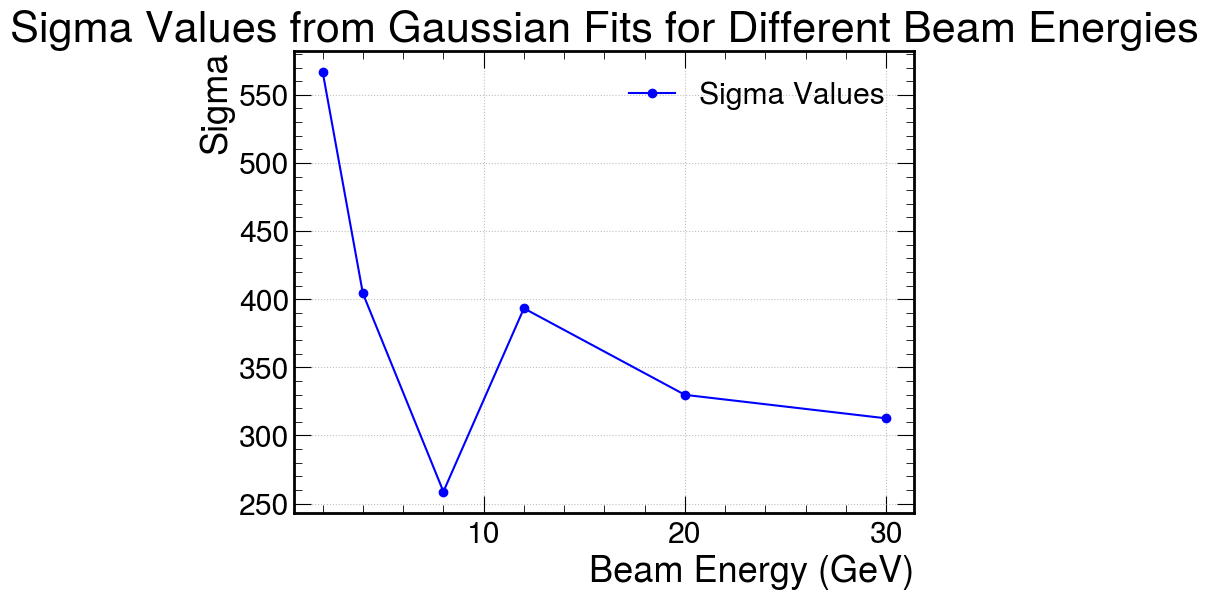

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define the beam energies (in GeV)
beam_energies = [2, 4, 8, 12, 20, 30]

# Assuming sigma_values are already obtained from your previous code
# Example: sigma_values = [sigma_2GeV, sigma_4GeV, sigma_8GeV, sigma_12GeV, sigma_20GeV, sigma_30GeV]

# Plot the sigma values against the beam energies
plt.figure(figsize=(8, 6))
plt.plot(beam_energies, sigma_values, 'o-', color='blue', label='Sigma Values')
plt.xlabel('Beam Energy (GeV)')
plt.ylabel('Sigma')
plt.title('Sigma Values from Gaussian Fits for Different Beam Energies')
plt.grid(True)
plt.legend()
plt.show()


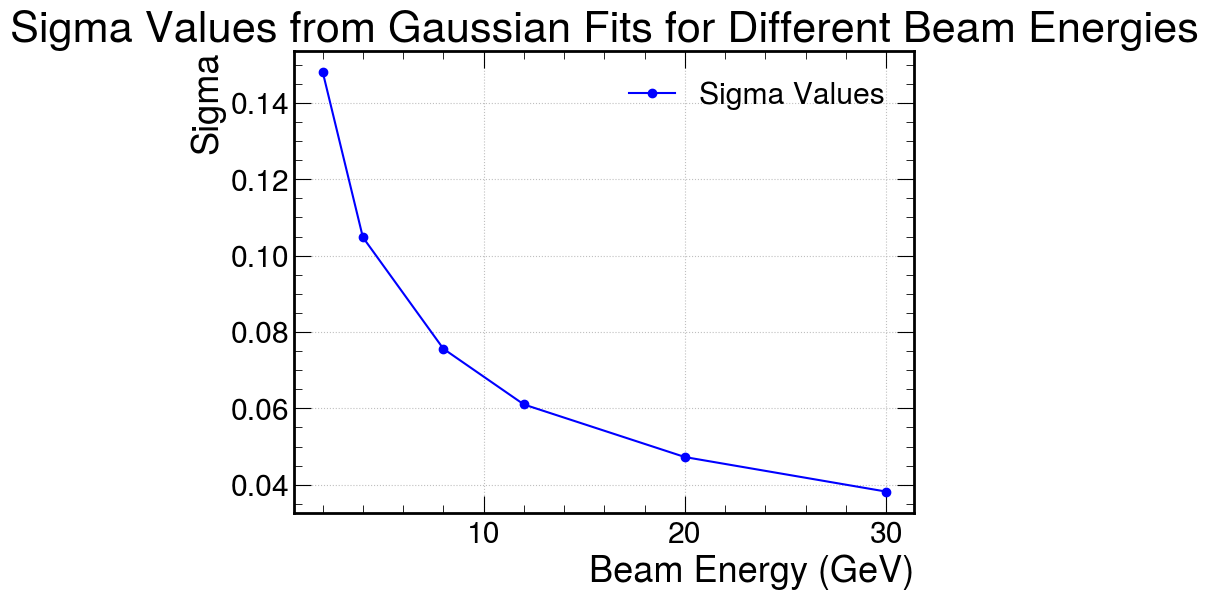

Beam Energy: 2 GeV, Sigma: 0.148
Beam Energy: 4 GeV, Sigma: 0.105
Beam Energy: 8 GeV, Sigma: 0.076
Beam Energy: 12 GeV, Sigma: 0.061
Beam Energy: 20 GeV, Sigma: 0.047
Beam Energy: 30 GeV, Sigma: 0.038


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as ur
import awkward as ak
import os
from scipy.optimize import curve_fit

# Gaussian function to fit the data
def gaussian(x, mu, sigma, A):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define the directory and the file names
data_directory = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/"
beam_energies = [2, 4, 8, 12, 20, 30]

# Initialize lists to store sigma values for each energy
sigma_values = []

# Loop over each beam energy
for energy in beam_energies:
    file_name = f"reco_zdc_prototype_e-_{energy}GeV.edm4hep.root"
    file_path = os.path.join(data_directory, file_name)
    
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    
    with ur.open(file_path) as file:
        # Find the correct key for events
        event_key = None
        for key in file.keys():
            if key.startswith('events;'):
                event_key = key
                break
        
        if event_key is None:
            print(f"No events key found in file: {file_name}")
            continue
        
        events = file[event_key]
        zdc_reco = events.arrays(["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"])
        
        # Combine the cell energies for each event
        combined_energy_per_event = ak.sum(zdc_reco["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"], axis=1)
        
        # Convert to numpy array
        combined_energy_per_event = ak.to_numpy(combined_energy_per_event) / 0.02
        
        # Compute (reco - truth) / truth
        reco_minus_truth_over_truth = (combined_energy_per_event - energy) / energy
        
        # Create a histogram of the distribution
        hist_data, bin_edges = np.histogram(reco_minus_truth_over_truth, bins=100, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Fit a Gaussian to the histogram
        if len(hist_data) < 3:
            print(f"Not enough data to fit for {energy} GeV")
            continue
        
        try:
            p0 = [np.mean(reco_minus_truth_over_truth), np.std(reco_minus_truth_over_truth), np.max(hist_data)]
            popt, pcov = curve_fit(gaussian, bin_centers, hist_data, p0=p0)
            sigma = popt[1]  # Extract sigma
            sigma_values.append(sigma)
        except RuntimeError:
            print(f"Fit failed for {energy} GeV")
            continue

# Plot the sigma values for all energies
plt.figure(figsize=(8, 6))
plt.plot(beam_energies, sigma_values, 'o-', color='blue', label='Sigma Values')
plt.xlabel('Beam Energy (GeV)')
plt.ylabel('Sigma')
plt.title('Sigma Values from Gaussian Fits for Different Beam Energies')
plt.grid(True)
plt.legend()
plt.show()

# Print out the sigma values for each energy
for energy, sigma in zip(beam_energies, sigma_values):
    print(f'Beam Energy: {energy} GeV, Sigma: {sigma:.3f}')


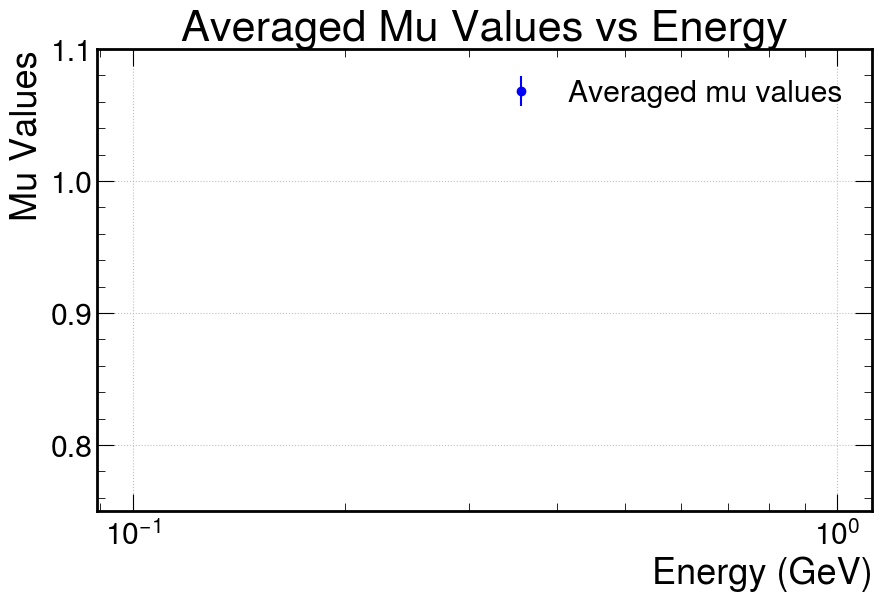

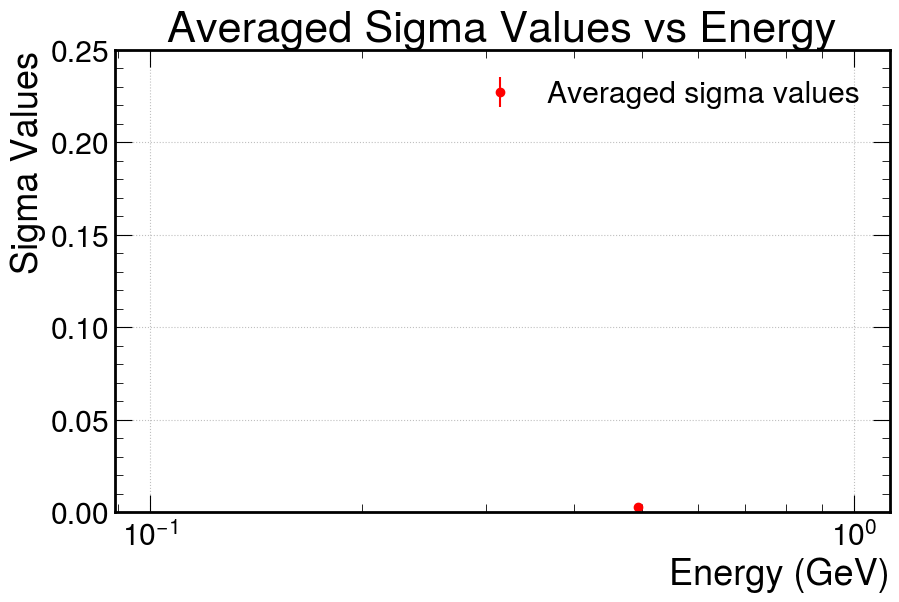

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as ur
import awkward as ak
from scipy.stats import norm

# Define the file path and the specific branch containing the energy data
file_path = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/reco_zdc_prototype_e-_4GeV.edm4hep.root"

# Open the ROOT file and read the energy data using the correct key
with ur.open(file_path) as file:
    # Use the correct key from your file
    event_key = "events;24"
    events = file[event_key]
    
    # Accessing the specific energy array
    energy_array = events.arrays(["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"])

# Flatten the awkward array to get a simple 1D numpy array of energies
energy_flat = ak.to_numpy(ak.flatten(energy_array["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"]))

# Optionally, apply any filtering to the energy data
# For example, filtering for a specific range of energy
energy_flat_filtered = energy_flat  # If no specific filtering is needed

# Calculate mu and sigma values for each event
mu_values_valid = np.mean(energy_flat_filtered)
sigma_values_valid = np.std(energy_flat_filtered)

# Define the bin size for energy histograms
bin_size = 0.99
min_energy = np.min(energy_flat_filtered)
max_energy = np.max(energy_flat_filtered)
bins = np.arange(min_energy, max_energy + bin_size, bin_size)

# Calculate bin centers
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Initialize arrays for mu and sigma values
counts = np.zeros(len(bins) - 1, dtype=int)
avg_mu_values = np.full(len(bins) - 1, np.nan)
avg_sigma_values = np.full(len(bins) - 1, np.nan)
avg_mu_errors = np.full(len(bins) - 1, np.nan)
avg_sigma_errors = np.full(len(bins) - 1, np.nan)

# Fill the values only where applicable
for idx in range(len(bins) - 1):
    mask = (energy_flat_filtered >= bins[idx]) & (energy_flat_filtered < bins[idx + 1])
    if np.any(mask):
        avg_mu_values[idx] = np.median(mu_values_valid)  # Using median of mu
        avg_sigma_values[idx] = np.median(sigma_values_valid)  # Using median of sigma
        avg_mu_errors[idx] = np.subtract(*np.percentile(mu_values_valid, [75, 25])) / 2
        avg_sigma_errors[idx] = np.subtract(*np.percentile(sigma_values_valid, [75, 25])) / 2
        counts[idx] = np.sum(mask)  # Update the count at the index

# Identify valid bins
valid_bins = counts > 0

# Apply the valid_bins mask to filter all arrays
filtered_bin_centers = bin_centers[valid_bins]
filtered_avg_mu_values = avg_mu_values[valid_bins]
filtered_avg_sigma_values = avg_sigma_values[valid_bins]
filtered_avg_mu_errors = avg_mu_errors[valid_bins]
filtered_avg_sigma_errors = avg_sigma_errors[valid_bins]

# Plotting mu values
plt.figure(figsize=(10, 6))
plt.errorbar(filtered_bin_centers, filtered_avg_mu_values, yerr=filtered_avg_mu_errors, fmt='o', color='b', label='Averaged mu values')
plt.xscale('log')
plt.xlabel('Energy (GeV)')
plt.ylabel('Mu Values')
plt.ylim(0.75, 1.1)
plt.title('Averaged Mu Values vs Energy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting sigma values
plt.figure(figsize=(10, 6))
plt.errorbar(filtered_bin_centers, filtered_avg_sigma_values, yerr=filtered_avg_sigma_errors, fmt='o', color='r', label='Averaged sigma values')
plt.xscale('log')
plt.xlabel('Energy (GeV)')
plt.ylabel('Sigma Values')
plt.ylim(0, 0.25)
plt.title('Averaged Sigma Values vs Energy')
plt.legend()
plt.grid(True)
plt.show()


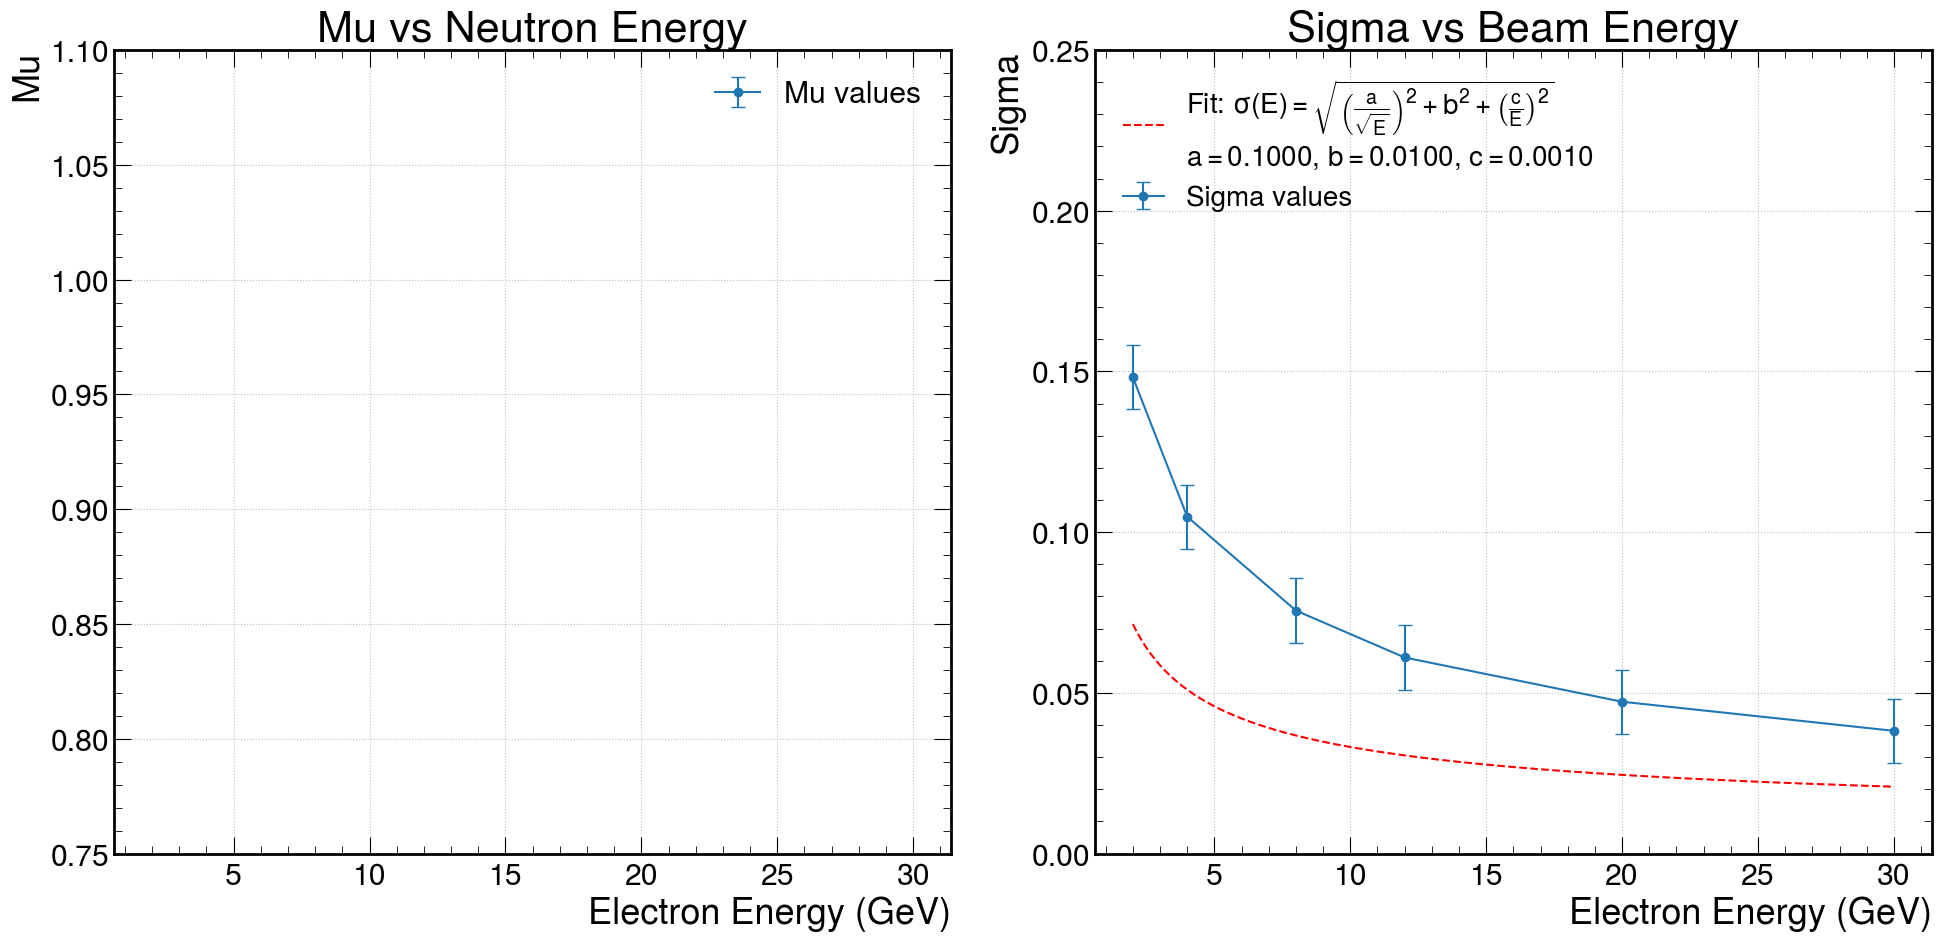

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Populate the energies array
energies_for_mu_sigma = np.array([2, 4, 8, 12, 20, 30])

# If no errors are available, set default small errors (e.g., 0.01)
mu_errors = np.full(len(energies_for_mu_sigma), 0.01)
sigma_errors = np.full(len(energies_for_mu_sigma), 0.01)

# Plotting mu and sigma values with error bars and the fitted function
plt.figure(figsize=(20, 10))

# Mu plot
plt.subplot(1, 2, 1)
plt.errorbar(energies_for_mu_sigma, mu_values, yerr=mu_errors, fmt='o-', label='Mu values', capsize=5)
plt.xlabel('Electron Energy (GeV)')
plt.ylim(0.75, 1.1)
plt.ylabel('Mu')
plt.title('Mu vs Neutron Energy')
plt.legend()
plt.grid(True)

# Sigma plot
plt.subplot(1, 2, 2)
plt.errorbar(energies_for_mu_sigma, sigma_values, yerr=sigma_errors, fmt='o-', label='Sigma values', capsize=5)
plt.xlabel('Electron Energy (GeV)')
plt.ylabel('Sigma')
plt.ylim(0, 0.25)
plt.title('Sigma vs Beam Energy')

# Assuming you have already calculated the fit parameters a, b, c
# If not, use curve_fit to calculate them based on sigma_values and energies_for_mu_sigma

# Example fit parameters (replace these with your calculated values)
a, b, c = 0.1, 0.01, 0.001

# Plot the fitted function
E_fit = np.linspace(min(energies_for_mu_sigma), max(energies_for_mu_sigma), 500)
def calorimeter_energy_function(E, a, b, c):
    return np.sqrt((a / np.sqrt(E))**2 + b**2 + (c / E)**2)

sigma_fit = calorimeter_energy_function(E_fit, a, b, c)
plt.plot(E_fit, sigma_fit, 'r--', label=f'Fit: $\\sigma(E) = \\sqrt{{\\left(\\frac{{a}}{{\\sqrt{{E}}}}\\right)^2 + b^2 + \\left(\\frac{{c}}{{E}}\\right)^2}}$\n$a={a:.4f}$, $b={b:.4f}$, $c={c:.4f}$')
plt.legend(loc='upper left', prop={'size': 20})  # Adjust legend location and size
plt.grid(True)

plt.tight_layout()
plt.show()


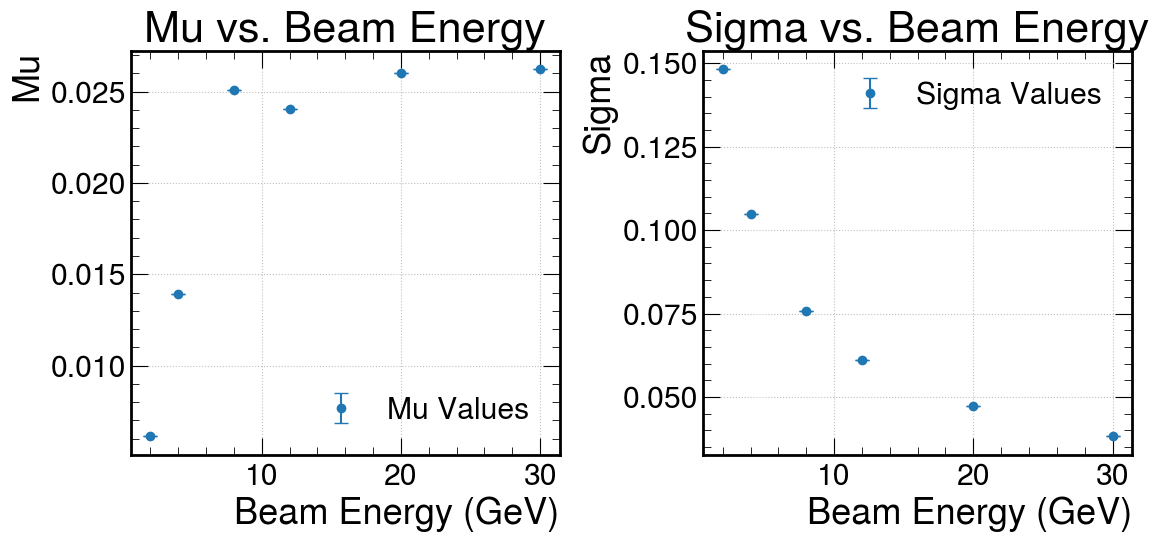

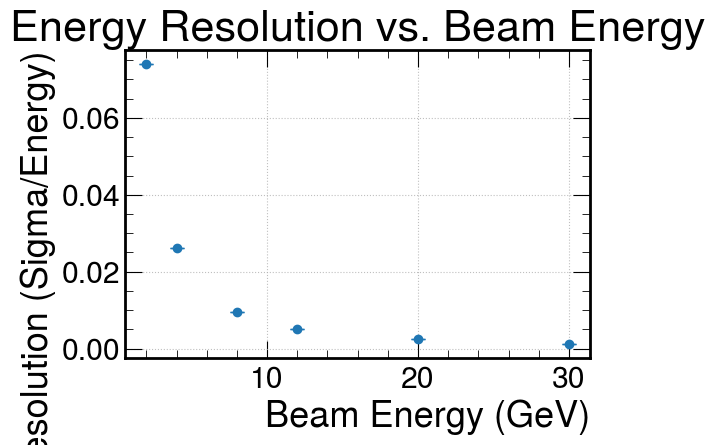

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Define the arrays
energies_for_mu_sigma = np.array([2, 4, 8, 12, 20, 30])  # Beam energies in GeV
mu_values = np.array([0.0061276972000003345, 0.013934990816664812, 0.025086643055449564, 0.024071925396116464, 0.0260430304830871, 0.026222812254077372])
mu_errors = np.zeros_like(mu_values)  # Assuming no errors for mu
sigma_values = np.array([0.14821012, 0.10480933, 0.07560736, 0.06101705, 0.04724564, 0.03819752])
sigma_errors = np.zeros_like(sigma_values)  # Assuming no errors for sigma

# Ensure all arrays have the same length
assert len(energies_for_mu_sigma) == len(mu_values) == len(mu_errors) == len(sigma_values) == len(sigma_errors), \
    "All arrays must have the same length."

# Plot Mu vs. Beam Energy and Sigma vs. Beam Energy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.errorbar(energies_for_mu_sigma, mu_values, yerr=mu_errors, fmt='o', capsize=5, label='Mu Values')
plt.xlabel('Beam Energy (GeV)')
plt.ylabel('Mu')
plt.title('Mu vs. Beam Energy')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.errorbar(energies_for_mu_sigma, sigma_values, yerr=sigma_errors, fmt='o', capsize=5, label='Sigma Values')
plt.xlabel('Beam Energy (GeV)')
plt.ylabel('Sigma')
plt.title('Sigma vs. Beam Energy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Plot Energy Resolution vs. Beam Energy
energy_resolution = sigma_values / energies_for_mu_sigma

plt.figure(figsize=(6, 4))
plt.errorbar(energies_for_mu_sigma, energy_resolution, yerr=sigma_errors/energies_for_mu_sigma, fmt='o', capsize=5)
plt.xlabel('Beam Energy (GeV)')
plt.ylabel('Energy Resolution (Sigma/Energy)')
plt.title('Energy Resolution vs. Beam Energy')
plt.grid(True)
plt.show()


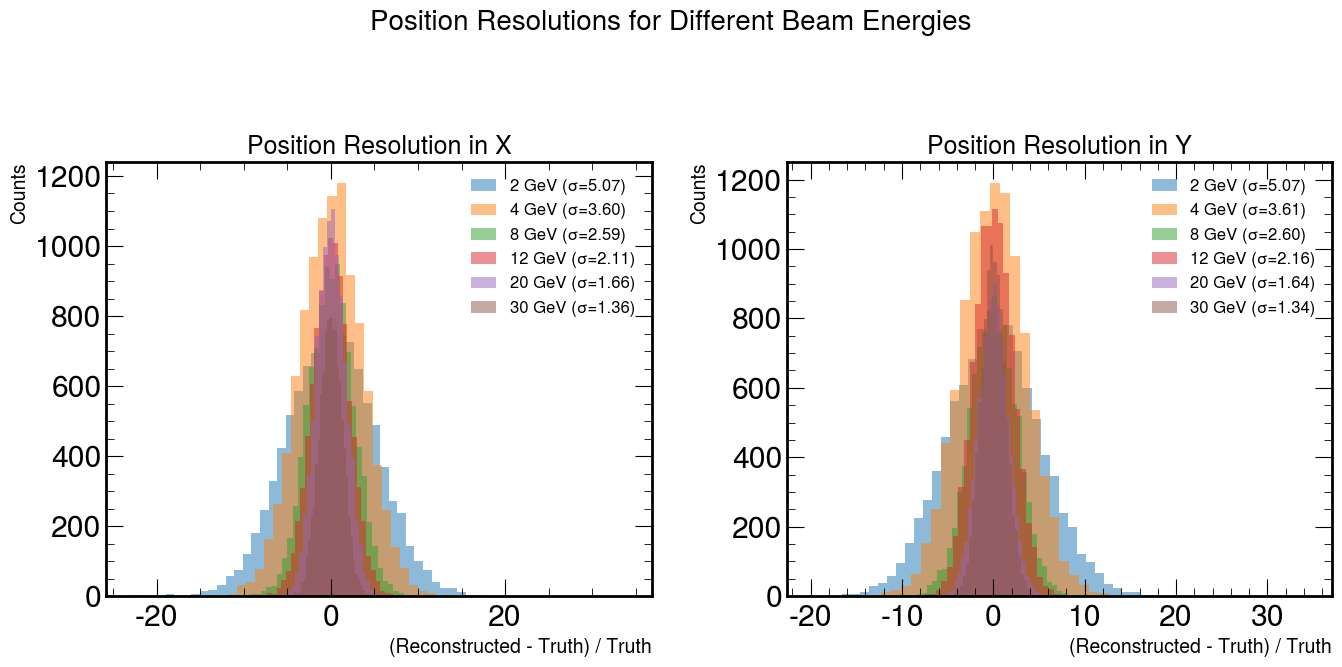

Sigma values for X positions:
2 GeV: 5.07 cm
4 GeV: 3.60 cm
8 GeV: 2.59 cm
12 GeV: 2.11 cm
20 GeV: 1.66 cm
30 GeV: 1.36 cm

Sigma values for Y positions:
2 GeV: 5.07 cm
4 GeV: 3.61 cm
8 GeV: 2.60 cm
12 GeV: 2.16 cm
20 GeV: 1.64 cm
30 GeV: 1.34 cm


In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import uproot as ur
import awkward as ak

# Gaussian function
def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Define the file path and file names
data_directory = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/"
file_names = [
    "reco_zdc_prototype_e-_2GeV.edm4hep.root",
    "reco_zdc_prototype_e-_4GeV.edm4hep.root",
    "reco_zdc_prototype_e-_8GeV.edm4hep.root",
    "reco_zdc_prototype_e-_12GeV.edm4hep.root",
    "reco_zdc_prototype_e-_20GeV.edm4hep.root",
    "reco_zdc_prototype_e-_30GeV.edm4hep.root"
]

# Mapping from file name to beam energy in GeV
beam_energies = {
    "reco_zdc_prototype_e-_2GeV.edm4hep.root": 2,
    "reco_zdc_prototype_e-_4GeV.edm4hep.root": 4,
    "reco_zdc_prototype_e-_8GeV.edm4hep.root": 8,
    "reco_zdc_prototype_e-_12GeV.edm4hep.root": 12,
    "reco_zdc_prototype_e-_20GeV.edm4hep.root": 20,
    "reco_zdc_prototype_e-_30GeV.edm4hep.root": 30
}

# Prepare lists to hold position resolution data
mean_x_positions = []
mean_y_positions = []
energy_labels = []
sigmas_x = []
sigmas_y = []

# Loop through each file and calculate the position resolutions
for file_name in file_names:
    file_path = f"{data_directory}/{file_name}"
    
    # Open the ROOT file
    with ur.open(file_path) as file:
        # Access the 'events' tree and then the branches
        tree = file["events"]
        energy_data = tree["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"].array()
        x_positions = tree["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.x"].array()
        y_positions = tree["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.position.y"].array()

        # Calculate <x> and <y> for each event
        mean_x = ak.sum(energy_data * x_positions, axis=1) / ak.sum(energy_data, axis=1)
        mean_y = ak.sum(energy_data * y_positions, axis=1) / ak.sum(energy_data, axis=1)

        # Convert to NumPy arrays
        mean_x = ak.to_numpy(mean_x)
        mean_y = ak.to_numpy(mean_y)

        # Store the calculated means
        mean_x_positions.append(mean_x)
        mean_y_positions.append(mean_y)
        energy_labels.append(f"{beam_energies[file_name]} GeV")

        # Fit Gaussian to <x>
        hist_x, bin_edges_x = np.histogram(mean_x, bins=50)
        bin_centers_x = (bin_edges_x[:-1] + bin_edges_x[1:]) / 2
        try:
            popt_x, _ = curve_fit(gaussian, bin_centers_x, hist_x, p0=[max(hist_x), np.mean(mean_x), np.std(mean_x)])
            sigmas_x.append(popt_x[2])
        except Exception as e:
            print(f"Error fitting Gaussian for {file_name} (X): {e}")
            sigmas_x.append(np.nan)

        # Fit Gaussian to <y>
        hist_y, bin_edges_y = np.histogram(mean_y, bins=50)
        bin_centers_y = (bin_edges_y[:-1] + bin_edges_y[1:]) / 2
        try:
            popt_y, _ = curve_fit(gaussian, bin_centers_y, hist_y, p0=[max(hist_y), np.mean(mean_y), np.std(mean_y)])
            sigmas_y.append(popt_y[2])
        except Exception as e:
            print(f"Error fitting Gaussian for {file_name} (Y): {e}")
            sigmas_y.append(np.nan)

# Plot the position resolutions for different energies
plt.figure(figsize=(14, 7))

# Plot <x>
plt.subplot(1, 2, 1)
for i, energy in enumerate(energy_labels):
    plt.hist(mean_x_positions[i], bins=50, alpha=0.5, label=f'{energy} (σ={sigmas_x[i]:.2f})')
plt.title("Position Resolution in X", fontsize=18)
plt.xlabel("(Reconstructed - Truth) / Truth", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.legend(fontsize=12)

# Plot <y>
plt.subplot(1, 2, 2)
for i, energy in enumerate(energy_labels):
    plt.hist(mean_y_positions[i], bins=50, alpha=0.5, label=f'{energy} (σ={sigmas_y[i]:.2f})')
plt.title("Position Resolution in Y", fontsize=18)
plt.xlabel("(Reconstructed - Truth) / Truth", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.legend(fontsize=12)

# Set a common title for both subplots
plt.suptitle("Position Resolutions for Different Beam Energies", fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to accommodate the suptitle
plt.show()

# Print the sigma values
print("Sigma values for X positions:")
for i, energy in enumerate(energy_labels):
    print(f"{energy}: {sigmas_x[i]:.2f} cm")

print("\nSigma values for Y positions:")
for i, energy in enumerate(energy_labels):
    print(f"{energy}: {sigmas_y[i]:.2f} cm")


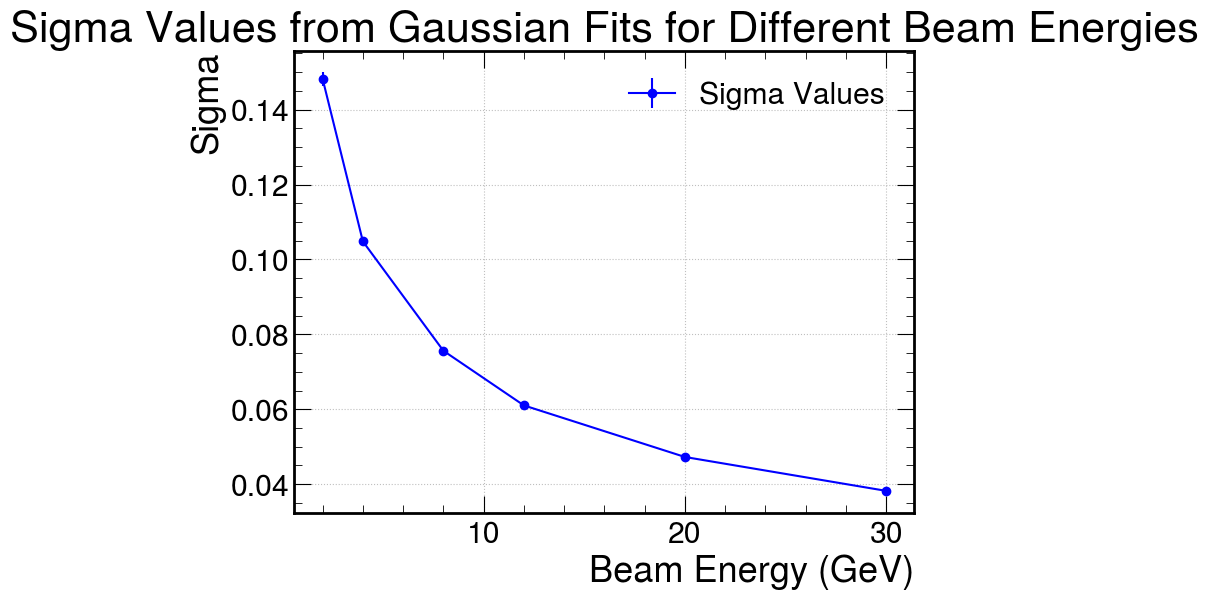

Beam Energy: 2 GeV, Sigma: 0.148 ± 0.002
Beam Energy: 4 GeV, Sigma: 0.105 ± 0.001
Beam Energy: 8 GeV, Sigma: 0.076 ± 0.001
Beam Energy: 12 GeV, Sigma: 0.061 ± 0.000
Beam Energy: 20 GeV, Sigma: 0.047 ± 0.000
Beam Energy: 30 GeV, Sigma: 0.038 ± 0.000


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import uproot as ur
import awkward as ak
import os
from scipy.optimize import curve_fit

# Gaussian function to fit the data
def gaussian(x, mu, sigma, A):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Define the directory and the file names
data_directory = "/media/miguel/Elements/zdc_data/zdc_prototype_data_08_02_2024/"
beam_energies = [2, 4, 8, 12, 20, 30]

# Initialize lists to store sigma values and errors for each energy
sigma_values = []
sigma_errors = []

# Loop over each beam energy
for energy in beam_energies:
    file_name = f"reco_zdc_prototype_e-_{energy}GeV.edm4hep.root"
    file_path = os.path.join(data_directory, file_name)
    
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    
    with ur.open(file_path) as file:
        # Find the correct key for events
        event_key = None
        for key in file.keys():
            if key.startswith('events;'):
                event_key = key
                break
        
        if event_key is None:
            print(f"No events key found in file: {file_name}")
            continue
        
        events = file[event_key]
        zdc_reco = events.arrays(["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"])
        
        # Combine the cell energies for each event
        combined_energy_per_event = ak.sum(zdc_reco["HcalFarForwardZDCRecHits/HcalFarForwardZDCRecHits.energy"], axis=1)
        
        # Convert to numpy array
        combined_energy_per_event = ak.to_numpy(combined_energy_per_event) / 0.02
        
        # Compute (reco - truth) / truth
        reco_minus_truth_over_truth = (combined_energy_per_event - energy) / energy
        
        # Create a histogram of the distribution
        hist_data, bin_edges = np.histogram(reco_minus_truth_over_truth, bins=100, density=True)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Fit a Gaussian to the histogram
        if len(hist_data) < 3:
            print(f"Not enough data to fit for {energy} GeV")
            continue
        
        try:
            p0 = [np.mean(reco_minus_truth_over_truth), np.std(reco_minus_truth_over_truth), np.max(hist_data)]
            popt, pcov = curve_fit(gaussian, bin_centers, hist_data, p0=p0)
            sigma = popt[1]  # Extract sigma
            sigma_values.append(sigma)
            sigma_errors.append(np.sqrt(np.diag(pcov))[1])  # Extract sigma error
        except RuntimeError:
            print(f"Fit failed for {energy} GeV")
            continue

# Plot the sigma values with error bars for all energies
plt.figure(figsize=(8, 6))
plt.errorbar(beam_energies, sigma_values, yerr=sigma_errors, fmt='o-', color='blue', label='Sigma Values')
plt.xlabel('Beam Energy (GeV)')
plt.ylabel('Sigma')
plt.title('Sigma Values from Gaussian Fits for Different Beam Energies')
plt.grid(True)
plt.legend()
plt.show()

# Print out the sigma values for each energy with errors
for energy, sigma, sigma_err in zip(beam_energies, sigma_values, sigma_errors):
    print(f'Beam Energy: {energy} GeV, Sigma: {sigma:.3f} ± {sigma_err:.3f}')


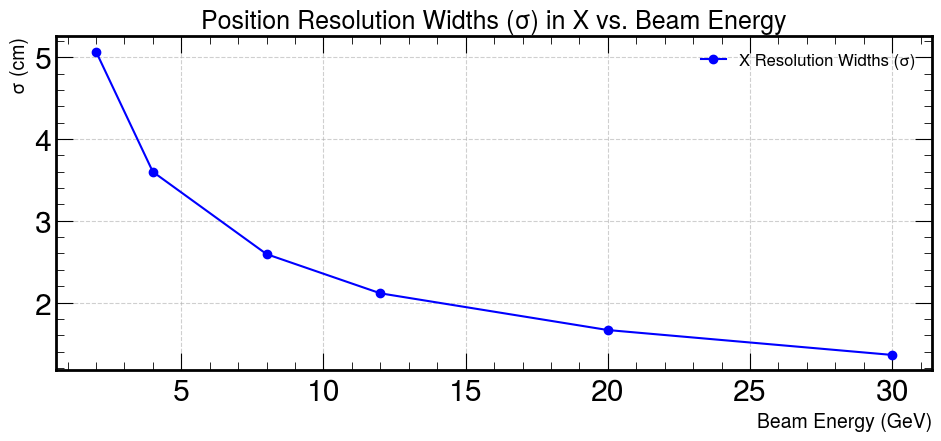

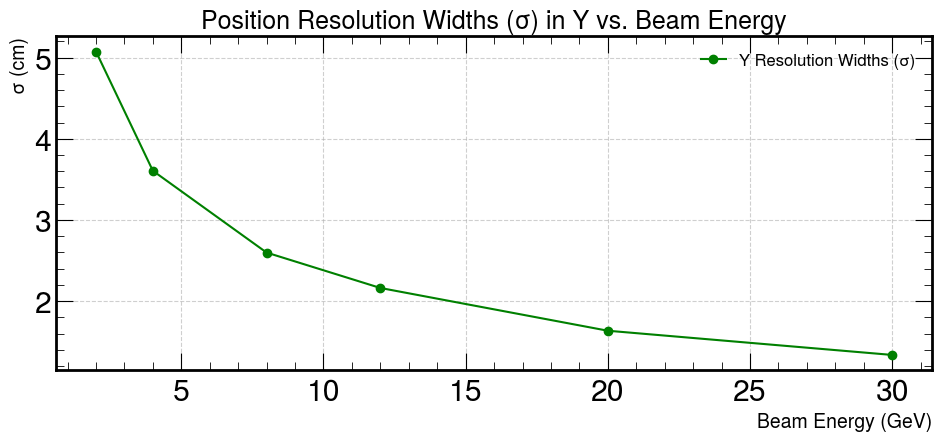

In [36]:
file_names = [
    "reco_zdc_prototype_e-_2GeV.edm4hep.root",
    "reco_zdc_prototype_e-_4GeV.edm4hep.root",
    "reco_zdc_prototype_e-_8GeV.edm4hep.root",
    "reco_zdc_prototype_e-_12GeV.edm4hep.root",
    "reco_zdc_prototype_e-_20GeV.edm4hep.root",
    "reco_zdc_prototype_e-_30GeV.edm4hep.root"
]

# Mapping from file name to beam energy in GeV
beam_energies = {
    "reco_zdc_prototype_e-_2GeV.edm4hep.root": 2,
    "reco_zdc_prototype_e-_4GeV.edm4hep.root": 4,
    "reco_zdc_prototype_e-_8GeV.edm4hep.root": 8,
    "reco_zdc_prototype_e-_12GeV.edm4hep.root": 12,
    "reco_zdc_prototype_e-_20GeV.edm4hep.root": 20,
    "reco_zdc_prototype_e-_30GeV.edm4hep.root": 30
}

# Convert energy labels to numerical values for plotting
beam_energy_values = [beam_energies[file_name] for file_name in file_names]

# Plot sigmas for X
plt.figure(figsize=(10, 5))
plt.errorbar(beam_energy_values, sigmas_x, fmt='o-', color='blue', label='X Resolution Widths (σ)')
plt.title("Position Resolution Widths (σ) in X vs. Beam Energy", fontsize=18)
plt.xlabel("Beam Energy (GeV)", fontsize=14)
plt.ylabel("σ (cm)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Plot sigmas for Y
plt.figure(figsize=(10, 5))
plt.errorbar(beam_energy_values, sigmas_y, fmt='o-', color='green', label='Y Resolution Widths (σ)')
plt.title("Position Resolution Widths (σ) in Y vs. Beam Energy", fontsize=18)
plt.xlabel("Beam Energy (GeV)", fontsize=14)
plt.ylabel("σ (cm)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
